# Proyecto TFM IBEX35 - Machine Learning & Deep Learning

Notebook completo para ejecutar el pipeline en Google Colab

**Autor:** Santi  
**Proyecto:** Predicción IBEX35 con ML y Análisis de Sentimiento  
**Modelos:** Linear, Ridge, RF, XGBoost, LightGBM, MLP, GRU, LSTM, Ensemble

Procederemos a aplicar modelos de *machine learning* para la resolución de dos problemas. Dependiendo del modelo a usar, se requerirán datos escalados o sin escalar.

1.   Regresión: Predecir la magnitud del retorno usando como variables objetivo `return_next`, `return_next_5`, `return_next_10` o `return_next_20` (Retorno esperado a día 1, una semana, dos semanas y 4 semanas)

2.   Clasificación: Predecir la dirección del cambio, `direction_next`, `direction_next_5`, `direction_next_10` y `direction_next_20` (sube=1 ó baja=0).

| Problema | Datos | Modelos| N |
|----|----|----|----|
| Regresión     | Scaled   | Linear, Ridge, Random Forest, XGBoost, LightGBM, Ensemble, Multi-Layer Perceptron, Gated Recurrent Unit, Long Short-Term Memory | 9 |
| Regresión     | Unscaled | Random Forest, XGBoost, LightGBM, Ensemble, Gated Recurrent Unit, Long Short-Term Memory                                        | 6 |
| Clasificación | Scaled   | Logistic, Random Forest, XGBoost, LightGBM, Ensemble, Multi-Layer Perceptron, Gated Recurrent Unit, Long Short-Term Memory      | 8 |
| Clasificación | Unscaled | Random Forest, XGBoost, LightGBM, Ensemble, Gated Recurrent Unit, Long Short-Term Memory                                        | 6 |


<br>


| Modelo              | Tipo          | Librería   | Scaled | Unscaled | Justificación       |
|----|----|----|----|----|----|
| Linear Regression   | Lineal        | sklearn    | ✓      | ✗        | Sensible a escala   |
| Ridge Regression    | Lineal        | sklearn    | ✓      | ✗        | Sensible a escala   |
| Logistic Regression | Lineal        | sklearn    | ✓      | ✗        | Sensible a escala   |
| MLP                 | Red Neuronal  | sklearn    | ✓      | ✗        | Sensible a escala   |
| Random Forest       | Árbol         | sklearn    | ✓      | ✓        | Invariante a escala |
| XGBoost             | Árbol         | xgboost    | ✓      | ✓        | Invariante a escala |
| LightGBM            | Árbol         | lightgbm   | ✓      | ✓        | Invariante a escala |
| Ensemble (Stacking) | Ensemble      | sklearn    | ✓      | ✓        | Invariante a escala |
| GRU                 | Deep Learning | tensorflow | ✓      | ✓        | Ambos viables       |
| LSTM                | Deep Learning | tensorflow | ✓      | ✓        | Ambos viables       |

<br>

| Dataset                 | Tipo     | Descripción                                        |
|----|----|----|
| financial_scaled        | Scaled   | Variables financieras normalizadas                 |
| financial_unscaled      | Unscaled | Variables financieras sin normalizar               |
| financial_long_scaled   | Scaled   | Serie larga financiera normalizada                 |
| financial_long_unscaled | Unscaled | Serie larga financiera sin normalizar              |
| sentiment_scaled        | Scaled   | Variables financieras + sentimiento normalizadas   |
| sentiment_unscaled      | Unscaled | Variables financieras + sentimiento sin normalizar |

<br>

| Problema      | Datos    | Datasets | Targets | Modelos | Total   |
|----|----|----|----|----|----|
| Regresión     | Scaled   | 3        | 4       | 9       | 108     |
| Regresión     | Unscaled | 3        | 4       | 6       | 72      |
| Clasificación | Scaled   | 3        | 4       | 8       | 96      |
| Clasificación | Unscaled | 3        | 4       | 6       | 72      |
| **TOTAL**     |          |          |         |         | **348** |

<br>

| Categoría     | Scaled  | Unscaled | Total   |
|----|----|----|----|
| Regresión     | 108     | 72       | 180     |
| Clasificación | 96      | 72       | 168     |
| **Total**     | **204** | **144**  | **348** |



A su vez emplearemos 3 sets de datos diferentes, conteniendo únicamente variables financieras, o incluyendo también análisis de sentimientos procedente de noticias obtenidas a traves de [GDELT 1.0 GKG.](https://https://https://www.gdeltproject.org/data.html/).

Por tanto, disponenmos de:
*   Set de varialbes financieras relacionadas con el Ibex35 e índices internacionas de 2014-01-01 a 2024-10-15. Test 2024-10-16 a 2025-10-15.
*   Set larga de varialbes financieras relacionadas con el Ibex35 e índices internacionas de 2004-01-01 a 2024-10-15. Test 2024-10-16 a 2025-10-15.
*   Set de varialbes financieras relacionadas con el Ibex35 e índices internacionas junto a variables provenientes del análisis de sentimientos de GDELT de 2014-01-01 a 2024-10-15. Test 2024-10-16 a 2025-10-15..

Ambos set de datos disponen de versiones escaladas mediante z-score y sin escalar para aplicar según que modelo.

---


## 1. Configuración Inicial

### 1.1 Verificar GPU

In [1]:
import tensorflow as tf
import torch
import matplotlib as plt


print(f"TensorFlow version: {tf.__version__}")
print(f"GPU disponible (TF): {tf.config.list_physical_devices('GPU')}")
print(f"GPU disponible (PyTorch): {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"Nombre GPU: {torch.cuda.get_device_name(0)}")

2025-11-30 23:44:18.891312: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.20.0
GPU disponible (TF): []
GPU disponible (PyTorch): False


2025-11-30 23:44:24.631338: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### 1.2 Montar Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

print("\n✓ Google Drive montado")



Mounted at /content/drive

✓ Google Drive montado


### 1.3 Configurar Rutas

**IMPORTANTE:** Ajusta `PROJECT_PATH` según tu Google Drive

In [2]:
import os
import sys
import subprocess
from pathlib import Path

# ============================================================================
# AJUSTAR ESTA RUTA SEGÚN TU GOOGLE DRIVE
# ============================================================================
#PROJECT_PATH = '/content/drive/MyDrive/TFM'

PROJECT_PATH = '/home/santi/Master/TFM/py_project'
# Rutas derivadas
SCRIPTS_PATH = Path(PROJECT_PATH) / 'scripts'
DATA_PATH = Path(PROJECT_PATH) / 'input_data'
RESULTS_PATH = Path(PROJECT_PATH) / 'results'

# Añadir al path de Python
if str(SCRIPTS_PATH) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_PATH))

# Verificar rutas
print("Verificando estructura del proyecto:")
print(f"  Proyecto: {PROJECT_PATH} {'✓' if Path(PROJECT_PATH).exists() else '✗'}")
print(f"  Scripts: {SCRIPTS_PATH} {'✓' if SCRIPTS_PATH.exists() else '✗'}")
print(f"  Data: {DATA_PATH} {'✓' if DATA_PATH.exists() else '✗'}")
print(f"  Results: {RESULTS_PATH} {'✓' if RESULTS_PATH.exists() else '✗'}")

# Cambiar al directorio del proyecto
os.chdir(str(SCRIPTS_PATH))
print(f"\n✓ Directorio de trabajo: {os.getcwd()}")

Verificando estructura del proyecto:
  Proyecto: /home/santi/Master/TFM/py_project ✓
  Scripts: /home/santi/Master/TFM/py_project/scripts ✓
  Data: /home/santi/Master/TFM/py_project/input_data ✓
  Results: /home/santi/Master/TFM/py_project/results ✓

✓ Directorio de trabajo: /home/santi/Master/TFM/py_project/scripts


### 1.4 Instalar Dependencias

In [ ]:
# Instalar paquetes necesarios
%pip install -q pyreadr xgboost lightgbm pyarrow
print("✓ Dependencias instaladas")


In [ ]:
# Verificar instalación
import pyreadr
import xgboost as xgb
import lightgbm as lgb
import pyarrow

print(f"  pyreadr: {pyreadr.__version__}")
print(f"  xgboost: {xgb.__version__}")
print(f"  lightgbm: {lgb.__version__}")
print(f"  pyarrow: {pyarrow.__version__}")


✓ Dependencias instaladas
  pyreadr: 0.5.3
  xgboost: 3.1.1
  lightgbm: 4.6.0
  pyarrow: 22.0.0


### 1.5 Verificar Archivos del Proyecto

In [4]:
required_files = [
    'config.py',
    'aux_functions.py',
    'modelos_ml.py',
    'lstm_models.py',
    'visualization.py',
    'evaluate_naive_models.py',
    'evaluar_todos_modelos.py'
]

print("Verificando archivos del proyecto:")
missing_files = []
for file in required_files:
    exists = (SCRIPTS_PATH / file).exists()
    status = '✓' if exists else '✗'
    print(f"  {status} {file}")
    if not exists:
        missing_files.append(file)

if missing_files:
    print(f"\n⚠ Archivos faltantes: {missing_files}")
    print("Por favor, sube estos archivos a tu Google Drive en la carpeta scripts/")
else:
    print("\n✓ Todos los archivos necesarios están presentes")

Verificando archivos del proyecto:
  ✓ config.py
  ✓ aux_functions.py
  ✓ modelos_ml.py
  ✓ lstm_models.py
  ✓ visualization.py
  ✓ evaluate_naive_models.py
  ✓ evaluar_todos_modelos.py

✓ Todos los archivos necesarios están presentes


### 1.6 Importar Módulos del Proyecto

2025-11-30 23:45:01 | INFO     | Log file: /home/santi/Master/TFM/py_project/results/csv/logs/pipeline_20251130_234501.log


✓ Funciones auxiliares definidas
✓ Funciones de evaluación definidas
✓ Funciones estadísticas para clasificación cargadas
✓ Funciones de comparación estadística para REGRESIÓN definidas
Función compare_classification_across_horizons cargada correctamente
✓ Función de visualización definida
✓ Función de visualización de horizontes definida
✓ Funciones de análisis de horizontes para REGRESIÓN definidas
Función horizon 1 cargada correctamente
✓ Funciones de visualización definidas
✓ Funciones de modelos de regresión definidas
✓ Funciones de modelos de clasificación definidas
✓ Módulo lstm_models.py cargado
  Funciones disponibles:
    - train_lstm_regression()
    - train_lstm_classification()
    - train_lstm_suite()
  Arquitecturas: small, medium, large, xlarge, bidirectional
✓ Módulos importados correctamente
Entorno: LOCAL
Proyecto: /home/santi/Master/TFM/py_project
Data: /home/santi/Master/TFM/py_project/data/raw
Results: /home/santi/Master/TFM/py_project/results
Models: /home/santi/

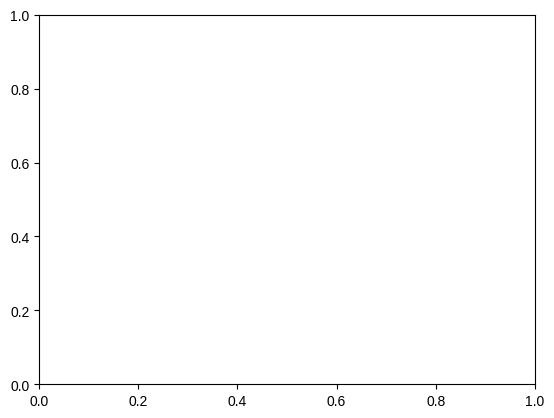

In [5]:
# Imports estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
from datetime import datetime
warnings.filterwarnings('ignore')

from sklearn.ensemble import StackingRegressor

# Config
from config import (
    config, MODELS, PLOTS, CSV, RANDOM_STATE,
    REGRESSION_TARGETS, CLASSIFICATION_TARGETS
)

# Aux functions
from aux_functions import (
    load_rds, prepare_data,
    create_sequences,
    save_model,
    save_training_history,
    load_training_history,
    get_best_epoch_info,
    mcnemar_test,
    bootstrap_confidence_interval,
    evaluate_regression,
    evaluate_classification,
    compare_models_statistical,
    diebold_mariano_test,
    bootstrap_rmse_comparison,
    compare_regression_models_statistical,
    run_regression_statistical_comparisons,
    run_classification_statistical_comparisons,
    load_predictions_from_csv,
    compare_classification_across_horizons,
    analyze_classification_horizon_effects,
    compare_regression_across_horizons,
    analyze_regression_horizon_effects
)

# Modelos ML
from modelos_ml import (
    train_linear_models,
    train_tree_models_regression,
    train_mlp_regression,
    train_gru_regression,
    train_ensemble_regression,
    train_logistic_model,
    train_tree_models_classification,
    train_mlp_classification,
    train_gru_classification,
    train_ensemble_classification
)

# LSTM models
from lstm_models import (
    train_lstm_regression,
    train_lstm_classification,
    train_lstm_suite
)

# Visualization
from visualization import (
    plot_statistical_results_classification,
    plot_statistical_results_regression,
    plot_confusion_matrix,
    plot_training_history,
    plot_classification_horizon_evolution,
    plot_classification_significance_heatmap,
    plot_regression_horizon_evolution,
    plot_regression_horizon_boxplot,
    plot_executive_summary
)

from evaluate_naive_models import (
    evaluate_model_vs_naive,
    evaluate_all_models,
    print_evaluation_summary
)

from main_pipeline import run_pipeline, print_config_report

print("✓ Módulos importados correctamente")

# Configurar entorno
config.info()
config.setup_ml_environment()

os.chdir(str(PROJECT_PATH))
print(f"\n✓ Directorio de trabajo: {os.getcwd()}")


## 2. Configuración de Entrenamiento

Ajusta estos parámetros según lo que quieras entrenar

In [6]:
# ============================================================================
# CONFIGURACIÓN COMPLETA - AJUSTAR AQUÍ
# ============================================================================

custom_config = {
    # Datasets a procesar
    'datasets': [
        'financial_scaled',
        'financial_unscaled',
        'financial_long_scaled',
        'financial_long_unscaled',
        'sentiment_scaled',
        'sentiment_unscaled'
    ],

    # Targets
    'targets_regression': [
        'returns_next',
        'returns_next_5',
        'returns_next_10',
        'returns_next_20'
    ],
    'targets_classification': [
        'direction_next',
        'direction_next_5',
        'direction_next_10',
        'direction_next_20'
    ],

    # Flags de entrenamiento
    'train_linear': False,
    'train_logit': False,
    'train_trees': False,
    'train_mlp': False,
    'train_gru': True,
    'train_lstm': True,
    'train_ensemble': False,

    # Modo LSTM
    'lstm_mode': 'single',  # 'single' o 'suite'

    # Configuración LSTM
    'lstm_config': {
        'lookback': 20,
        'model_size': 'medium',
        'verbose': 0,
        'model_sizes': ['small', 'medium', 'large'],
        'lookbacks': [10, 20, 30]
    },

    # Configuración GRU
    'gru_config': {
        'lookback': 20,
        'model_size': 'medium',
        'verbose': 0
    }
}

print_config_report(custom_config)


                    CONFIGURACIÓN DEL PIPELINE

📁 DATASETS
────────────────────────────────────────
   Total: 6 (scaled: 3, unscaled: 3)
   • financial_scaled [scaled]
   • financial_unscaled [unscaled]
   • financial_long_scaled [scaled]
   • financial_long_unscaled [unscaled]
   • sentiment_scaled [scaled]
   • sentiment_unscaled [unscaled]

📈 TARGETS REGRESIÓN (4)
────────────────────────────────────────
   • returns_next
   • returns_next_5
   • returns_next_10
   • returns_next_20

🎯 TARGETS CLASIFICACIÓN (4)
────────────────────────────────────────
   • direction_next
   • direction_next_5
   • direction_next_10
   • direction_next_20

🤖 MODELOS A ENTRENAR
────────────────────────────────────────
   Modelo               Activo     Datos          
   -------------------- ---------- ---------------
   Linear/Ridge         ✗ No       solo scaled    
   Logistic             ✗ No       solo scaled    
   MLP                  ✗ No       solo scaled    
   Random Forest        ✗ No    

{'datasets': ['financial_scaled',
  'financial_unscaled',
  'financial_long_scaled',
  'financial_long_unscaled',
  'sentiment_scaled',
  'sentiment_unscaled'],
 'targets_regression': ['returns_next',
  'returns_next_5',
  'returns_next_10',
  'returns_next_20'],
 'targets_classification': ['direction_next',
  'direction_next_5',
  'direction_next_10',
  'direction_next_20'],
 'train_linear': False,
 'train_logit': False,
 'train_trees': False,
 'train_mlp': False,
 'train_gru': True,
 'train_lstm': True,
 'train_ensemble': False,
 'lstm_mode': 'single',
 'lstm_config': {'lookback': 20,
  'model_size': 'medium',
  'verbose': 0,
  'model_sizes': ['small', 'medium', 'large'],
  'lookbacks': [10, 20, 30]},
 'gru_config': {'lookback': 20, 'model_size': 'medium', 'verbose': 0}}

## 3. Test Rápido (Opcional)

Probar carga de datos antes del pipeline completo

In [7]:
# Test rápido de carga
print("Test de carga de datos...")

datasets_config = config.get_dataset_config()
dataset_name = 'financial_long_scaled'
dataset_info = datasets_config[dataset_name]

print(f"\nCargando {dataset_name}...")
train = load_rds(str(dataset_info['train']))
test = load_rds(str(dataset_info['test']))

print(f"✓ Train: {train.shape}")
print(f"✓ Test: {test.shape}")
print(f"✓ Columnas: {list(train.columns[:10])}...")

# Test de prepare_data
X_train, y_train = prepare_data(train, 'returns_next')
print(f"\n✓ prepare_data: X={X_train.shape}, y={y_train.shape}")
print("\n✓ Test completado exitosamente")

Test de carga de datos...

Cargando financial_long_scaled...
✓ Train: (5034, 51)
✓ Test: (255, 51)
✓ Columnas: ['date', 'sp500_return', 'dax_return', 'dax_momentum', 'volatility_lag5', 'returns_acceleration', 'sp500_vol20', 'vix_return', 'volatility_5', 'ftse100_momentum']...
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])

✓ prepare_data: X=(5034, 42), y=(5034,)

✓ Test completado exitosamente


## 4. Pipeline Completo de Entrenamiento

Ejecuta todos los modelos configurados

In [12]:
    # Ejemplo 1: Ejecutar con configuración por defecto
    # reg_results, clf_results, log = run_pipeline()

    # Ejemplo 2: Ejecutar con configuración personalizada
    # my_config = {
    #     'datasets': ['financial_scaled', 'financial_unscaled'],
    #     'targets_regression': ['returns_next'],
    #     'train_lstm': False,
    #     'train_gru': False
    # }
    # reg_results, clf_results, log = run_pipeline(my_config)

    # Ejecutar con custom_config
reg_results, clf_results, log = run_pipeline(custom_config)

2025-11-30 19:27:41 | INFO     | ======================================================================
INFO:pipeline:======================================================================
2025-11-30 19:27:41 | INFO     | INICIANDO PIPELINE - 2025-11-30 19:27:41
INFO:pipeline:INICIANDO PIPELINE - 2025-11-30 19:27:41
2025-11-30 19:27:41 | INFO     | ======================================================================
INFO:pipeline:======================================================================
2025-11-30 19:27:41 | INFO     | CONFIGURACIÓN:
INFO:pipeline:CONFIGURACIÓN:
2025-11-30 19:27:41 | INFO     |    Datasets: 6
INFO:pipeline:   Datasets: 6
2025-11-30 19:27:41 | INFO     |    Targets Regresión: 4
INFO:pipeline:   Targets Regresión: 4
2025-11-30 19:27:41 | INFO     |    Targets Clasificación: 4
INFO:pipeline:   Targets Clasificación: 4
2025-11-30 19:27:41 | INFO     |    Modelos REQUIRE_SCALED: {'Logistic', 'Linear', 'Ridge', 'MLP'}
INFO:pipeline:   Modelos REQUIRE_SCALED: {


PIPELINE ML/DL - IBEX35
Total datasets: 6
Total modelos estimados: 96
Inicio: 2025-11-30 19:27:41


──────────────────────────────────────────────────────────────────────
📁 Dataset 1/6: financial_scaled
──────────────────────────────────────────────────────────────────────

📈 REGRESSION: returns_next
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░]   1.0% | Modelo 1/96 | ETA: 4s
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Ratio samples/params: 0.120
  Entrenando (max 100 epochs)...
  Epochs entrenados: 16
  Best val_l

2025-11-30 19:27:59 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:27:59 | INFO     | EJECUTANDO: LSTM | financial_scaled | returns_next
INFO:pipeline:EJECUTANDO: LSTM | financial_scaled | returns_next


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_scaled_returns_next_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 1.032101)
   ▶ LSTM
   [░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░]   2.1% | Modelo 2/96 | ETA: 14.1min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Ratio samples/params: 0.091
  Entrenando (max 100 epochs)...


  Epochs entrenados: 21
  Best val_loss: 0.807198
  Tiempo: 14.87s (0.25 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_scaled/returns_next/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_scaled_returns_next_LSTM_medium_history.pkl


2025-11-30 19:28:15 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:28:15 | INFO     | REGRESIÓN: returns_next_5 | Dataset: financial_scaled
INFO:pipeline:REGRESIÓN: returns_next_5 | Dataset: financial_scaled
2025-11-30 19:28:15 | INFO     | EJECUTANDO: GRU | financial_scaled | returns_next_5
INFO:pipeline:EJECUTANDO: GRU | financial_scaled | returns_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_scaled_returns_next_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.039318)

📈 REGRESSION: returns_next_5
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░]   3.1% | Modelo 3/96 | ETA: 17.9min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Ratio samples/params: 0.120
  Entrenando (max 100 epochs)...
  Epochs entrenados: 17
  Best val_loss: 0.808385
  Tiempo: 14.32s


  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_scaled/returns_next_5/GRU_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_scaled_returns_next_5_GRU_medium_history.pkl


2025-11-30 19:28:33 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:28:33 | INFO     | EJECUTANDO: LSTM | financial_scaled | returns_next_5
INFO:pipeline:EJECUTANDO: LSTM | financial_scaled | returns_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_scaled_returns_next_5_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 1.069151)
   ▶ LSTM
   [█░░░░░░░░░░░░░░░░░░░░░░░░░░░░░]   4.2% | Modelo 4/96 | ETA: 20.2min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Ratio samples/params: 0.091
  Entrenando (max 100 epochs)...
  Epochs entrenados: 21
  Best val_loss: 0.811608
  Tiempo: 13.25s (0.22 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_scaled/returns_next_5/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_scaled_returns_next_5_LSTM_medium_history.pkl


2025-11-30 19:28:48 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:28:48 | INFO     | REGRESIÓN: returns_next_10 | Dataset: financial_scaled
INFO:pipeline:REGRESIÓN: returns_next_10 | Dataset: financial_scaled
2025-11-30 19:28:48 | INFO     | EJECUTANDO: GRU | financial_scaled | returns_next_10
INFO:pipeline:EJECUTANDO: GRU | financial_scaled | returns_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_scaled_returns_next_5_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.068027)

📈 REGRESSION: returns_next_10
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [█░░░░░░░░░░░░░░░░░░░░░░░░░░░░░]   5.2% | Modelo 5/96 | ETA: 20.5min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Ratio samples/params: 0.120
  Entrenando (max 100 epochs)...
  Epochs entrenados: 16
  Best val_loss: 0.797192
  Tiempo: 13.52s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/mod

2025-11-30 19:29:06 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:29:06 | INFO     | EJECUTANDO: LSTM | financial_scaled | returns_next_10
INFO:pipeline:EJECUTANDO: LSTM | financial_scaled | returns_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_scaled_returns_next_10_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 1.062460)
   ▶ LSTM
   [█░░░░░░░░░░░░░░░░░░░░░░░░░░░░░]   6.2% | Modelo 6/96 | ETA: 21.4min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Ratio samples/params: 0.091
  Entrenando (max 100 epochs)...
  Epochs entrenados: 22
  Best val_loss: 0.800332
  Tiempo: 13.83s (0.23 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_scaled/returns_next_10/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_scaled_returns_next_10_LSTM_medium_history.pkl


2025-11-30 19:29:22 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:29:22 | INFO     | REGRESIÓN: returns_next_20 | Dataset: financial_scaled
INFO:pipeline:REGRESIÓN: returns_next_20 | Dataset: financial_scaled
2025-11-30 19:29:22 | INFO     | EJECUTANDO: GRU | financial_scaled | returns_next_20
INFO:pipeline:EJECUTANDO: GRU | financial_scaled | returns_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_scaled_returns_next_10_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.067975)

📈 REGRESSION: returns_next_20
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [██░░░░░░░░░░░░░░░░░░░░░░░░░░░░]   7.3% | Modelo 7/96 | ETA: 21.4min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Ratio samples/params: 0.120
  Entrenando (max 100 epochs)...
  Epochs entrenados: 23
  Best val_loss: 0.790513
  Tiempo: 17.03s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/mo

2025-11-30 19:29:43 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:29:43 | INFO     | EJECUTANDO: LSTM | financial_scaled | returns_next_20
INFO:pipeline:EJECUTANDO: LSTM | financial_scaled | returns_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_scaled_returns_next_20_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 1.060202)
   ▶ LSTM
   [██░░░░░░░░░░░░░░░░░░░░░░░░░░░░]   8.3% | Modelo 8/96 | ETA: 22.4min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Ratio samples/params: 0.091
  Entrenando (max 100 epochs)...
  Epochs entrenados: 23
  Best val_loss: 0.802785
  Tiempo: 14.56s (0.24 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_scaled/returns_next_20/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_scaled_returns_next_20_LSTM_medium_history.pkl


2025-11-30 19:29:59 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:29:59 | INFO     | CLASIFICACIÓN: direction_next | Dataset: financial_scaled
INFO:pipeline:CLASIFICACIÓN: direction_next | Dataset: financial_scaled
2025-11-30 19:29:59 | INFO     | EJECUTANDO: GRU | financial_scaled | direction_next
INFO:pipeline:EJECUTANDO: GRU | financial_scaled | direction_next


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_scaled_returns_next_20_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.081779)

🎯 CLASSIFICATION: direction_next
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [██░░░░░░░░░░░░░░░░░░░░░░░░░░░░]   9.4% | Modelo 9/96 | ETA: 22.3min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Entrenando (max 100 epochs)...
  Epochs: 17
  Best val_loss: 0.691326
  Tiempo: 14.19s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_scaled/direction_next/G

2025-11-30 19:30:16 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:30:16 | INFO     | EJECUTANDO: LSTM | financial_scaled | direction_next
INFO:pipeline:EJECUTANDO: LSTM | financial_scaled | direction_next


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.6239)
   ▶ LSTM
   [███░░░░░░░░░░░░░░░░░░░░░░░░░░░]  10.4% | Modelo 10/96 | ETA: 22.2min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Entrenando (max 100 epochs)...
  Epochs: 21
  Best val_loss: 0.718155
  Tiempo: 13.97s (0.23 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_scaled/direction_next/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_scaled_direction_next_LSTM_medium_history.pkl


2025-11-30 19:30:33 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:30:33 | INFO     | CLASIFICACIÓN: direction_next_5 | Dataset: financial_scaled
INFO:pipeline:CLASIFICACIÓN: direction_next_5 | Dataset: financial_scaled
2025-11-30 19:30:33 | INFO     | EJECUTANDO: GRU | financial_scaled | direction_next_5
INFO:pipeline:EJECUTANDO: GRU | financial_scaled | direction_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.4530)

🎯 CLASSIFICATION: direction_next_5
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [███░░░░░░░░░░░░░░░░░░░░░░░░░░░]  11.5% | Modelo 11/96 | ETA: 22.1min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Entrenando (max 100 epochs)...
  Epochs: 16
  Best val_loss: 0.690985
  Tiempo: 13.71s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_scaled/direction_next_5/

2025-11-30 19:30:51 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:30:51 | INFO     | EJECUTANDO: LSTM | financial_scaled | direction_next_5
INFO:pipeline:EJECUTANDO: LSTM | financial_scaled | direction_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_5_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.5957)
   ▶ LSTM
   [███░░░░░░░░░░░░░░░░░░░░░░░░░░░]  12.5% | Modelo 12/96 | ETA: 22.1min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Entrenando (max 100 epochs)...
  Epochs: 21
  Best val_loss: 0.694965
  Tiempo: 13.72s (0.23 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_scaled/direction_next_5/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_scaled_direction_next_5_LSTM_medium_history.pkl


2025-11-30 19:31:07 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:31:07 | INFO     | CLASIFICACIÓN: direction_next_10 | Dataset: financial_scaled
INFO:pipeline:CLASIFICACIÓN: direction_next_10 | Dataset: financial_scaled
2025-11-30 19:31:07 | INFO     | EJECUTANDO: GRU | financial_scaled | direction_next_10
INFO:pipeline:EJECUTANDO: GRU | financial_scaled | direction_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_5_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.5870)

🎯 CLASSIFICATION: direction_next_10
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [████░░░░░░░░░░░░░░░░░░░░░░░░░░]  13.5% | Modelo 13/96 | ETA: 22.0min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Entrenando (max 100 epochs)...
  Epochs: 16
  Best val_loss: 0.691751
  Tiempo: 14.40s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_scaled/direction_next

2025-11-30 19:31:26 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:31:26 | INFO     | EJECUTANDO: LSTM | financial_scaled | direction_next_10
INFO:pipeline:EJECUTANDO: LSTM | financial_scaled | direction_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_10_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.6044)
   ▶ LSTM
   [████░░░░░░░░░░░░░░░░░░░░░░░░░░]  14.6% | Modelo 14/96 | ETA: 22.0min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Entrenando (max 100 epochs)...
  Epochs: 21
  Best val_loss: 0.693874
  Tiempo: 13.87s (0.23 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_scaled/direction_next_10/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_scaled_direction_next_10_LSTM_medium_history.pkl


2025-11-30 19:31:43 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:31:43 | INFO     | CLASIFICACIÓN: direction_next_20 | Dataset: financial_scaled
INFO:pipeline:CLASIFICACIÓN: direction_next_20 | Dataset: financial_scaled
2025-11-30 19:31:43 | INFO     | EJECUTANDO: GRU | financial_scaled | direction_next_20
INFO:pipeline:EJECUTANDO: GRU | financial_scaled | direction_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_10_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.5600)

🎯 CLASSIFICATION: direction_next_20
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [████░░░░░░░░░░░░░░░░░░░░░░░░░░]  15.6% | Modelo 15/96 | ETA: 21.8min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Entrenando (max 100 epochs)...
  Epochs: 16
  Best val_loss: 0.691865
  Tiempo: 13.79s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_scaled/direction_nex

2025-11-30 19:32:01 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:32:01 | INFO     | EJECUTANDO: LSTM | financial_scaled | direction_next_20
INFO:pipeline:EJECUTANDO: LSTM | financial_scaled | direction_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_20_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.5442)
   ▶ LSTM
   [████░░░░░░░░░░░░░░░░░░░░░░░░░░]  16.7% | Modelo 16/96 | ETA: 21.7min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Entrenando (max 100 epochs)...
  Epochs: 21
  Best val_loss: 0.701343
  Tiempo: 13.65s (0.23 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_scaled/direction_next_20/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_scaled_direction_next_20_LSTM_medium_history.pkl


2025-11-30 19:32:18 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:32:18 | INFO     | ======================================================================
INFO:pipeline:======================================================================
2025-11-30 19:32:18 | INFO     | PROCESANDO: financial_unscaled
INFO:pipeline:PROCESANDO: financial_unscaled
2025-11-30 19:32:18 | INFO     | ======================================================================
INFO:pipeline:======================================================================
2025-11-30 19:32:18 | INFO     | Cargando datos...
INFO:pipeline:Cargando datos...


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_20_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.4791)

──────────────────────────────────────────────────────────────────────
📁 Dataset 2/6: financial_unscaled
──────────────────────────────────────────────────────────────────────


2025-11-30 19:32:19 | INFO     |   Train: (2740, 51), Test: (255, 51)
INFO:pipeline:  Train: (2740, 51), Test: (255, 51)
2025-11-30 19:32:19 | INFO     |   Tipo de datos: UNSCALED
INFO:pipeline:  Tipo de datos: UNSCALED
2025-11-30 19:32:19 | INFO     | REGRESIÓN: returns_next | Dataset: financial_unscaled
INFO:pipeline:REGRESIÓN: returns_next | Dataset: financial_unscaled
2025-11-30 19:32:19 | INFO     | EJECUTANDO: GRU | financial_unscaled | returns_next
INFO:pipeline:EJECUTANDO: GRU | financial_unscaled | returns_next



📈 REGRESSION: returns_next
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [█████░░░░░░░░░░░░░░░░░░░░░░░░░]  17.7% | Modelo 17/96 | ETA: 21.5min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Ratio samples/params: 0.120
  Entrenando (max 100 epochs)...
  Epochs entrenados: 44
  Best val_loss: 356711.687500
  Tiempo: 27.13s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_unscaled/returns_next/GRU_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_unscaled_returns_next_GRU_

2025-11-30 19:32:51 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:32:51 | INFO     | EJECUTANDO: LSTM | financial_unscaled | returns_next
INFO:pipeline:EJECUTANDO: LSTM | financial_unscaled | returns_next


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_returns_next_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 723.216220)
   ▶ LSTM
   [█████░░░░░░░░░░░░░░░░░░░░░░░░░]  18.8% | Modelo 18/96 | ETA: 22.4min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Ratio samples/params: 0.091
  Entrenando (max 100 epochs)...
  Epochs entrenados: 24
  Best val_loss: 0.791393
  Tiempo: 14.89s (0.25 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_unscaled/returns_next/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_unscaled_returns_next_LSTM_medium_history.pkl


2025-11-30 19:33:07 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:33:07 | INFO     | REGRESIÓN: returns_next_5 | Dataset: financial_unscaled
INFO:pipeline:REGRESIÓN: returns_next_5 | Dataset: financial_unscaled
2025-11-30 19:33:07 | INFO     | EJECUTANDO: GRU | financial_unscaled | returns_next_5
INFO:pipeline:EJECUTANDO: GRU | financial_unscaled | returns_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_returns_next_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.038653)

📈 REGRESSION: returns_next_5
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [█████░░░░░░░░░░░░░░░░░░░░░░░░░]  19.8% | Modelo 19/96 | ETA: 22.1min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Ratio samples/params: 0.120
  Entrenando (max 100 epochs)...
  Epochs entrenados: 38
  Best val_loss: 756424.687500
  Tiempo: 24.32s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/result

2025-11-30 19:33:36 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:33:36 | INFO     | EJECUTANDO: LSTM | financial_unscaled | returns_next_5
INFO:pipeline:EJECUTANDO: LSTM | financial_unscaled | returns_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_returns_next_5_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 529.424056)
   ▶ LSTM
   [██████░░░░░░░░░░░░░░░░░░░░░░░░]  20.8% | Modelo 20/96 | ETA: 22.5min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Ratio samples/params: 0.091
  Entrenando (max 100 epochs)...
  Epochs entrenados: 36
  Best val_loss: 0.790864
  Tiempo: 22.76s (0.38 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_unscaled/returns_next_5/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_unscaled_returns_next_5_LSTM_medium_history.pkl


2025-11-30 19:34:00 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:34:00 | INFO     | REGRESIÓN: returns_next_10 | Dataset: financial_unscaled
INFO:pipeline:REGRESIÓN: returns_next_10 | Dataset: financial_unscaled
2025-11-30 19:34:00 | INFO     | EJECUTANDO: GRU | financial_unscaled | returns_next_10
INFO:pipeline:EJECUTANDO: GRU | financial_unscaled | returns_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_returns_next_5_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.046698)

📈 REGRESSION: returns_next_10
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [██████░░░░░░░░░░░░░░░░░░░░░░░░]  21.9% | Modelo 21/96 | ETA: 22.6min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Ratio samples/params: 0.120
  Entrenando (max 100 epochs)...
  Epochs entrenados: 32
  Best val_loss: 0.806626
  Tiempo: 21.47s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/

2025-11-30 19:34:26 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:34:26 | INFO     | EJECUTANDO: LSTM | financial_unscaled | returns_next_10
INFO:pipeline:EJECUTANDO: LSTM | financial_unscaled | returns_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_returns_next_10_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 1.064751)
   ▶ LSTM
   [██████░░░░░░░░░░░░░░░░░░░░░░░░]  22.9% | Modelo 22/96 | ETA: 22.7min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Ratio samples/params: 0.091
  Entrenando (max 100 epochs)...
  Epochs entrenados: 26
  Best val_loss: 0.797578
  Tiempo: 16.27s (0.27 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_unscaled/returns_next_10/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_unscaled_returns_next_10_LSTM_medium_history.pkl


2025-11-30 19:34:44 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:34:44 | INFO     | REGRESIÓN: returns_next_20 | Dataset: financial_unscaled
INFO:pipeline:REGRESIÓN: returns_next_20 | Dataset: financial_unscaled
2025-11-30 19:34:44 | INFO     | EJECUTANDO: GRU | financial_unscaled | returns_next_20
INFO:pipeline:EJECUTANDO: GRU | financial_unscaled | returns_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_returns_next_10_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.056007)

📈 REGRESSION: returns_next_20
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [███████░░░░░░░░░░░░░░░░░░░░░░░]  24.0% | Modelo 23/96 | ETA: 22.4min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Ratio samples/params: 0.120
  Entrenando (max 100 epochs)...
  Epochs entrenados: 71
  Best val_loss: 258733.593750
  Tiempo: 40.39s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/re

2025-11-30 19:35:28 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:35:28 | INFO     | EJECUTANDO: LSTM | financial_unscaled | returns_next_20
INFO:pipeline:EJECUTANDO: LSTM | financial_unscaled | returns_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_returns_next_20_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 427.405954)
   ▶ LSTM
   [███████░░░░░░░░░░░░░░░░░░░░░░░]  25.0% | Modelo 24/96 | ETA: 23.4min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Ratio samples/params: 0.091
  Entrenando (max 100 epochs)...
  Epochs entrenados: 22
  Best val_loss: 0.787292
  Tiempo: 14.14s (0.24 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_unscaled/returns_next_20/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_unscaled_returns_next_20_LSTM_medium_history.pkl


2025-11-30 19:35:44 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:35:44 | INFO     | CLASIFICACIÓN: direction_next | Dataset: financial_unscaled
INFO:pipeline:CLASIFICACIÓN: direction_next | Dataset: financial_unscaled
2025-11-30 19:35:44 | INFO     | EJECUTANDO: GRU | financial_unscaled | direction_next
INFO:pipeline:EJECUTANDO: GRU | financial_unscaled | direction_next


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_returns_next_20_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.059263)

🎯 CLASSIFICATION: direction_next
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [███████░░░░░░░░░░░░░░░░░░░░░░░]  26.0% | Modelo 25/96 | ETA: 22.9min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Entrenando (max 100 epochs)...
  Epochs: 47
  Best val_loss: 0.690961
  Tiempo: 28.88s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_unscaled/direction_n

2025-11-30 19:36:17 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:36:17 | INFO     | EJECUTANDO: LSTM | financial_unscaled | direction_next
INFO:pipeline:EJECUTANDO: LSTM | financial_unscaled | direction_next


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.6197)
   ▶ LSTM
   [████████░░░░░░░░░░░░░░░░░░░░░░]  27.1% | Modelo 26/96 | ETA: 23.2min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Entrenando (max 100 epochs)...
  Epochs: 32
  Best val_loss: 0.691042
  Tiempo: 19.63s (0.33 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_unscaled/direction_next/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_unscaled_direction_next_LSTM_medium_history.pkl


2025-11-30 19:36:39 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:36:39 | INFO     | CLASIFICACIÓN: direction_next_5 | Dataset: financial_unscaled
INFO:pipeline:CLASIFICACIÓN: direction_next_5 | Dataset: financial_unscaled
2025-11-30 19:36:39 | INFO     | EJECUTANDO: GRU | financial_unscaled | direction_next_5
INFO:pipeline:EJECUTANDO: GRU | financial_unscaled | direction_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.6197)

🎯 CLASSIFICATION: direction_next_5
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [████████░░░░░░░░░░░░░░░░░░░░░░]  28.1% | Modelo 27/96 | ETA: 22.9min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Entrenando (max 100 epochs)...
  Epochs: 36
  Best val_loss: 0.693742
  Tiempo: 23.58s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_unscaled/direction_nex

2025-11-30 19:37:07 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:37:07 | INFO     | EJECUTANDO: LSTM | financial_unscaled | direction_next_5
INFO:pipeline:EJECUTANDO: LSTM | financial_unscaled | direction_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_5_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.3826)
   ▶ LSTM
   [████████░░░░░░░░░░░░░░░░░░░░░░]  29.2% | Modelo 28/96 | ETA: 22.9min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Entrenando (max 100 epochs)...
  Epochs: 27
  Best val_loss: 0.691303
  Tiempo: 18.49s (0.31 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_unscaled/direction_next_5/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_unscaled_direction_next_5_LSTM_medium_history.pkl


2025-11-30 19:37:28 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:37:28 | INFO     | CLASIFICACIÓN: direction_next_10 | Dataset: financial_unscaled
INFO:pipeline:CLASIFICACIÓN: direction_next_10 | Dataset: financial_unscaled
2025-11-30 19:37:28 | INFO     | EJECUTANDO: GRU | financial_unscaled | direction_next_10
INFO:pipeline:EJECUTANDO: GRU | financial_unscaled | direction_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_5_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.6174)

🎯 CLASSIFICATION: direction_next_10
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [█████████░░░░░░░░░░░░░░░░░░░░░]  30.2% | Modelo 29/96 | ETA: 22.6min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Entrenando (max 100 epochs)...
  Epochs: 71
  Best val_loss: 4.879179
  Tiempo: 41.60s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_unscaled/direction_

2025-11-30 19:38:14 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:38:14 | INFO     | EJECUTANDO: LSTM | financial_unscaled | direction_next_10
INFO:pipeline:EJECUTANDO: LSTM | financial_unscaled | direction_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_10_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.6178)
   ▶ LSTM
   [█████████░░░░░░░░░░░░░░░░░░░░░]  31.2% | Modelo 30/96 | ETA: 23.2min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Entrenando (max 100 epochs)...
  Epochs: 25
  Best val_loss: 0.691626
  Tiempo: 16.28s (0.27 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_unscaled/direction_next_10/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_unscaled_direction_next_10_LSTM_medium_history.pkl


2025-11-30 19:38:33 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:38:33 | INFO     | CLASIFICACIÓN: direction_next_20 | Dataset: financial_unscaled
INFO:pipeline:CLASIFICACIÓN: direction_next_20 | Dataset: financial_unscaled
2025-11-30 19:38:33 | INFO     | EJECUTANDO: GRU | financial_unscaled | direction_next_20
INFO:pipeline:EJECUTANDO: GRU | financial_unscaled | direction_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_10_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.6178)

🎯 CLASSIFICATION: direction_next_20
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [█████████░░░░░░░░░░░░░░░░░░░░░]  32.3% | Modelo 31/96 | ETA: 22.8min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Entrenando (max 100 epochs)...
  Epochs: 24
  Best val_loss: 40.459946
  Tiempo: 17.88s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_unscaled/directio

2025-11-30 19:38:55 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:38:55 | INFO     | EJECUTANDO: LSTM | financial_unscaled | direction_next_20
INFO:pipeline:EJECUTANDO: LSTM | financial_unscaled | direction_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_20_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.3721)
   ▶ LSTM
   [█████████░░░░░░░░░░░░░░░░░░░░░]  33.3% | Modelo 32/96 | ETA: 22.5min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Entrenando (max 100 epochs)...
  Epochs: 28
  Best val_loss: 0.689683
  Tiempo: 17.41s (0.29 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_unscaled/direction_next_20/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_unscaled_direction_next_20_LSTM_medium_history.pkl


2025-11-30 19:39:16 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:39:16 | INFO     | ======================================================================
INFO:pipeline:======================================================================
2025-11-30 19:39:16 | INFO     | PROCESANDO: financial_long_scaled
INFO:pipeline:PROCESANDO: financial_long_scaled
2025-11-30 19:39:16 | INFO     | ======================================================================
INFO:pipeline:======================================================================
2025-11-30 19:39:16 | INFO     | Cargando datos...
INFO:pipeline:Cargando datos...
2025-11-30 19:39:16 | INFO     |   Train: (5034, 51), Test: (255, 51)
INFO:pipeline:  Train: (5034, 51), Test: (255, 51)
2025-11-30 19:39:16 | INFO     |   Tipo de datos: SCALED
INFO:pipeline:  Tipo de datos: SCALED
2025-11-30 19:39:16 | INFO     | REGRESIÓN: returns_next | Dataset: financial_long_scaled
INFO:pipeline:REGRESIÓN: returns_ne

  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_20_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.6186)

──────────────────────────────────────────────────────────────────────
📁 Dataset 3/6: financial_long_scaled
──────────────────────────────────────────────────────────────────────

📈 REGRESSION: returns_next
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [██████████░░░░░░░░░░░░░░░░░░░░]  34.4% | Modelo 33/96 | ETA: 22.1min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Ratio samples/para

2025-11-30 19:39:52 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:39:52 | INFO     | EJECUTANDO: LSTM | financial_long_scaled | returns_next
INFO:pipeline:EJECUTANDO: LSTM | financial_long_scaled | returns_next


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_returns_next_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 1.042681)
   ▶ LSTM
   [██████████░░░░░░░░░░░░░░░░░░░░]  35.4% | Modelo 34/96 | ETA: 22.2min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Ratio samples/params: 0.168
  Entrenando (max 100 epochs)...
  Epochs entrenados: 21
  Best val_loss: 1.145198
  Tiempo: 23.93s (0.40 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_scaled/returns_next/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_long_scaled_returns_next_LSTM_medium_history.pkl


2025-11-30 19:40:17 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:40:17 | INFO     | REGRESIÓN: returns_next_5 | Dataset: financial_long_scaled
INFO:pipeline:REGRESIÓN: returns_next_5 | Dataset: financial_long_scaled
2025-11-30 19:40:17 | INFO     | EJECUTANDO: GRU | financial_long_scaled | returns_next_5
INFO:pipeline:EJECUTANDO: GRU | financial_long_scaled | returns_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_returns_next_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.048592)

📈 REGRESSION: returns_next_5
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [██████████░░░░░░░░░░░░░░░░░░░░]  36.5% | Modelo 35/96 | ETA: 22.0min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Ratio samples/params: 0.221
  Entrenando (max 100 epochs)...
  Epochs entrenados: 18
  Best val_loss: 1.132553
  Tiempo: 25.15s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/

2025-11-30 19:40:47 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:40:47 | INFO     | EJECUTANDO: LSTM | financial_long_scaled | returns_next_5
INFO:pipeline:EJECUTANDO: LSTM | financial_long_scaled | returns_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_returns_next_5_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 1.050599)
   ▶ LSTM
   [███████████░░░░░░░░░░░░░░░░░░░]  37.5% | Modelo 36/96 | ETA: 21.8min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Ratio samples/params: 0.168
  Entrenando (max 100 epochs)...
  Epochs entrenados: 22
  Best val_loss: 1.131019
  Tiempo: 24.27s (0.40 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_scaled/returns_next_5/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_long_scaled_returns_next_5_LSTM_medium_history.pkl


2025-11-30 19:41:12 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:41:12 | INFO     | REGRESIÓN: returns_next_10 | Dataset: financial_long_scaled
INFO:pipeline:REGRESIÓN: returns_next_10 | Dataset: financial_long_scaled
2025-11-30 19:41:12 | INFO     | EJECUTANDO: GRU | financial_long_scaled | returns_next_10
INFO:pipeline:EJECUTANDO: GRU | financial_long_scaled | returns_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_returns_next_5_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.055771)

📈 REGRESSION: returns_next_10
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [███████████░░░░░░░░░░░░░░░░░░░]  38.5% | Modelo 37/96 | ETA: 21.6min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Ratio samples/params: 0.221
  Entrenando (max 100 epochs)...
  Epochs entrenados: 17
  Best val_loss: 1.121260
  Tiempo: 25.41s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/resul

2025-11-30 19:41:42 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:41:42 | INFO     | EJECUTANDO: LSTM | financial_long_scaled | returns_next_10
INFO:pipeline:EJECUTANDO: LSTM | financial_long_scaled | returns_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_returns_next_10_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 1.063537)
   ▶ LSTM
   [███████████░░░░░░░░░░░░░░░░░░░]  39.6% | Modelo 38/96 | ETA: 21.4min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Ratio samples/params: 0.168
  Entrenando (max 100 epochs)...
  Epochs entrenados: 21
  Best val_loss: 1.134717
  Tiempo: 23.90s (0.40 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_scaled/returns_next_10/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_long_scaled_returns_next_10_LSTM_medium_history.pkl


2025-11-30 19:42:08 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:42:08 | INFO     | REGRESIÓN: returns_next_20 | Dataset: financial_long_scaled
INFO:pipeline:REGRESIÓN: returns_next_20 | Dataset: financial_long_scaled
2025-11-30 19:42:08 | INFO     | EJECUTANDO: GRU | financial_long_scaled | returns_next_20
INFO:pipeline:EJECUTANDO: GRU | financial_long_scaled | returns_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_returns_next_10_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.056601)

📈 REGRESSION: returns_next_20
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [████████████░░░░░░░░░░░░░░░░░░]  40.6% | Modelo 39/96 | ETA: 21.1min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Ratio samples/params: 0.221
  Entrenando (max 100 epochs)...
  Epochs entrenados: 18
  Best val_loss: 1.025586
  Tiempo: 25.01s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/resu

2025-11-30 19:42:36 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:42:36 | INFO     | EJECUTANDO: LSTM | financial_long_scaled | returns_next_20
INFO:pipeline:EJECUTANDO: LSTM | financial_long_scaled | returns_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_returns_next_20_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 1.071821)
   ▶ LSTM
   [████████████░░░░░░░░░░░░░░░░░░]  41.7% | Modelo 40/96 | ETA: 20.9min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Ratio samples/params: 0.168
  Entrenando (max 100 epochs)...
  Epochs entrenados: 21
  Best val_loss: 1.042000
  Tiempo: 23.51s (0.39 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_scaled/returns_next_20/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_long_scaled_returns_next_20_LSTM_medium_history.pkl


2025-11-30 19:43:02 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:43:02 | INFO     | CLASIFICACIÓN: direction_next | Dataset: financial_long_scaled
INFO:pipeline:CLASIFICACIÓN: direction_next | Dataset: financial_long_scaled
2025-11-30 19:43:02 | INFO     | EJECUTANDO: GRU | financial_long_scaled | direction_next
INFO:pipeline:EJECUTANDO: GRU | financial_long_scaled | direction_next


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_returns_next_20_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.116088)

🎯 CLASSIFICATION: direction_next
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [████████████░░░░░░░░░░░░░░░░░░]  42.7% | Modelo 41/96 | ETA: 20.6min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Entrenando (max 100 epochs)...
  Epochs: 17
  Best val_loss: 0.692675
  Tiempo: 24.51s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_scaled/direc

2025-11-30 19:43:30 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:43:30 | INFO     | EJECUTANDO: LSTM | financial_long_scaled | direction_next
INFO:pipeline:EJECUTANDO: LSTM | financial_long_scaled | direction_next


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.5855)
   ▶ LSTM
   [█████████████░░░░░░░░░░░░░░░░░]  43.8% | Modelo 42/96 | ETA: 20.3min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Entrenando (max 100 epochs)...
  Epochs: 23
  Best val_loss: 0.695224
  Tiempo: 26.08s (0.43 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_scaled/direction_next/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_long_scaled_direction_next_LSTM_medium_history.pkl


2025-11-30 19:43:59 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:43:59 | INFO     | CLASIFICACIÓN: direction_next_5 | Dataset: financial_long_scaled
INFO:pipeline:CLASIFICACIÓN: direction_next_5 | Dataset: financial_long_scaled
2025-11-30 19:43:59 | INFO     | EJECUTANDO: GRU | financial_long_scaled | direction_next_5
INFO:pipeline:EJECUTANDO: GRU | financial_long_scaled | direction_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.5855)

🎯 CLASSIFICATION: direction_next_5
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [█████████████░░░░░░░░░░░░░░░░░]  44.8% | Modelo 43/96 | ETA: 20.1min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Entrenando (max 100 epochs)...
  Epochs: 17
  Best val_loss: 0.693123
  Tiempo: 24.36s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_scaled/directi

2025-11-30 19:44:28 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:44:28 | INFO     | EJECUTANDO: LSTM | financial_long_scaled | direction_next_5
INFO:pipeline:EJECUTANDO: LSTM | financial_long_scaled | direction_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_5_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.6130)
   ▶ LSTM
   [█████████████░░░░░░░░░░░░░░░░░]  45.8% | Modelo 44/96 | ETA: 19.8min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Entrenando (max 100 epochs)...
  Epochs: 21
  Best val_loss: 0.691517
  Tiempo: 23.92s (0.40 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_scaled/direction_next_5/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_long_scaled_direction_next_5_LSTM_medium_history.pkl


2025-11-30 19:44:55 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:44:55 | INFO     | CLASIFICACIÓN: direction_next_10 | Dataset: financial_long_scaled
INFO:pipeline:CLASIFICACIÓN: direction_next_10 | Dataset: financial_long_scaled
2025-11-30 19:44:55 | INFO     | EJECUTANDO: GRU | financial_long_scaled | direction_next_10
INFO:pipeline:EJECUTANDO: GRU | financial_long_scaled | direction_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_5_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.5565)

🎯 CLASSIFICATION: direction_next_10
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [██████████████░░░░░░░░░░░░░░░░]  46.9% | Modelo 45/96 | ETA: 19.5min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Entrenando (max 100 epochs)...
  Epochs: 16
  Best val_loss: 0.692970
  Tiempo: 23.62s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_scaled/dire

2025-11-30 19:45:23 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:45:23 | INFO     | EJECUTANDO: LSTM | financial_long_scaled | direction_next_10
INFO:pipeline:EJECUTANDO: LSTM | financial_long_scaled | direction_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_10_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.5289)
   ▶ LSTM
   [██████████████░░░░░░░░░░░░░░░░]  47.9% | Modelo 46/96 | ETA: 19.2min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Entrenando (max 100 epochs)...
  Epochs: 23
  Best val_loss: 0.692785
  Tiempo: 25.98s (0.43 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_scaled/direction_next_10/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_long_scaled_direction_next_10_LSTM_medium_history.pkl


2025-11-30 19:45:52 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:45:52 | INFO     | CLASIFICACIÓN: direction_next_20 | Dataset: financial_long_scaled
INFO:pipeline:CLASIFICACIÓN: direction_next_20 | Dataset: financial_long_scaled
2025-11-30 19:45:52 | INFO     | EJECUTANDO: GRU | financial_long_scaled | direction_next_20
INFO:pipeline:EJECUTANDO: GRU | financial_long_scaled | direction_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_10_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.4622)

🎯 CLASSIFICATION: direction_next_20
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [██████████████░░░░░░░░░░░░░░░░]  49.0% | Modelo 47/96 | ETA: 19.0min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Entrenando (max 100 epochs)...
  Epochs: 17
  Best val_loss: 0.692702
  Tiempo: 26.19s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_scaled/dir

2025-11-30 19:46:23 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:46:23 | INFO     | EJECUTANDO: LSTM | financial_long_scaled | direction_next_20
INFO:pipeline:EJECUTANDO: LSTM | financial_long_scaled | direction_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_20_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.6093)
   ▶ LSTM
   [███████████████░░░░░░░░░░░░░░░]  50.0% | Modelo 48/96 | ETA: 18.7min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Entrenando (max 100 epochs)...
  Epochs: 21
  Best val_loss: 0.692130
  Tiempo: 24.45s (0.41 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_scaled/direction_next_20/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_long_scaled_direction_next_20_LSTM_medium_history.pkl


2025-11-30 19:46:50 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:46:50 | INFO     | ======================================================================
INFO:pipeline:======================================================================
2025-11-30 19:46:50 | INFO     | PROCESANDO: financial_long_unscaled
INFO:pipeline:PROCESANDO: financial_long_unscaled
2025-11-30 19:46:50 | INFO     | ======================================================================
INFO:pipeline:======================================================================
2025-11-30 19:46:50 | INFO     | Cargando datos...
INFO:pipeline:Cargando datos...


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_20_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.4651)

──────────────────────────────────────────────────────────────────────
📁 Dataset 4/6: financial_long_unscaled
──────────────────────────────────────────────────────────────────────


2025-11-30 19:46:51 | INFO     |   Train: (5034, 51), Test: (255, 51)
INFO:pipeline:  Train: (5034, 51), Test: (255, 51)
2025-11-30 19:46:51 | INFO     |   Tipo de datos: UNSCALED
INFO:pipeline:  Tipo de datos: UNSCALED
2025-11-30 19:46:51 | INFO     | REGRESIÓN: returns_next | Dataset: financial_long_unscaled
INFO:pipeline:REGRESIÓN: returns_next | Dataset: financial_long_unscaled
2025-11-30 19:46:51 | INFO     | EJECUTANDO: GRU | financial_long_unscaled | returns_next
INFO:pipeline:EJECUTANDO: GRU | financial_long_unscaled | returns_next



📈 REGRESSION: returns_next
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [███████████████░░░░░░░░░░░░░░░]  51.0% | Modelo 49/96 | ETA: 18.4min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Ratio samples/params: 0.221
  Entrenando (max 100 epochs)...
  Epochs entrenados: 35
  Best val_loss: 413.589813
  Tiempo: 40.28s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_unscaled/returns_next/GRU_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_long_unscaled_returns_ne

2025-11-30 19:47:36 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:47:36 | INFO     | EJECUTANDO: LSTM | financial_long_unscaled | returns_next
INFO:pipeline:EJECUTANDO: LSTM | financial_long_unscaled | returns_next


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_returns_next_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 14.125662)
   ▶ LSTM
   [███████████████░░░░░░░░░░░░░░░]  52.1% | Modelo 50/96 | ETA: 18.3min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Ratio samples/params: 0.168
  Entrenando (max 100 epochs)...
  Epochs entrenados: 31
  Best val_loss: 1.136218
  Tiempo: 34.02s (0.57 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_unscaled/returns_next/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_long_unscaled_returns_next_LSTM_medium_history.pkl


2025-11-30 19:48:11 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:48:11 | INFO     | REGRESIÓN: returns_next_5 | Dataset: financial_long_unscaled
INFO:pipeline:REGRESIÓN: returns_next_5 | Dataset: financial_long_unscaled
2025-11-30 19:48:11 | INFO     | EJECUTANDO: GRU | financial_long_unscaled | returns_next_5
INFO:pipeline:EJECUTANDO: GRU | financial_long_unscaled | returns_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_returns_next_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.040524)

📈 REGRESSION: returns_next_5
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [███████████████░░░░░░░░░░░░░░░]  53.1% | Modelo 51/96 | ETA: 18.1min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Ratio samples/params: 0.221
  Entrenando (max 100 epochs)...
  Epochs entrenados: 32
  Best val_loss: 38868.218750
  Tiempo: 36.89s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/re

2025-11-30 19:48:53 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:48:53 | INFO     | EJECUTANDO: LSTM | financial_long_unscaled | returns_next_5
INFO:pipeline:EJECUTANDO: LSTM | financial_long_unscaled | returns_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_returns_next_5_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 248.748021)
   ▶ LSTM
   [████████████████░░░░░░░░░░░░░░]  54.2% | Modelo 52/96 | ETA: 17.9min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Ratio samples/params: 0.168
  Entrenando (max 100 epochs)...
  Epochs entrenados: 21
  Best val_loss: 1.129380
  Tiempo: 23.33s (0.39 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_unscaled/returns_next_5/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_long_unscaled_returns_next_5_LSTM_medium_history.pkl


2025-11-30 19:49:18 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:49:18 | INFO     | REGRESIÓN: returns_next_10 | Dataset: financial_long_unscaled
INFO:pipeline:REGRESIÓN: returns_next_10 | Dataset: financial_long_unscaled
2025-11-30 19:49:18 | INFO     | EJECUTANDO: GRU | financial_long_unscaled | returns_next_10
INFO:pipeline:EJECUTANDO: GRU | financial_long_unscaled | returns_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_returns_next_5_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.044424)

📈 REGRESSION: returns_next_10
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [████████████████░░░░░░░░░░░░░░]  55.2% | Modelo 53/96 | ETA: 17.5min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Ratio samples/params: 0.221
  Entrenando (max 100 epochs)...
  Epochs entrenados: 24
  Best val_loss: 171895.125000
  Tiempo: 29.99s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TF

2025-11-30 19:49:52 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:49:52 | INFO     | EJECUTANDO: LSTM | financial_long_unscaled | returns_next_10
INFO:pipeline:EJECUTANDO: LSTM | financial_long_unscaled | returns_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_returns_next_10_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 660.024555)
   ▶ LSTM
   [████████████████░░░░░░░░░░░░░░]  56.2% | Modelo 54/96 | ETA: 17.3min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Ratio samples/params: 0.168
  Entrenando (max 100 epochs)...
  Epochs entrenados: 29
  Best val_loss: 1.119837
  Tiempo: 31.28s (0.52 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_unscaled/returns_next_10/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_long_unscaled_returns_next_10_LSTM_medium_history.pkl


2025-11-30 19:50:24 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:50:24 | INFO     | REGRESIÓN: returns_next_20 | Dataset: financial_long_unscaled
INFO:pipeline:REGRESIÓN: returns_next_20 | Dataset: financial_long_unscaled
2025-11-30 19:50:24 | INFO     | EJECUTANDO: GRU | financial_long_unscaled | returns_next_20
INFO:pipeline:EJECUTANDO: GRU | financial_long_unscaled | returns_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_returns_next_10_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.057719)

📈 REGRESSION: returns_next_20
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [█████████████████░░░░░░░░░░░░░]  57.3% | Modelo 55/96 | ETA: 16.9min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Ratio samples/params: 0.221
  Entrenando (max 100 epochs)...
  Epochs entrenados: 26
  Best val_loss: 32641450.000000
  Tiempo: 31.88s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive

2025-11-30 19:51:00 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:51:00 | INFO     | EJECUTANDO: LSTM | financial_long_unscaled | returns_next_20
INFO:pipeline:EJECUTANDO: LSTM | financial_long_unscaled | returns_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_returns_next_20_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 3738.190052)
   ▶ LSTM
   [█████████████████░░░░░░░░░░░░░]  58.3% | Modelo 56/96 | ETA: 16.7min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Ratio samples/params: 0.168
  Entrenando (max 100 epochs)...
  Epochs entrenados: 26
  Best val_loss: 1.024401
  Tiempo: 28.34s (0.47 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_unscaled/returns_next_20/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_long_unscaled_returns_next_20_LSTM_medium_history.pkl


2025-11-30 19:51:30 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:51:30 | INFO     | CLASIFICACIÓN: direction_next | Dataset: financial_long_unscaled
INFO:pipeline:CLASIFICACIÓN: direction_next | Dataset: financial_long_unscaled
2025-11-30 19:51:30 | INFO     | EJECUTANDO: GRU | financial_long_unscaled | direction_next
INFO:pipeline:EJECUTANDO: GRU | financial_long_unscaled | direction_next


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_returns_next_20_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.065546)

🎯 CLASSIFICATION: direction_next
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [█████████████████░░░░░░░░░░░░░]  59.4% | Modelo 57/96 | ETA: 16.3min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Entrenando (max 100 epochs)...
  Epochs: 25
  Best val_loss: 3.533731
  Tiempo: 31.25s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_unscaled/d

2025-11-30 19:52:06 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:52:06 | INFO     | EJECUTANDO: LSTM | financial_long_unscaled | direction_next
INFO:pipeline:EJECUTANDO: LSTM | financial_long_unscaled | direction_next


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.5470)
   ▶ LSTM
   [██████████████████░░░░░░░░░░░░]  60.4% | Modelo 58/96 | ETA: 16.0min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Entrenando (max 100 epochs)...
  Epochs: 29
  Best val_loss: 0.691318
  Tiempo: 34.57s (0.58 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_unscaled/direction_next/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_long_unscaled_direction_next_LSTM_medium_history.pkl


2025-11-30 19:52:44 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:52:44 | INFO     | CLASIFICACIÓN: direction_next_5 | Dataset: financial_long_unscaled
INFO:pipeline:CLASIFICACIÓN: direction_next_5 | Dataset: financial_long_unscaled
2025-11-30 19:52:44 | INFO     | EJECUTANDO: GRU | financial_long_unscaled | direction_next_5
INFO:pipeline:EJECUTANDO: GRU | financial_long_unscaled | direction_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.6197)

🎯 CLASSIFICATION: direction_next_5
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [██████████████████░░░░░░░░░░░░]  61.5% | Modelo 59/96 | ETA: 15.7min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Entrenando (max 100 epochs)...
  Epochs: 28
  Best val_loss: 0.691049
  Tiempo: 34.24s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_unscaled/dir

2025-11-30 19:53:22 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:53:22 | INFO     | EJECUTANDO: LSTM | financial_long_unscaled | direction_next_5
INFO:pipeline:EJECUTANDO: LSTM | financial_long_unscaled | direction_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_5_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.6174)
   ▶ LSTM
   [██████████████████░░░░░░░░░░░░]  62.5% | Modelo 60/96 | ETA: 15.4min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Entrenando (max 100 epochs)...
  Epochs: 31
  Best val_loss: 0.691562
  Tiempo: 34.58s (0.58 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_unscaled/direction_next_5/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_long_unscaled_direction_next_5_LSTM_medium_history.pkl


2025-11-30 19:53:59 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:53:59 | INFO     | CLASIFICACIÓN: direction_next_10 | Dataset: financial_long_unscaled
INFO:pipeline:CLASIFICACIÓN: direction_next_10 | Dataset: financial_long_unscaled
2025-11-30 19:53:59 | INFO     | EJECUTANDO: GRU | financial_long_unscaled | direction_next_10
INFO:pipeline:EJECUTANDO: GRU | financial_long_unscaled | direction_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_5_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.6174)

🎯 CLASSIFICATION: direction_next_10
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [███████████████████░░░░░░░░░░░]  63.5% | Modelo 61/96 | ETA: 15.1min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Entrenando (max 100 epochs)...
  Epochs: 68
  Best val_loss: 0.734943
  Tiempo: 68.48s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_unscaled/

2025-11-30 19:55:12 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:55:12 | INFO     | EJECUTANDO: LSTM | financial_long_unscaled | direction_next_10
INFO:pipeline:EJECUTANDO: LSTM | financial_long_unscaled | direction_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_10_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.3822)
   ▶ LSTM
   [███████████████████░░░░░░░░░░░]  64.6% | Modelo 62/96 | ETA: 15.1min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Entrenando (max 100 epochs)...
  Epochs: 31
  Best val_loss: 0.691269
  Tiempo: 35.13s (0.59 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_unscaled/direction_next_10/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_long_unscaled_direction_next_10_LSTM_medium_history.pkl


2025-11-30 19:55:50 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:55:50 | INFO     | CLASIFICACIÓN: direction_next_20 | Dataset: financial_long_unscaled
INFO:pipeline:CLASIFICACIÓN: direction_next_20 | Dataset: financial_long_unscaled
2025-11-30 19:55:50 | INFO     | EJECUTANDO: GRU | financial_long_unscaled | direction_next_20
INFO:pipeline:EJECUTANDO: GRU | financial_long_unscaled | direction_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_10_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.6178)

🎯 CLASSIFICATION: direction_next_20
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 42 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [███████████████████░░░░░░░░░░░]  65.6% | Modelo 63/96 | ETA: 14.7min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 22,709
  Entrenando (max 100 epochs)...
  Epochs: 26
  Best val_loss: 78.241730
  Tiempo: 32.63s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_unscale

2025-11-30 19:56:27 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:56:27 | INFO     | EJECUTANDO: LSTM | financial_long_unscaled | direction_next_20
INFO:pipeline:EJECUTANDO: LSTM | financial_long_unscaled | direction_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_20_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.5628)
   ▶ LSTM
   [███████████████████░░░░░░░░░░░]  66.7% | Modelo 64/96 | ETA: 14.4min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (5014, 20, 42)
  Test sequences: (235, 20, 42)
  Parámetros: 29,769
  Entrenando (max 100 epochs)...
  Epochs: 43
  Best val_loss: 0.691434
  Tiempo: 46.51s (0.78 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/financial_long_unscaled/direction_next_20/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/financial_long_unscaled_direction_next_20_LSTM_medium_history.pkl


2025-11-30 19:57:16 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:57:16 | INFO     | ======================================================================
INFO:pipeline:======================================================================
2025-11-30 19:57:16 | INFO     | PROCESANDO: sentiment_scaled
INFO:pipeline:PROCESANDO: sentiment_scaled
2025-11-30 19:57:16 | INFO     | ======================================================================
INFO:pipeline:======================================================================
2025-11-30 19:57:16 | INFO     | Cargando datos...
INFO:pipeline:Cargando datos...


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_20_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.6186)

──────────────────────────────────────────────────────────────────────
📁 Dataset 5/6: sentiment_scaled
──────────────────────────────────────────────────────────────────────


2025-11-30 19:57:16 | INFO     |   Train: (2740, 67), Test: (255, 67)
INFO:pipeline:  Train: (2740, 67), Test: (255, 67)
2025-11-30 19:57:16 | INFO     |   Tipo de datos: SCALED
INFO:pipeline:  Tipo de datos: SCALED
2025-11-30 19:57:16 | INFO     | REGRESIÓN: returns_next | Dataset: sentiment_scaled
INFO:pipeline:REGRESIÓN: returns_next | Dataset: sentiment_scaled
2025-11-30 19:57:16 | INFO     | EJECUTANDO: GRU | sentiment_scaled | returns_next
INFO:pipeline:EJECUTANDO: GRU | sentiment_scaled | returns_next



📈 REGRESSION: returns_next
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [████████████████████░░░░░░░░░░]  67.7% | Modelo 65/96 | ETA: 14.1min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 25,109
  Ratio samples/params: 0.108
  Entrenando (max 100 epochs)...
  Epochs entrenados: 16
  Best val_loss: 0.785308
  Tiempo: 14.32s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_scaled/returns_next/GRU_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/sentiment_scaled_returns_next_GRU_medium_hi

2025-11-30 19:57:36 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:57:36 | INFO     | EJECUTANDO: LSTM | sentiment_scaled | returns_next
INFO:pipeline:EJECUTANDO: LSTM | sentiment_scaled | returns_next


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_returns_next_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 1.046827)
   ▶ LSTM
   [████████████████████░░░░░░░░░░]  68.8% | Modelo 66/96 | ETA: 13.6min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 32,969
  Ratio samples/params: 0.083
  Entrenando (max 100 epochs)...
  Epochs entrenados: 21
  Best val_loss: 0.862002
  Tiempo: 14.06s (0.23 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_scaled/returns_next/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/sentiment_scaled_returns_next_LSTM_medium_history.pkl


2025-11-30 19:57:52 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:57:52 | INFO     | REGRESIÓN: returns_next_5 | Dataset: sentiment_scaled
INFO:pipeline:REGRESIÓN: returns_next_5 | Dataset: sentiment_scaled
2025-11-30 19:57:52 | INFO     | EJECUTANDO: GRU | sentiment_scaled | returns_next_5
INFO:pipeline:EJECUTANDO: GRU | sentiment_scaled | returns_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_returns_next_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.050981)

📈 REGRESSION: returns_next_5
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [████████████████████░░░░░░░░░░]  69.8% | Modelo 67/96 | ETA: 13.1min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 25,109
  Ratio samples/params: 0.108
  Entrenando (max 100 epochs)...
  Epochs entrenados: 16
  Best val_loss: 0.789156
  Tiempo: 14.08s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/model

2025-11-30 19:58:10 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:58:10 | INFO     | EJECUTANDO: LSTM | sentiment_scaled | returns_next_5
INFO:pipeline:EJECUTANDO: LSTM | sentiment_scaled | returns_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_returns_next_5_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 1.045095)
   ▶ LSTM
   [█████████████████████░░░░░░░░░]  70.8% | Modelo 68/96 | ETA: 12.6min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 32,969
  Ratio samples/params: 0.083
  Entrenando (max 100 epochs)...
  Epochs entrenados: 21
  Best val_loss: 0.831361
  Tiempo: 13.86s (0.23 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_scaled/returns_next_5/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/sentiment_scaled_returns_next_5_LSTM_medium_history.pkl


2025-11-30 19:58:25 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:58:25 | INFO     | REGRESIÓN: returns_next_10 | Dataset: sentiment_scaled
INFO:pipeline:REGRESIÓN: returns_next_10 | Dataset: sentiment_scaled
2025-11-30 19:58:25 | INFO     | EJECUTANDO: GRU | sentiment_scaled | returns_next_10
INFO:pipeline:EJECUTANDO: GRU | sentiment_scaled | returns_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_returns_next_5_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.061647)

📈 REGRESSION: returns_next_10
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [█████████████████████░░░░░░░░░]  71.9% | Modelo 69/96 | ETA: 12.0min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 25,109
  Ratio samples/params: 0.108
  Entrenando (max 100 epochs)...
  Epochs entrenados: 16
  Best val_loss: 0.797285
  Tiempo: 13.59s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/mo

2025-11-30 19:58:42 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:58:42 | INFO     | EJECUTANDO: LSTM | sentiment_scaled | returns_next_10
INFO:pipeline:EJECUTANDO: LSTM | sentiment_scaled | returns_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_returns_next_10_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 1.065433)
   ▶ LSTM
   [█████████████████████░░░░░░░░░]  72.9% | Modelo 70/96 | ETA: 11.5min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 32,969
  Ratio samples/params: 0.083
  Entrenando (max 100 epochs)...
  Epochs entrenados: 21
  Best val_loss: 0.808883
  Tiempo: 13.55s (0.23 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_scaled/returns_next_10/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/sentiment_scaled_returns_next_10_LSTM_medium_history.pkl


2025-11-30 19:58:57 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:58:57 | INFO     | REGRESIÓN: returns_next_20 | Dataset: sentiment_scaled
INFO:pipeline:REGRESIÓN: returns_next_20 | Dataset: sentiment_scaled
2025-11-30 19:58:58 | INFO     | EJECUTANDO: GRU | sentiment_scaled | returns_next_20
INFO:pipeline:EJECUTANDO: GRU | sentiment_scaled | returns_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_returns_next_10_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.065681)

📈 REGRESSION: returns_next_20
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [██████████████████████░░░░░░░░]  74.0% | Modelo 71/96 | ETA: 11.0min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 25,109
  Ratio samples/params: 0.108
  Entrenando (max 100 epochs)...
  Epochs entrenados: 21
  Best val_loss: 0.788721
  Tiempo: 16.01s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/m

2025-11-30 19:59:18 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:59:18 | INFO     | EJECUTANDO: LSTM | sentiment_scaled | returns_next_20
INFO:pipeline:EJECUTANDO: LSTM | sentiment_scaled | returns_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_returns_next_20_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 1.071254)
   ▶ LSTM
   [██████████████████████░░░░░░░░]  75.0% | Modelo 72/96 | ETA: 10.5min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 32,969
  Ratio samples/params: 0.083
  Entrenando (max 100 epochs)...
  Epochs entrenados: 21
  Best val_loss: 0.859762
  Tiempo: 13.45s (0.22 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_scaled/returns_next_20/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/sentiment_scaled_returns_next_20_LSTM_medium_history.pkl


2025-11-30 19:59:33 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 19:59:33 | INFO     | CLASIFICACIÓN: direction_next | Dataset: sentiment_scaled
INFO:pipeline:CLASIFICACIÓN: direction_next | Dataset: sentiment_scaled
2025-11-30 19:59:33 | INFO     | EJECUTANDO: GRU | sentiment_scaled | direction_next
INFO:pipeline:EJECUTANDO: GRU | sentiment_scaled | direction_next


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_returns_next_20_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.066468)

🎯 CLASSIFICATION: direction_next
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [██████████████████████░░░░░░░░]  76.0% | Modelo 73/96 | ETA: 10.0min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 25,109
  Entrenando (max 100 epochs)...
  Epochs: 16
  Best val_loss: 0.691905
  Tiempo: 16.04s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_scaled/direction_next/

2025-11-30 19:59:53 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 19:59:53 | INFO     | EJECUTANDO: LSTM | sentiment_scaled | direction_next
INFO:pipeline:EJECUTANDO: LSTM | sentiment_scaled | direction_next


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.6197)
   ▶ LSTM
   [███████████████████████░░░░░░░]  77.1% | Modelo 74/96 | ETA: 9.6min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 32,969
  Entrenando (max 100 epochs)...
  Epochs: 22
  Best val_loss: 0.697456
  Tiempo: 14.76s (0.25 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_scaled/direction_next/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/sentiment_scaled_direction_next_LSTM_medium_history.pkl


2025-11-30 20:00:11 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 20:00:11 | INFO     | CLASIFICACIÓN: direction_next_5 | Dataset: sentiment_scaled
INFO:pipeline:CLASIFICACIÓN: direction_next_5 | Dataset: sentiment_scaled
2025-11-30 20:00:11 | INFO     | EJECUTANDO: GRU | sentiment_scaled | direction_next_5
INFO:pipeline:EJECUTANDO: GRU | sentiment_scaled | direction_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.5128)

🎯 CLASSIFICATION: direction_next_5
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [███████████████████████░░░░░░░]  78.1% | Modelo 75/96 | ETA: 9.1min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 25,109
  Entrenando (max 100 epochs)...
  Epochs: 18
  Best val_loss: 0.694170
  Tiempo: 14.93s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_scaled/direction_next_5/G

2025-11-30 20:00:30 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 20:00:30 | INFO     | EJECUTANDO: LSTM | sentiment_scaled | direction_next_5
INFO:pipeline:EJECUTANDO: LSTM | sentiment_scaled | direction_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_5_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.5043)
   ▶ LSTM
   [███████████████████████░░░░░░░]  79.2% | Modelo 76/96 | ETA: 8.6min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 32,969
  Entrenando (max 100 epochs)...
  Epochs: 21
  Best val_loss: 0.691670
  Tiempo: 13.89s (0.23 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_scaled/direction_next_5/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/sentiment_scaled_direction_next_5_LSTM_medium_history.pkl


2025-11-30 20:00:47 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 20:00:47 | INFO     | CLASIFICACIÓN: direction_next_10 | Dataset: sentiment_scaled
INFO:pipeline:CLASIFICACIÓN: direction_next_10 | Dataset: sentiment_scaled
2025-11-30 20:00:47 | INFO     | EJECUTANDO: GRU | sentiment_scaled | direction_next_10
INFO:pipeline:EJECUTANDO: GRU | sentiment_scaled | direction_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_5_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.4826)

🎯 CLASSIFICATION: direction_next_10
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [████████████████████████░░░░░░]  80.2% | Modelo 77/96 | ETA: 8.2min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 25,109
  Entrenando (max 100 epochs)...
  Epochs: 18
  Best val_loss: 0.691254
  Tiempo: 14.79s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_scaled/direction_next_

2025-11-30 20:01:06 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 20:01:06 | INFO     | EJECUTANDO: LSTM | sentiment_scaled | direction_next_10
INFO:pipeline:EJECUTANDO: LSTM | sentiment_scaled | direction_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_10_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.6178)
   ▶ LSTM
   [████████████████████████░░░░░░]  81.2% | Modelo 78/96 | ETA: 7.7min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 32,969
  Entrenando (max 100 epochs)...
  Epochs: 21
  Best val_loss: 0.689955
  Tiempo: 13.84s (0.23 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_scaled/direction_next_10/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/sentiment_scaled_direction_next_10_LSTM_medium_history.pkl


2025-11-30 20:01:23 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 20:01:23 | INFO     | CLASIFICACIÓN: direction_next_20 | Dataset: sentiment_scaled
INFO:pipeline:CLASIFICACIÓN: direction_next_20 | Dataset: sentiment_scaled
2025-11-30 20:01:23 | INFO     | EJECUTANDO: GRU | sentiment_scaled | direction_next_20
INFO:pipeline:EJECUTANDO: GRU | sentiment_scaled | direction_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_10_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.4889)

🎯 CLASSIFICATION: direction_next_20
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [████████████████████████░░░░░░]  82.3% | Modelo 79/96 | ETA: 7.3min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 25,109
  Entrenando (max 100 epochs)...
  Epochs: 21
  Best val_loss: 0.692090
  Tiempo: 16.26s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_scaled/direction_next

2025-11-30 20:01:43 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 20:01:43 | INFO     | EJECUTANDO: LSTM | sentiment_scaled | direction_next_20
INFO:pipeline:EJECUTANDO: LSTM | sentiment_scaled | direction_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_20_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.6047)
   ▶ LSTM
   [█████████████████████████░░░░░]  83.3% | Modelo 80/96 | ETA: 6.8min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 32,969
  Entrenando (max 100 epochs)...
  Epochs: 22
  Best val_loss: 0.693914
  Tiempo: 14.26s (0.24 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_scaled/direction_next_20/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/sentiment_scaled_direction_next_20_LSTM_medium_history.pkl


2025-11-30 20:02:00 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 20:02:00 | INFO     | ======================================================================
INFO:pipeline:======================================================================
2025-11-30 20:02:00 | INFO     | PROCESANDO: sentiment_unscaled
INFO:pipeline:PROCESANDO: sentiment_unscaled
2025-11-30 20:02:00 | INFO     | ======================================================================
INFO:pipeline:======================================================================
2025-11-30 20:02:00 | INFO     | Cargando datos...
INFO:pipeline:Cargando datos...


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_20_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.5860)

──────────────────────────────────────────────────────────────────────
📁 Dataset 6/6: sentiment_unscaled
──────────────────────────────────────────────────────────────────────


2025-11-30 20:02:01 | INFO     |   Train: (2740, 67), Test: (255, 67)
INFO:pipeline:  Train: (2740, 67), Test: (255, 67)
2025-11-30 20:02:01 | INFO     |   Tipo de datos: UNSCALED
INFO:pipeline:  Tipo de datos: UNSCALED
2025-11-30 20:02:01 | INFO     | REGRESIÓN: returns_next | Dataset: sentiment_unscaled
INFO:pipeline:REGRESIÓN: returns_next | Dataset: sentiment_unscaled
2025-11-30 20:02:01 | INFO     | EJECUTANDO: GRU | sentiment_unscaled | returns_next
INFO:pipeline:EJECUTANDO: GRU | sentiment_unscaled | returns_next



📈 REGRESSION: returns_next
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [█████████████████████████░░░░░]  84.4% | Modelo 81/96 | ETA: 6.4min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 25,109
  Ratio samples/params: 0.108
  Entrenando (max 100 epochs)...
  Epochs entrenados: 34
  Best val_loss: 3867890.250000
  Tiempo: 22.44s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_unscaled/returns_next/GRU_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/sentiment_unscaled_returns_next_GRU_

2025-11-30 20:02:29 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 20:02:29 | INFO     | EJECUTANDO: LSTM | sentiment_unscaled | returns_next
INFO:pipeline:EJECUTANDO: LSTM | sentiment_unscaled | returns_next


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_returns_next_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 1639.874543)
   ▶ LSTM
   [█████████████████████████░░░░░]  85.4% | Modelo 82/96 | ETA: 5.9min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 32,969
  Ratio samples/params: 0.083
  Entrenando (max 100 epochs)...
  Epochs entrenados: 22
  Best val_loss: 0.794543
  Tiempo: 14.25s (0.24 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_unscaled/returns_next/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/sentiment_unscaled_returns_next_LSTM_medium_history.pkl


2025-11-30 20:02:44 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 20:02:44 | INFO     | REGRESIÓN: returns_next_5 | Dataset: sentiment_unscaled
INFO:pipeline:REGRESIÓN: returns_next_5 | Dataset: sentiment_unscaled
2025-11-30 20:02:44 | INFO     | EJECUTANDO: GRU | sentiment_unscaled | returns_next_5
INFO:pipeline:EJECUTANDO: GRU | sentiment_unscaled | returns_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_returns_next_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.042722)

📈 REGRESSION: returns_next_5
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [█████████████████████████░░░░░]  86.5% | Modelo 83/96 | ETA: 5.5min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 25,109
  Ratio samples/params: 0.108
  Entrenando (max 100 epochs)...
  Epochs entrenados: 21
  Best val_loss: 227229616.000000
  Tiempo: 16.09s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/resu

2025-11-30 20:03:05 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 20:03:05 | INFO     | EJECUTANDO: LSTM | sentiment_unscaled | returns_next_5
INFO:pipeline:EJECUTANDO: LSTM | sentiment_unscaled | returns_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_returns_next_5_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 10129.117238)
   ▶ LSTM
   [██████████████████████████░░░░]  87.5% | Modelo 84/96 | ETA: 5.1min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 32,969
  Ratio samples/params: 0.083
  Entrenando (max 100 epochs)...
  Epochs entrenados: 23
  Best val_loss: 0.789511
  Tiempo: 14.46s (0.24 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_unscaled/returns_next_5/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/sentiment_unscaled_returns_next_5_LSTM_medium_history.pkl


2025-11-30 20:03:21 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 20:03:21 | INFO     | REGRESIÓN: returns_next_10 | Dataset: sentiment_unscaled
INFO:pipeline:REGRESIÓN: returns_next_10 | Dataset: sentiment_unscaled
2025-11-30 20:03:21 | INFO     | EJECUTANDO: GRU | sentiment_unscaled | returns_next_10
INFO:pipeline:EJECUTANDO: GRU | sentiment_unscaled | returns_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_returns_next_5_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.044587)

📈 REGRESSION: returns_next_10
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [██████████████████████████░░░░]  88.5% | Modelo 85/96 | ETA: 4.6min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 25,109
  Ratio samples/params: 0.108
  Entrenando (max 100 epochs)...
  Epochs entrenados: 44
  Best val_loss: 245741.328125
  Tiempo: 27.34s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/resu

2025-11-30 20:03:52 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 20:03:52 | INFO     | EJECUTANDO: LSTM | sentiment_unscaled | returns_next_10
INFO:pipeline:EJECUTANDO: LSTM | sentiment_unscaled | returns_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_returns_next_10_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 362.399976)
   ▶ LSTM
   [██████████████████████████░░░░]  89.6% | Modelo 86/96 | ETA: 4.2min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 32,969
  Ratio samples/params: 0.083
  Entrenando (max 100 epochs)...
  Epochs entrenados: 23
  Best val_loss: 0.796104
  Tiempo: 14.68s (0.24 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_unscaled/returns_next_10/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/sentiment_unscaled_returns_next_10_LSTM_medium_history.pkl


2025-11-30 20:04:08 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 20:04:08 | INFO     | REGRESIÓN: returns_next_20 | Dataset: sentiment_unscaled
INFO:pipeline:REGRESIÓN: returns_next_20 | Dataset: sentiment_unscaled
2025-11-30 20:04:08 | INFO     | EJECUTANDO: GRU | sentiment_unscaled | returns_next_20
INFO:pipeline:EJECUTANDO: GRU | sentiment_unscaled | returns_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_returns_next_10_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.052797)

📈 REGRESSION: returns_next_20
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [███████████████████████████░░░]  90.6% | Modelo 87/96 | ETA: 3.8min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 25,109
  Ratio samples/params: 0.108
  Entrenando (max 100 epochs)...
  Epochs entrenados: 43
  Best val_loss: 13105767.000000
  Tiempo: 26.80s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/r

2025-11-30 20:04:39 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 20:04:39 | INFO     | EJECUTANDO: LSTM | sentiment_unscaled | returns_next_20
INFO:pipeline:EJECUTANDO: LSTM | sentiment_unscaled | returns_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_returns_next_20_GRU_medium_training_history.png
   ✓ GRU completado (RMSE: 18456.612335)
   ▶ LSTM
   [███████████████████████████░░░]  91.7% | Modelo 88/96 | ETA: 3.4min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 32,969
  Ratio samples/params: 0.083
  Entrenando (max 100 epochs)...
  Epochs entrenados: 26
  Best val_loss: 0.789810
  Tiempo: 16.20s (0.27 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_unscaled/returns_next_20/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/sentiment_unscaled_returns_next_20_LSTM_medium_history.pkl


2025-11-30 20:04:57 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 20:04:57 | INFO     | CLASIFICACIÓN: direction_next | Dataset: sentiment_unscaled
INFO:pipeline:CLASIFICACIÓN: direction_next | Dataset: sentiment_unscaled
2025-11-30 20:04:57 | INFO     | EJECUTANDO: GRU | sentiment_unscaled | direction_next
INFO:pipeline:EJECUTANDO: GRU | sentiment_unscaled | direction_next


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_returns_next_20_LSTM_medium_training_history.png
   ✓ LSTM completado (RMSE: 1.063647)

🎯 CLASSIFICATION: direction_next
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [███████████████████████████░░░]  92.7% | Modelo 89/96 | ETA: 2.9min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 25,109
  Entrenando (max 100 epochs)...
  Epochs: 88
  Best val_loss: 11.431850
  Tiempo: 49.17s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_unscaled/direction_n

2025-11-30 20:05:50 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 20:05:50 | INFO     | EJECUTANDO: LSTM | sentiment_unscaled | direction_next
INFO:pipeline:EJECUTANDO: LSTM | sentiment_unscaled | direction_next


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.4829)
   ▶ LSTM
   [████████████████████████████░░]  93.8% | Modelo 90/96 | ETA: 2.5min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 32,969
  Entrenando (max 100 epochs)...
  Epochs: 26
  Best val_loss: 0.690956
  Tiempo: 16.51s (0.28 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_unscaled/direction_next/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/sentiment_unscaled_direction_next_LSTM_medium_history.pkl


2025-11-30 20:06:09 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 20:06:09 | INFO     | CLASIFICACIÓN: direction_next_5 | Dataset: sentiment_unscaled
INFO:pipeline:CLASIFICACIÓN: direction_next_5 | Dataset: sentiment_unscaled
2025-11-30 20:06:09 | INFO     | EJECUTANDO: GRU | sentiment_unscaled | direction_next_5
INFO:pipeline:EJECUTANDO: GRU | sentiment_unscaled | direction_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.6197)

🎯 CLASSIFICATION: direction_next_5
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [████████████████████████████░░]  94.8% | Modelo 91/96 | ETA: 2.1min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 25,109
  Entrenando (max 100 epochs)...
  Epochs: 68
  Best val_loss: 8.912877
  Tiempo: 42.52s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_unscaled/direction_next

2025-11-30 20:06:55 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 20:06:55 | INFO     | EJECUTANDO: LSTM | sentiment_unscaled | direction_next_5
INFO:pipeline:EJECUTANDO: LSTM | sentiment_unscaled | direction_next_5


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_5_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.3957)
   ▶ LSTM
   [████████████████████████████░░]  95.8% | Modelo 92/96 | ETA: 1.7min
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 32,969
  Entrenando (max 100 epochs)...
  Epochs: 21
  Best val_loss: 0.691195
  Tiempo: 14.13s (0.24 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_unscaled/direction_next_5/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/sentiment_unscaled_direction_next_5_LSTM_medium_history.pkl


2025-11-30 20:07:12 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 20:07:12 | INFO     | CLASIFICACIÓN: direction_next_10 | Dataset: sentiment_unscaled
INFO:pipeline:CLASIFICACIÓN: direction_next_10 | Dataset: sentiment_unscaled
2025-11-30 20:07:12 | INFO     | EJECUTANDO: GRU | sentiment_unscaled | direction_next_10
INFO:pipeline:EJECUTANDO: GRU | sentiment_unscaled | direction_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_5_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.6174)

🎯 CLASSIFICATION: direction_next_10
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [█████████████████████████████░]  96.9% | Modelo 93/96 | ETA: 1.3min
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 25,109
  Entrenando (max 100 epochs)...
  Epochs: 58
  Best val_loss: 1.398455
  Tiempo: 35.17s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_unscaled/direction_n

2025-11-30 20:07:51 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 20:07:51 | INFO     | EJECUTANDO: LSTM | sentiment_unscaled | direction_next_10
INFO:pipeline:EJECUTANDO: LSTM | sentiment_unscaled | direction_next_10


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_10_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.6178)
   ▶ LSTM
   [█████████████████████████████░]  97.9% | Modelo 94/96 | ETA: 51s
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 32,969
  Entrenando (max 100 epochs)...
  Epochs: 31
  Best val_loss: 0.691627
  Tiempo: 20.02s (0.33 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_unscaled/direction_next_10/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/sentiment_unscaled_direction_next_10_LSTM_medium_history.pkl


2025-11-30 20:08:14 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 20:08:14 | INFO     | CLASIFICACIÓN: direction_next_20 | Dataset: sentiment_unscaled
INFO:pipeline:CLASIFICACIÓN: direction_next_20 | Dataset: sentiment_unscaled
2025-11-30 20:08:14 | INFO     | EJECUTANDO: GRU | sentiment_unscaled | direction_next_20
INFO:pipeline:EJECUTANDO: GRU | sentiment_unscaled | direction_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_10_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.6178)

🎯 CLASSIFICATION: direction_next_20
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
✓ Features: 58 (targets excluidos: ['returns_next', 'returns_next_5', 'returns_next_10', 'returns_next_20', 'direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20'])
   ▶ GRU
   [█████████████████████████████░]  99.0% | Modelo 95/96 | ETA: 26s
→ GRU (lookback=20, size=medium)
  Creando secuencias...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 25,109
  Entrenando (max 100 epochs)...
  Epochs: 44
  Best val_loss: 0.720451
  Tiempo: 28.07s
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_unscaled/direction_nex

2025-11-30 20:08:46 | INFO     |   GRU completado
INFO:pipeline:  GRU completado
2025-11-30 20:08:46 | INFO     | EJECUTANDO: LSTM | sentiment_unscaled | direction_next_20
INFO:pipeline:EJECUTANDO: LSTM | sentiment_unscaled | direction_next_20


  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_20_GRU_medium_training_history.png
   ✓ GRU completado (Acc: 0.3814)
   ▶ LSTM
   [██████████████████████████████] 100.0% | Modelo 96/96 | ETA: 0s
→ LSTM medium (lookback=20)
  Creando secuencias temporales...
  Train sequences: (2720, 20, 58)
  Test sequences: (235, 20, 58)
  Parámetros: 32,969
  Entrenando (max 100 epochs)...
  Epochs: 27
  Best val_loss: 0.689824
  Tiempo: 17.18s (0.29 min)
  Generando predicciones...
  ✓ Modelo TensorFlow guardado: /content/drive/MyDrive/TFM/results/models/sentiment_unscaled/direction_next_20/LSTM_medium.keras
  ✓ Historial guardado: /content/drive/MyDrive/TFM/results/models/history/sentiment_unscaled_direction_next_20_LSTM_medium_history.pkl


2025-11-30 20:09:06 | INFO     |   LSTM completado
INFO:pipeline:  LSTM completado
2025-11-30 20:09:06 | INFO     | ======================================================================
INFO:pipeline:======================================================================
2025-11-30 20:09:06 | INFO     | RESUMEN DE EJECUCIÓN
INFO:pipeline:RESUMEN DE EJECUCIÓN
2025-11-30 20:09:06 | INFO     | ======================================================================
INFO:pipeline:======================================================================
2025-11-30 20:09:06 | INFO     | REGRESIÓN: Ejecutados=48, Saltados=0
INFO:pipeline:REGRESIÓN: Ejecutados=48, Saltados=0
2025-11-30 20:09:06 | INFO     | CLASIFICACIÓN: Ejecutados=48, Saltados=0
INFO:pipeline:CLASIFICACIÓN: Ejecutados=48, Saltados=0
2025-11-30 20:09:06 | INFO     | TOTAL: Ejecutados=96, Saltados=0
INFO:pipeline:TOTAL: Ejecutados=96, Saltados=0
2025-11-30 20:09:06 | INFO     | ======================================================

  ✓ Gráfico guardado: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_20_LSTM_medium_training_history.png
   ✓ LSTM completado (Acc: 0.6186)


2025-11-30 20:09:07 | INFO     | Regresión: Nuevos=48, Reemplazados=24, Total=180
INFO:pipeline:Regresión: Nuevos=48, Reemplazados=24, Total=180
2025-11-30 20:09:07 | INFO     |   Archivos: all_regression_results.parquet + all_regression_results.csv
INFO:pipeline:  Archivos: all_regression_results.parquet + all_regression_results.csv
2025-11-30 20:09:07 | INFO     | Clasificación: Nuevos=48, Reemplazados=48, Total=168
INFO:pipeline:Clasificación: Nuevos=48, Reemplazados=48, Total=168
2025-11-30 20:09:08 | INFO     |   Archivos: all_classification_results.parquet + all_classification_results.csv
INFO:pipeline:  Archivos: all_classification_results.parquet + all_classification_results.csv
2025-11-30 20:09:08 | INFO     | ======================================================================
INFO:pipeline:======================================================================
2025-11-30 20:09:08 | INFO     | VALIDACIÓN DE COMPATIBILIDAD
INFO:pipeline:VALIDACIÓN DE COMPATIBILIDAD
2025-11-30


PIPELINE COMPLETADO
Modelos entrenados: 96/96
Tiempo total: 41.5min
Fin: 2025-11-30 20:09:08
Log: /content/drive/MyDrive/TFM/results/csv/logs/pipeline_20251130_192029.log



## 5. Análisis de Resultados

Cargar y analizar los resultados guardados

### 5.1 Cargar Resultados

In [8]:
# Cargar resultados desde CSV
reg_df = pd.read_parquet(CSV / 'all_regression_results.parquet')
clf_df = pd.read_parquet(CSV / 'all_classification_results.parquet')

print(f"✓ Regresión: {len(reg_df)} resultados cargados")
print(f"  Modelos únicos: {reg_df['model'].nunique()}")
print(f"  Datasets: {reg_df['dataset'].nunique()}")
print(f"  Targets: {reg_df['target'].nunique()}")

print(f"\n✓ Clasificación: {len(clf_df)} resultados cargados")
print(f"  Modelos únicos: {clf_df['model'].nunique()}")
print(f"  Datasets: {clf_df['dataset'].nunique()}")
print(f"  Targets: {clf_df['target'].nunique()}")

✓ Regresión: 180 resultados cargados
  Modelos únicos: 9
  Datasets: 6
  Targets: 4

✓ Clasificación: 168 resultados cargados
  Modelos únicos: 8
  Datasets: 6
  Targets: 4


Unir perdicciones en un unico archivo, por regresión o clasificación

In [9]:
reg_predictions_df = load_predictions_from_csv(CSV,
                                               custom_config.get('datasets',[]),
                                               custom_config.get('targets_regression',[]),
                                               task='regression')

reg_predictions_df['predictions'] = reg_predictions_df['predictions'].apply(
    lambda x: np.array(x, dtype=np.float64) if isinstance(x, np.ndarray) else x
)
# Guardar resultados
reg_predictions_df.to_csv(f"{CSV}/predictions_regression.csv", index=False, float_format='%.10f')
reg_predictions_df.to_parquet(f"{CSV}/predictions_regression.parquet", index=False,engine='pyarrow')

print(f"\n✓ Resultados guardados en {CSV}/predictions_regression.csv")
print(f"\n✓ DataFrame creado con {len(reg_predictions_df)} filas")
print(f"Datasets únicos: {reg_predictions_df['dataset'].unique()}")
print(f"Targets únicos: {reg_predictions_df['target'].unique()}")
print(f"Modelos únicos: {reg_predictions_df['model'].unique()}")


✓ Cargado: financial_scaled/returns_next/LSTM_medium_predictions.parquet (235 muestras)
✓ Cargado: financial_scaled/returns_next/Random Forest_predictions.parquet (255 muestras)
✓ Cargado: financial_scaled/returns_next/Ensemble_predictions.parquet (255 muestras)
✓ Cargado: financial_scaled/returns_next/LightGBM_predictions.parquet (255 muestras)
✓ Cargado: financial_scaled/returns_next/MLP_predictions.parquet (255 muestras)
✓ Cargado: financial_scaled/returns_next/XGBoost_predictions.parquet (255 muestras)
✓ Cargado: financial_scaled/returns_next/Linear_predictions.parquet (255 muestras)
✓ Cargado: financial_scaled/returns_next/GRU_predictions.parquet (235 muestras)
✓ Cargado: financial_scaled/returns_next/Ridge_predictions.parquet (255 muestras)
✓ Cargado: financial_scaled/returns_next_5/LSTM_medium_predictions.parquet (235 muestras)
✓ Cargado: financial_scaled/returns_next_5/Random Forest_predictions.parquet (255 muestras)
✓ Cargado: financial_scaled/returns_next_5/Ensemble_predictio

In [10]:
clf_predictions_df = load_predictions_from_csv(CSV,
                                               custom_config.get('datasets',[]),
                                               custom_config.get('targets_classification',[]),
                                               task='classification')
clf_predictions_df['predictions'] = clf_predictions_df['predictions'].apply(
    lambda x: np.array(x, dtype=np.float64) if isinstance(x, np.ndarray) else x
)
# Guardar resultados
clf_predictions_df.to_csv(f"{CSV}/predictions_classification.csv", index=False, float_format='%.10f')
clf_predictions_df.to_parquet(f"{CSV}/predictions_classification.parquet", index=False, engine='pyarrow')

print(f"\n✓ Resultados guardados en {CSV}/predictions_classification.csv")
print(f"\n✓ DataFrame creado con {len(clf_predictions_df)} filas")
print(f"Datasets únicos: {clf_predictions_df['dataset'].unique()}")
print(f"Targets únicos: {clf_predictions_df['target'].unique()}")
print(f"Modelos únicos: {clf_predictions_df['model'].unique()}")


✓ Cargado: financial_scaled/direction_next/LSTM_medium_predictions.parquet (235 muestras)
✓ Cargado: financial_scaled/direction_next/Random_Forest_predictions.parquet (255 muestras)
✓ Cargado: financial_scaled/direction_next/Ensemble_predictions.parquet (255 muestras)
✓ Cargado: financial_scaled/direction_next/LightGBM_predictions.parquet (255 muestras)
✓ Cargado: financial_scaled/direction_next/MLP_predictions.parquet (255 muestras)
✓ Cargado: financial_scaled/direction_next/GRU_medium_predictions.parquet (235 muestras)
✓ Cargado: financial_scaled/direction_next/XGBoost_predictions.parquet (255 muestras)
✓ Cargado: financial_scaled/direction_next/Logistic_predictions.parquet (255 muestras)
✓ Cargado: financial_scaled/direction_next_5/LSTM_medium_predictions.parquet (235 muestras)
✓ Cargado: financial_scaled/direction_next_5/Random_Forest_predictions.parquet (255 muestras)
✓ Cargado: financial_scaled/direction_next_5/Ensemble_predictions.parquet (255 muestras)
✓ Cargado: financial_scal

In [11]:
# Cargar resultados desde CSV

reg_predictions_df = pd.read_parquet(CSV / 'predictions_regression.parquet')
clf_predictions_df = pd.read_parquet(CSV / 'predictions_classification.parquet')

#classification_stats = pd.read_parquet(CSV / 'statistical_comparison_classification.parquet')
# regression_stats = pd.read_parquet(CSV /
# 'statistical_comparison_regression.parquet')



### 5.2 Top Modelos - Regresión

In [13]:
if not reg_df.empty:
    print("RESUMEN FINAL - REGRESIÓN")


    # Top 10 modelos por RMSE (global)
    print("== TOP 10 MODELOS (por RMSE) ==\n")
    top_reg = reg_df.sort_values('RMSE').head(10)
    print(top_reg[['dataset', 'target', 'model', 'RMSE', 'R2', 'Direction_Accuracy']].to_string(index=False))

    # Mejor modelo por dataset
    print("\n\n== MEJOR MODELO POR DATASET ==\n")
    best_by_dataset = reg_df.loc[reg_df.groupby('dataset')['RMSE'].idxmin()]
    print(best_by_dataset[['dataset', 'target', 'model', 'RMSE', 'Direction_Accuracy']].to_string(index=False))

    # Mejor modelo por target
    print("\n\n== MEJOR MODELO POR TARGET ==\n")
    best_by_target = reg_df.loc[reg_df.groupby('target')['RMSE'].idxmin()]
    print(best_by_target[['target', 'dataset', 'model', 'RMSE', 'Direction_Accuracy']].to_string(index=False))

    # Comparación entre datasets (mismo target)
    print("\n\n== COMPARACIÓN ENTRE DATASETS (mismo target y modelo) ==\n")
    for target in custom_config.get('targets_regression',[]):
        target_data = reg_df[reg_df['target'] == target]
        if not target_data.empty:
            print(f"\nTarget: {target}")
            # Pivot table: dataset vs modelo
            pivot = target_data.pivot_table(
                index='model',
                columns='dataset',
                values='Direction_Accuracy',
                aggfunc='mean'
            )
            print(pivot.round(2).to_string())

RESUMEN FINAL - REGRESIÓN
== TOP 10 MODELOS (por RMSE) ==

                dataset       target         model     RMSE       R2  Direction_Accuracy
  financial_long_scaled returns_next Random Forest 0.966141 0.126334           59.055118
financial_long_unscaled returns_next Random Forest 0.966141 0.126334           59.055118
  financial_long_scaled returns_next      Ensemble 0.980525 0.100126           55.511811
     sentiment_unscaled returns_next Random Forest 0.987578 0.087133           53.149606
       sentiment_scaled returns_next Random Forest 0.987659 0.086983           53.149606
financial_long_unscaled returns_next      Ensemble 0.992531 0.077954           55.905512
       financial_scaled returns_next Random Forest 0.993420 0.076302           57.480315
     financial_unscaled returns_next Random Forest 0.993420 0.076302           57.480315
  financial_long_scaled returns_next         Ridge 0.995049 0.073269           50.787402
  financial_long_scaled returns_next        Linear 

#### Visualización Modelos Regresión



GENERANDO VISUALIZACIONES

Comparación Direction Accuracy entre datasets (regresión)


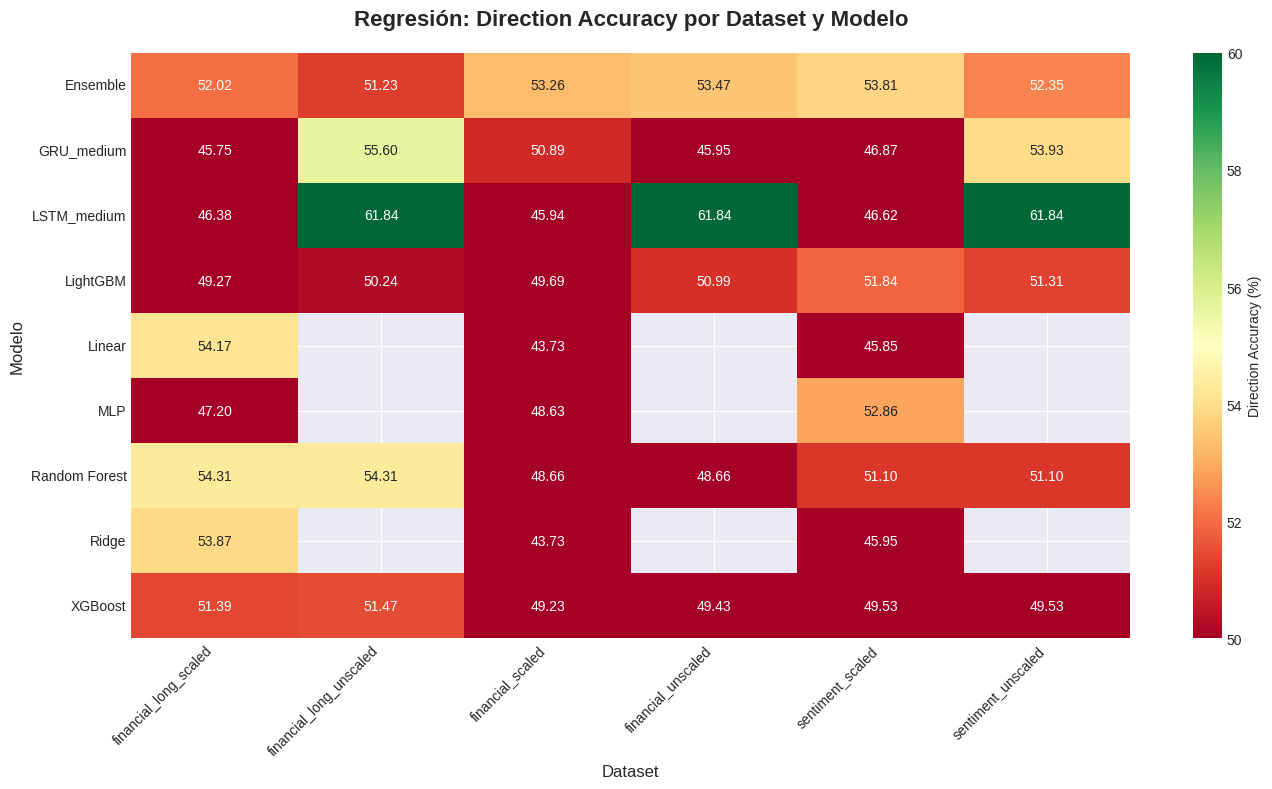

✓ Heatmap regresión guardado: /content/drive/MyDrive/TFM/results/plots/regression_heatmap.png
Barras comparativas - Mejor modelo de cada dataset


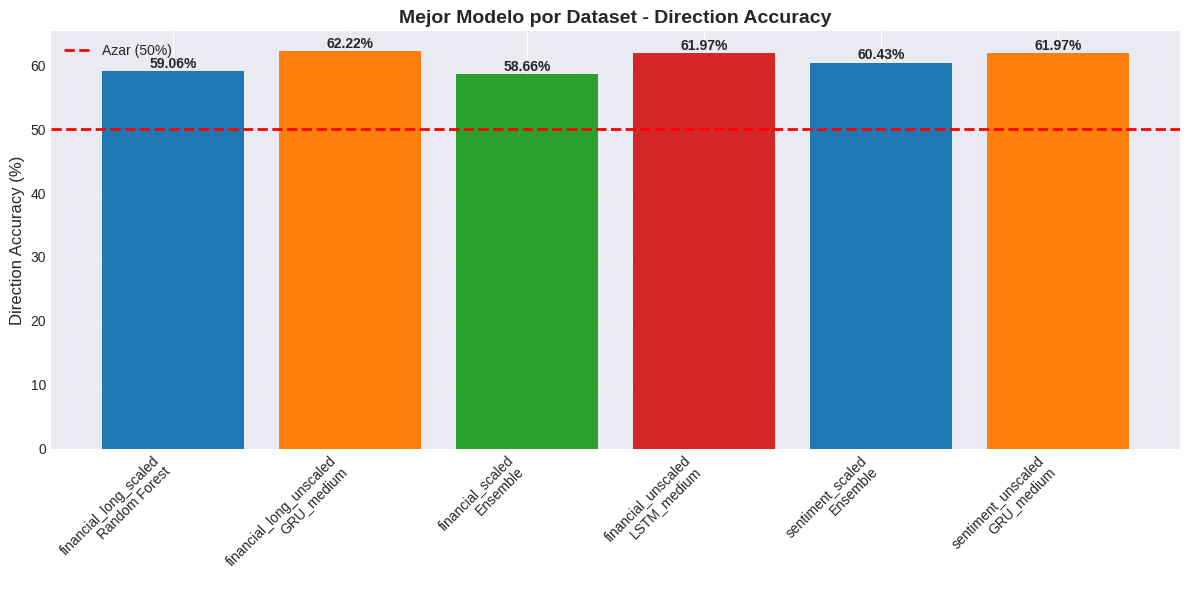

✓ Gráfico comparativo guardado: /content/drive/MyDrive/TFM/results/plots/best_per_dataset_regresion.png
Barras comparativas - Mejor modelo 


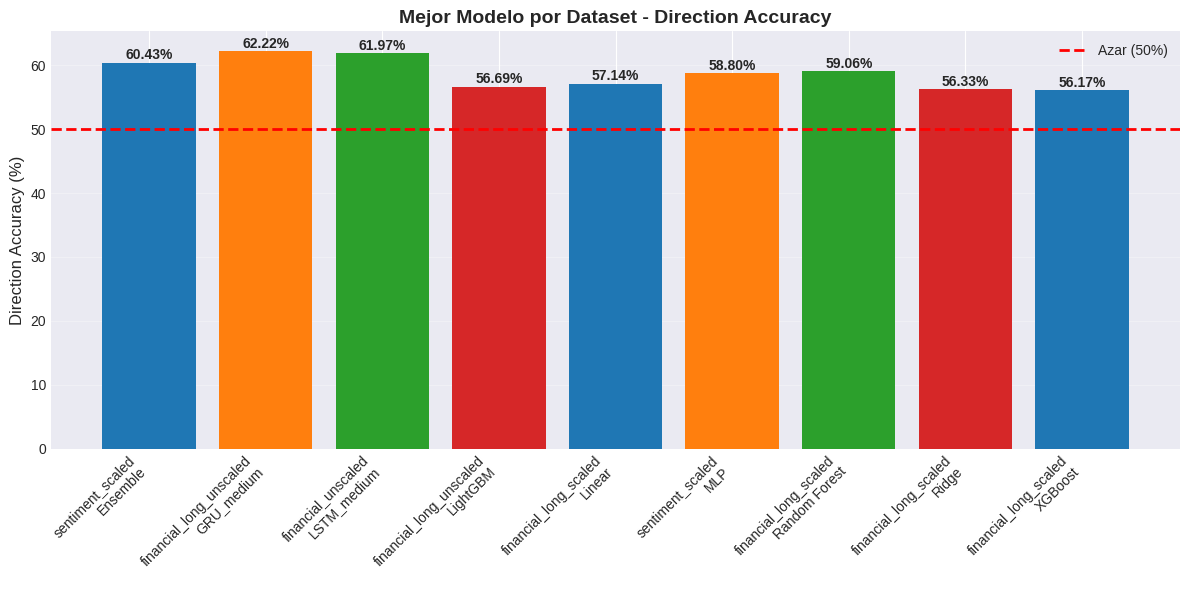

✓ Gráfico comparativo guardado: /content/drive/MyDrive/TFM/results/plots/best_model_regresion.png


In [14]:
print(f"\n\n{'='*70}")
print("GENERANDO VISUALIZACIONES")
print(f"{'='*70}\n")
print("Comparación Direction Accuracy entre datasets (regresión)")
# Plot 1: Comparación Direction Accuracy entre datasets (regresión)
if not reg_df.empty:
    plt.figure(figsize=(14, 8))

    # Agrupar por dataset y modelo, promediar direction accuracy
    grouped = reg_df.groupby(['dataset', 'model'])['Direction_Accuracy'].mean().reset_index()

    # Pivot para heatmap
    pivot_data = grouped.pivot(index='model', columns='dataset', values='Direction_Accuracy')

    sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='RdYlGn',
                vmin=50, vmax=60, center=55, cbar_kws={'label': 'Direction Accuracy (%)'})
    plt.title('Regresión: Direction Accuracy por Dataset y Modelo',
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Dataset', fontsize=12)
    plt.xticks(rotation =45, ha='right')
    plt.ylabel('Modelo', fontsize=12)
    plt.tight_layout()
    plt.savefig(os.path.join(PLOTS, 'regression_heatmap.png'), dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Heatmap regresión guardado: /content/drive/MyDrive/TFM/results/plots/regression_heatmap.png")

print("Barras comparativas - Mejor modelo de cada dataset")
# Plot 2: Barras comparativas - Mejor modelo de cada dataset
if not reg_df.empty:
    plt.figure(figsize=(12, 6))

    best_per_dataset = reg_df.loc[reg_df.groupby('dataset')['Direction_Accuracy'].idxmax()]

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    bars = plt.bar(range(len(best_per_dataset)),
                   best_per_dataset['Direction_Accuracy'],
                   color=colors[:len(best_per_dataset)])

    plt.axhline(y=50, color='red', linestyle='--', linewidth=2, label='Azar (50%)')
    plt.xticks(range(len(best_per_dataset)),
               [f"{row['dataset']}\n{row['model']}" for _, row in best_per_dataset.iterrows()],
               rotation=45, ha='right')
    plt.ylabel('Direction Accuracy (%)', fontsize=12)
    plt.title('Mejor Modelo por Dataset - Direction Accuracy',
              fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)

    # Añadir valores sobre las barras
    for i, (_, row) in enumerate(best_per_dataset.iterrows()):
        plt.text(i, row['Direction_Accuracy'] + 0.5,
                f"{row['Direction_Accuracy']:.2f}%",
                ha='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.savefig(os.path.join(PLOTS, 'best_per_dataset_regresion.png'), dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Gráfico comparativo guardado: /content/drive/MyDrive/TFM/results/plots/best_per_dataset_regresion.png")

print("Barras comparativas - Mejor modelo ")
# Plot 3: Barras comparativas - Mejor modelo
if not reg_df.empty:
    plt.figure(figsize=(12, 6))

    best_per_dataset = reg_df.loc[reg_df.groupby('model')['Direction_Accuracy'].idxmax()]

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    bars = plt.bar(range(len(best_per_dataset)),
                   best_per_dataset['Direction_Accuracy'],
                   color=colors[:len(best_per_dataset)])

    plt.axhline(y=50, color='red', linestyle='--', linewidth=2, label='Azar (50%)')
    plt.xticks(range(len(best_per_dataset)),
               [f"{row['dataset']}\n{row['model']}" for _, row in best_per_dataset.iterrows()],
               rotation=45, ha='right')
    plt.ylabel('Direction Accuracy (%)', fontsize=12)
    plt.title('Mejor Modelo por Dataset - Direction Accuracy',
              fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)

    # Añadir valores sobre las barras
    for i, (_, row) in enumerate(best_per_dataset.iterrows()):
        plt.text(i, row['Direction_Accuracy'] + 0.5,
                f"{row['Direction_Accuracy']:.2f}%",
                ha='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.savefig(os.path.join(PLOTS, 'best_model_regresion.png'), dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Gráfico comparativo guardado: /content/drive/MyDrive/TFM/results/plots/best_model_regresion.png")

### 5.3 Top Modelos - Clasificación

In [15]:
if not clf_df.empty:
    print(f"\n\n{'='*70}")
    print("RESUMEN FINAL - CLASIFICACIÓN")
    print(f"{'='*70}\n")

    # Top 10 modelos por F1 (global)
    print("== TOP 10 MODELOS (por F1) ==\n")
    top_clf = clf_df.sort_values('F1', ascending=False).head(10)
    print(top_clf[['dataset', 'target', 'model', 'F1', 'Accuracy', 'ROC_AUC']].to_string(index=False))

    # Mejor modelo por dataset
    print("\n\n== MEJOR MODELO POR DATASET ==\n")
    best_by_dataset = clf_df.loc[clf_df.groupby('dataset')['F1'].idxmax()]
    print(best_by_dataset[['dataset', 'target', 'model', 'F1', 'Accuracy']].to_string(index=False))

    # Mejor modelo por target
    print("\n\n== MEJOR MODELO POR TARGET ==\n")
    best_by_target = clf_df.loc[clf_df.groupby('target')['F1'].idxmax()]
    print(best_by_target[['target', 'dataset', 'model', 'F1', 'Accuracy']].to_string(index=False))

    # Comparación entre datasets
    print("\n\n== COMPARACIÓN ENTRE DATASETS (mismo target y modelo) ==\n")
    for target in custom_config.get('targets_classification',[]):
        target_data = clf_df[clf_df['target'] == target]
        if not target_data.empty:
            print(f"\nTarget: {target}")
            pivot = target_data.pivot_table(
                index='model',
                columns='dataset',
                values='F1',
                aggfunc='mean'
            )
            print(pivot.round(4).to_string())




RESUMEN FINAL - CLASIFICACIÓN

== TOP 10 MODELOS (por F1) ==

                dataset            target       model       F1  Accuracy  ROC_AUC
       financial_scaled    direction_next  GRU_medium 0.765957  0.623932 0.542193
     financial_unscaled    direction_next LSTM_medium 0.765172  0.619658 0.489151
financial_long_unscaled    direction_next LSTM_medium 0.765172  0.619658 0.510849
     financial_unscaled    direction_next  GRU_medium 0.765172  0.619658 0.500000
     sentiment_unscaled    direction_next LSTM_medium 0.765172  0.619658 0.510849
financial_long_unscaled direction_next_20 LSTM_medium 0.764368  0.618605 0.500000
     financial_unscaled direction_next_20 LSTM_medium 0.764368  0.618605 0.500000
     sentiment_unscaled direction_next_20 LSTM_medium 0.764368  0.618605 0.500000
       sentiment_scaled    direction_next  GRU_medium 0.763926  0.619658 0.431383
     sentiment_unscaled direction_next_10  GRU_medium 0.763736  0.617778 0.458508


== MEJOR MODELO POR DATASET ==



#### Visualización Modelos clasificación



GENERANDO VISUALIZACIONES

Comparación Direction Accuracy entre datasets (clasificación)


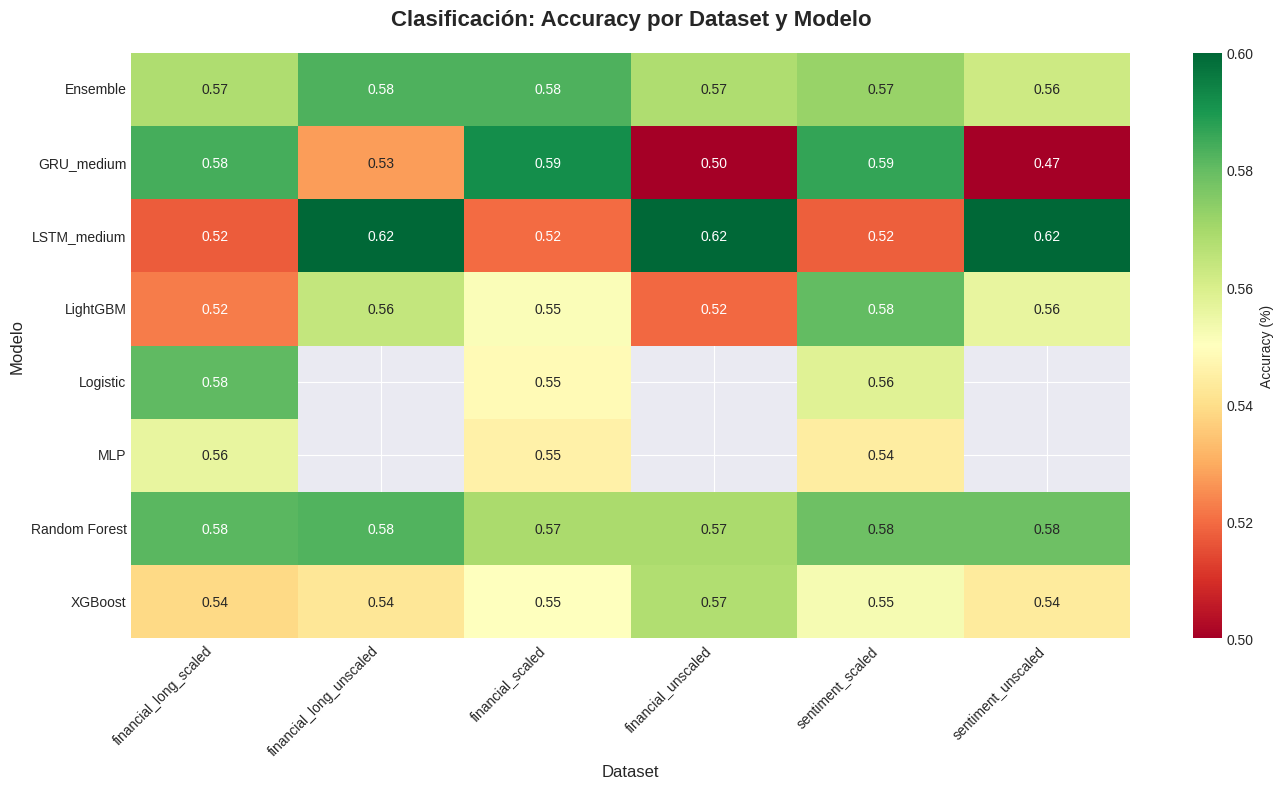

✓ Heatmap clasificación guardado: /content/drive/MyDrive/TFM/results/plots/clasificacion_heatmap.png
Barras comparativas - Mejor modelo de cada dataset


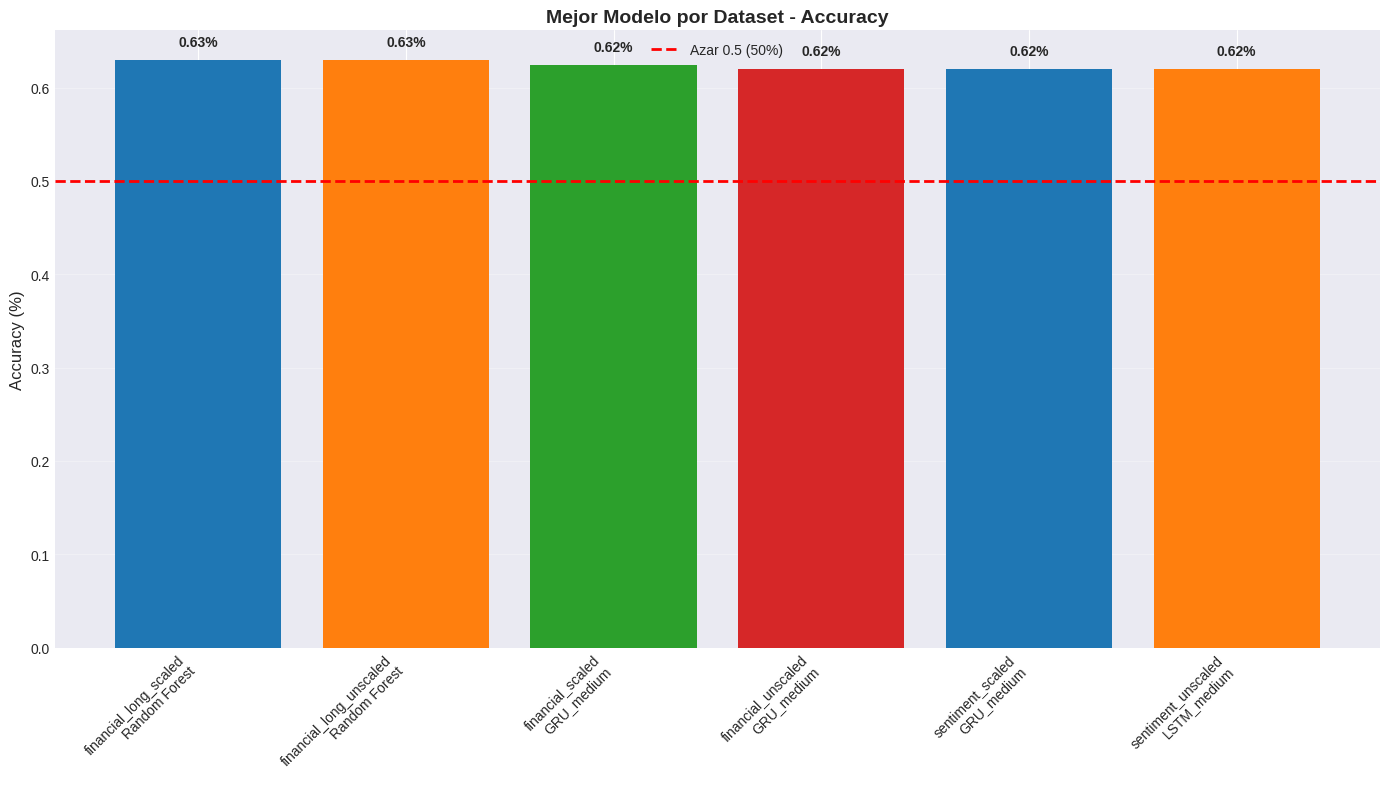

✓ Gráfico comparativo guardado: /content/drive/MyDrive/TFM/results/plots/best_clasificacion_per_dataset.png
Barras comparativas - Mejor modelo 


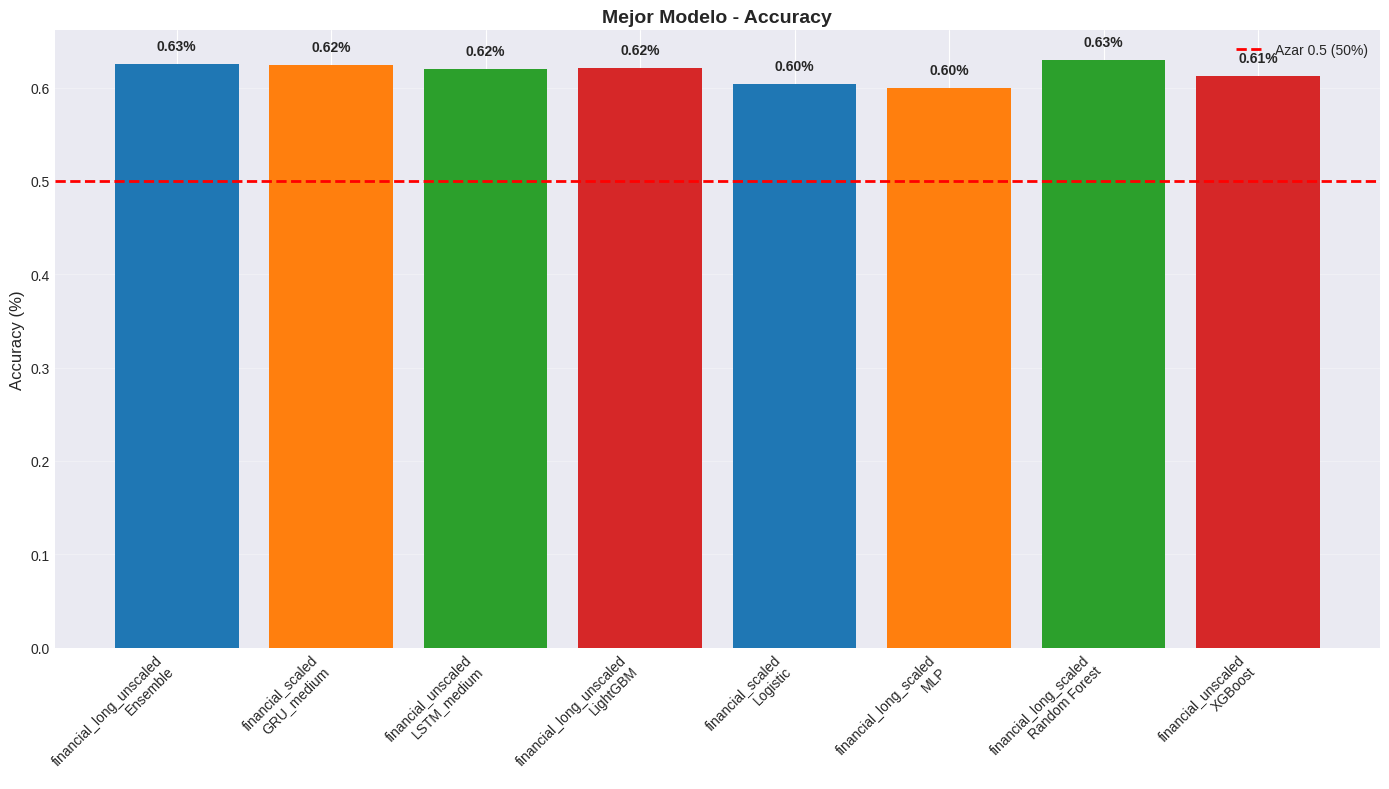

✓ Gráfico comparativo guardado: /content/drive/MyDrive/TFM/results/plots/best_model_clasificacion.png


In [16]:
print(f"\n\n{'='*70}")
print("GENERANDO VISUALIZACIONES")
print(f"{'='*70}\n")
print("Comparación Direction Accuracy entre datasets (clasificación)")
# Plot 1: Comparación Direction Accuracy entre datasets (clasificación)
if not clf_df.empty:
    plt.figure(figsize=(14, 8))

    # Agrupar por dataset y modelo, promediar direction accuracy
    grouped = clf_df.groupby(['dataset', 'model'])['Accuracy'].mean().reset_index()

    # Pivot para heatmap
    pivot_data = grouped.pivot(index='model', columns='dataset', values='Accuracy')

    sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='RdYlGn',
                vmin=0.5, vmax=0.6, center=0.55, cbar_kws={'label': 'Accuracy (%)'})
    plt.title('Clasificación: Accuracy por Dataset y Modelo',
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Dataset', fontsize=12)
    plt.xticks(rotation =45, ha='right')
    plt.ylabel('Modelo', fontsize=12)
    plt.tight_layout()
    plt.savefig(os.path.join(PLOTS, 'clasificación_heatmap.png'), dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Heatmap clasificación guardado: /content/drive/MyDrive/TFM/results/plots/clasificacion_heatmap.png")

print("Barras comparativas - Mejor modelo de cada dataset")
# Plot 2: Barras comparativas - Mejor modelo de cada dataset
if not clf_df.empty:
    plt.figure(figsize=(14, 8))

    best_per_dataset = clf_df.loc[clf_df.groupby('dataset')['Accuracy'].idxmax()]

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    bars = plt.bar(range(len(best_per_dataset)),
                   best_per_dataset['Accuracy'],
                   color=colors[:len(best_per_dataset)])

    plt.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='Azar 0.5 (50%)')
    plt.xticks(range(len(best_per_dataset)),
               [f"{row['dataset']}\n{row['model']}" for _, row in best_per_dataset.iterrows()],
               rotation=45,ha='right')
    plt.ylabel('Accuracy (%)', fontsize=12)
    plt.title('Mejor Modelo por Dataset - Accuracy',
              fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)

    # Añadir valores sobre las barras
    for i, (_, row) in enumerate(best_per_dataset.iterrows()):
        plt.text(i, row['Accuracy'] + 0.015,
                f"{row['Accuracy']:.2f}%",
                ha='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.savefig(os.path.join(PLOTS, 'best_clasificacion_per_dataset.png'), dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Gráfico comparativo guardado: /content/drive/MyDrive/TFM/results/plots/best_clasificacion_per_dataset.png")

print("Barras comparativas - Mejor modelo ")
# Plot 3: Barras comparativas - Mejor modelo
if not clf_df.empty:
    plt.figure(figsize=(14, 8))

    best_per_model = clf_df.loc[clf_df.groupby('model')['Accuracy'].idxmax()]

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    bars = plt.bar(range(len(best_per_model)),
                   best_per_model['Accuracy'],
                   color=colors[:len(best_per_model)])

    plt.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='Azar 0.5 (50%)')
    plt.xticks(range(len(best_per_model)),
               [f"{row['dataset']}\n{row['model']}" for _, row in best_per_model.iterrows()],
               rotation=45, ha='right')
    plt.ylabel('Accuracy (%)', fontsize=12)
    plt.title('Mejor Modelo - Accuracy',
              fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)

    # Añadir valores sobre las barras
    for i, (_, row) in enumerate(best_per_model.iterrows()):
        plt.text(i, row['Accuracy'] + 0.015,
                f"{row['Accuracy']:.2f}%",
                ha='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.savefig(os.path.join(PLOTS, 'best_model_clasificacion.png'), dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Gráfico comparativo guardado: /content/drive/MyDrive/TFM/results/plots/best_model_clasificacion.png")

### 5.4 Comparación por Dataset

MEJOR MODELO POR DATASET - REGRESIÓN
                dataset       target         model     RMSE      MAE       R2
  financial_long_scaled returns_next Random Forest 0.966141 0.706804 0.126334
financial_long_unscaled returns_next Random Forest 0.966141 0.706804 0.126334
       financial_scaled returns_next Random Forest 0.993420 0.731553 0.076302
     financial_unscaled returns_next Random Forest 0.993420 0.731553 0.076302
       sentiment_scaled returns_next Random Forest 0.987659 0.720701 0.086983
     sentiment_unscaled returns_next Random Forest 0.987578 0.720623 0.087133


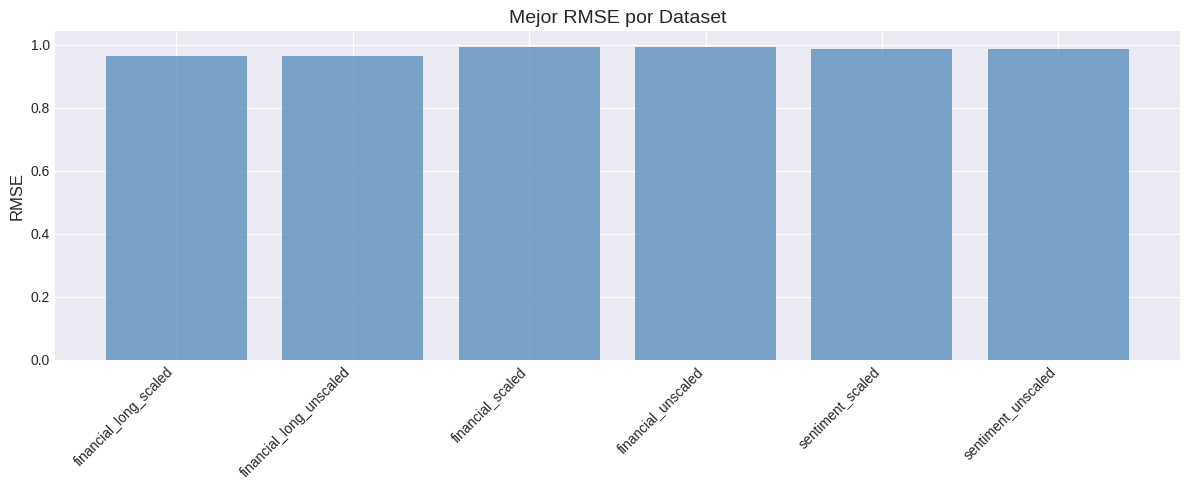


MEJOR MODELO POR DATASET - CLASIFICACIÓN
                dataset            target         model  Accuracy       F1
  financial_long_scaled direction_next_20 Random Forest  0.629787 0.759003
financial_long_unscaled direction_next_20 Random Forest  0.629787 0.759003
       financial_scaled    direction_next    GRU_medium  0.623932 0.765957
     financial_unscaled    direction_next    GRU_medium  0.619658 0.765172
       sentiment_scaled    direction_next    GRU_medium  0.619658 0.763926
     sentiment_unscaled    direction_next   LSTM_medium  0.619658 0.765172

✓ Plot guardado: /content/drive/MyDrive/TFM/results/plots/best_accuracy_by_dataset.png


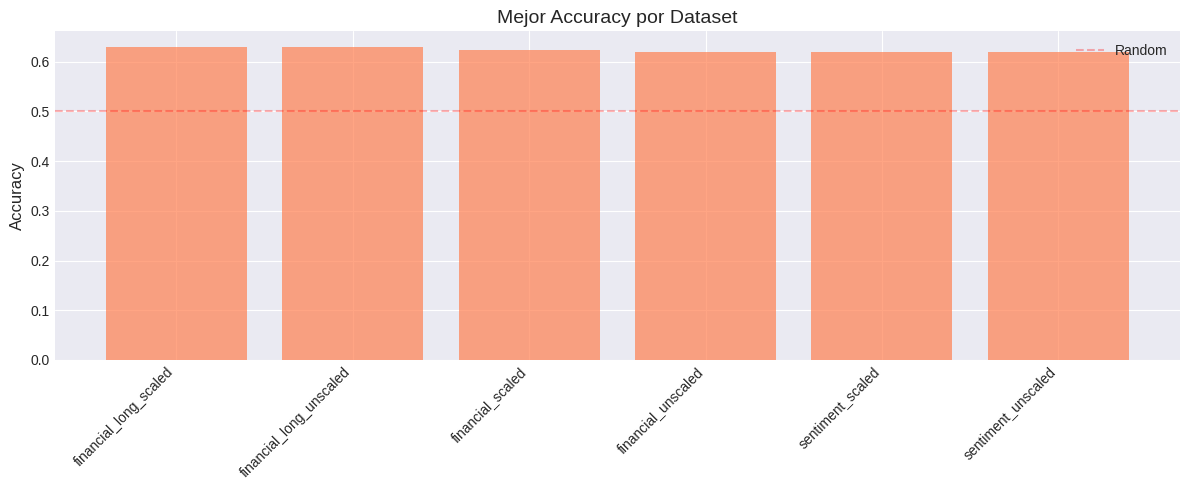

In [17]:
# Mejor modelo por dataset - Regresión
best_reg = reg_df.loc[reg_df.groupby('dataset')['RMSE'].idxmin()]

print("MEJOR MODELO POR DATASET - REGRESIÓN")
print("="*70)
print(best_reg[['dataset', 'target', 'model', 'RMSE', 'MAE', 'R2']].to_string(index=False))

# Visualización
if len(best_reg) > 1:
    plt.figure(figsize=(12, 5))
    x = range(len(best_reg))
    plt.bar(x, best_reg['RMSE'], alpha=0.7, color='steelblue')
    plt.xticks(x, best_reg['dataset'], rotation=45, ha='right')
    plt.ylabel('RMSE', fontsize=12)
    plt.title('Mejor RMSE por Dataset', fontsize=14)
    plt.tight_layout()
    plt.show()

# Mejor modelo por dataset - Clasificación
best_clf = clf_df.loc[clf_df.groupby('dataset')['Accuracy'].idxmax()]

print("\nMEJOR MODELO POR DATASET - CLASIFICACIÓN")
print("="*70)
print(best_clf[['dataset', 'target', 'model', 'Accuracy', 'F1']].to_string(index=False))

# Visualización
if len(best_clf) > 1:
    plt.figure(figsize=(12, 5))
    x = range(len(best_clf))
    plt.bar(x, best_clf['Accuracy'], alpha=0.7, color='coral')
    plt.axhline(0.5, color='r', linestyle='--', alpha=0.3, label='Random')
    plt.xticks(x, best_clf['dataset'], rotation=45, ha='right')
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Mejor Accuracy por Dataset', fontsize=14)
    plt.legend()
    plt.tight_layout()

    # Guardar plot
    plot_file = PLOTS / 'best_accuracy_by_dataset.png'
    plt.savefig(plot_file, dpi=300, bbox_inches='tight')
    print(f"\n✓ Plot guardado: {plot_file}")

    plt.show()

### 5.5 Comparación por Tipo de Modelo

RMSE PROMEDIO POR MODELO - REGRESIÓN
                      mean          std  count
model                                         
Ensemble          1.035801     0.022627     24
Random Forest     1.047378     0.039309     24
LSTM_medium       1.057980     0.016556     24
MLP               1.068882     0.037533     12
Ridge             1.110278     0.074783     12
Linear            1.110966     0.075286     12
LightGBM          1.115331     0.043241     24
XGBoost           1.140396     0.049812     24
GRU_medium     1539.286855  4194.500410     24

ACCURACY PROMEDIO POR MODELO - CLASIFICACIÓN
                   mean       std  count
model                                   
Random Forest  0.576463  0.035102     24
Ensemble       0.572830  0.024104     24
LSTM_medium    0.568292  0.062945     24
Logistic       0.562234  0.037696     12
XGBoost        0.549255  0.029349     24
LightGBM       0.548940  0.039635     24
MLP            0.548575  0.038419     12
GRU_medium     0.542943  0.0924

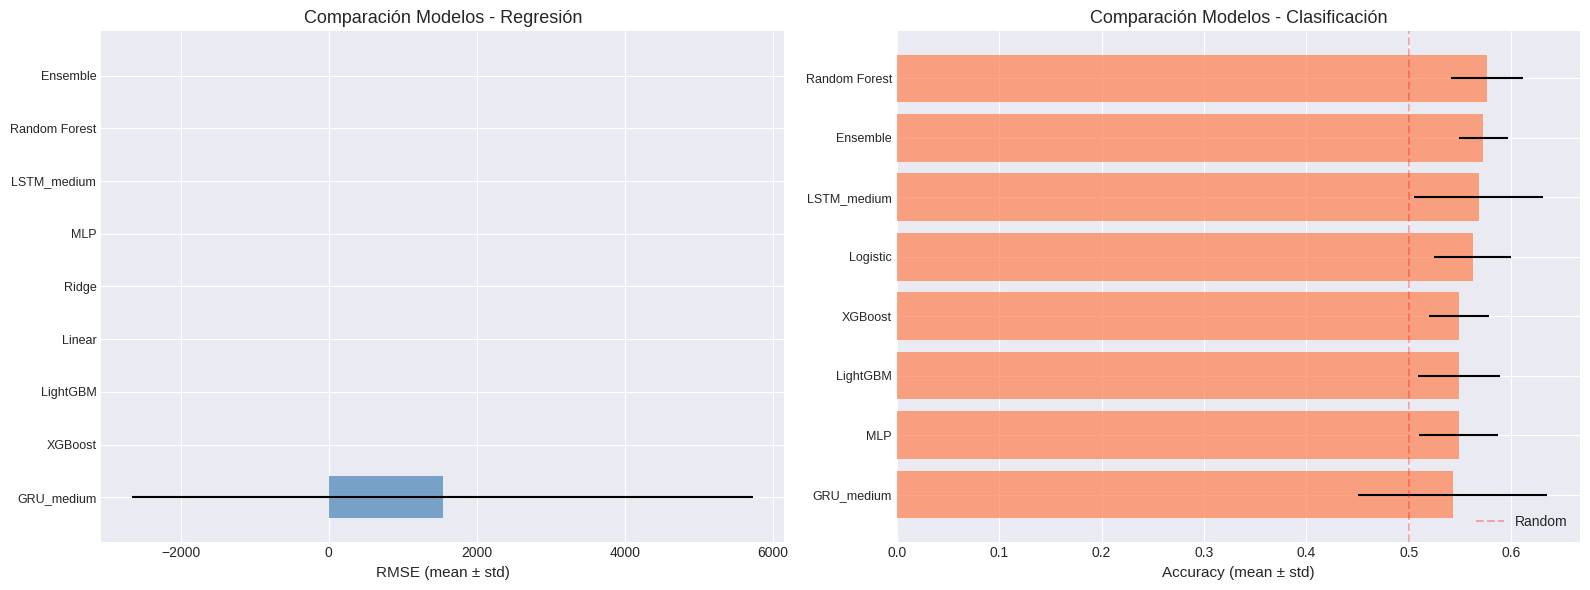

In [18]:
# Regresión: RMSE promedio por modelo
reg_by_model = reg_df.groupby('model')['RMSE'].agg(['mean', 'std', 'count']).sort_values('mean')

print("RMSE PROMEDIO POR MODELO - REGRESIÓN")
print("="*70)
print(reg_by_model.to_string())

# Clasificación: Accuracy promedio por modelo
clf_by_model = clf_df.groupby('model')['Accuracy'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)

print("\nACCURACY PROMEDIO POR MODELO - CLASIFICACIÓN")
print("="*70)
print(clf_by_model.to_string())

# Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Regresión
axes[0].barh(range(len(reg_by_model)), reg_by_model['mean'],
             xerr=reg_by_model['std'], alpha=0.7, color='steelblue')
axes[0].set_yticks(range(len(reg_by_model)))
axes[0].set_yticklabels(reg_by_model.index, fontsize=9)
axes[0].set_xlabel('RMSE (mean ± std)', fontsize=11)
axes[0].set_title('Comparación Modelos - Regresión', fontsize=13)
axes[0].invert_yaxis()

# Clasificación
axes[1].barh(range(len(clf_by_model)), clf_by_model['mean'],
             xerr=clf_by_model['std'], alpha=0.7, color='coral')
axes[1].set_yticks(range(len(clf_by_model)))
axes[1].set_yticklabels(clf_by_model.index, fontsize=9)
axes[1].set_xlabel('Accuracy (mean ± std)', fontsize=11)
axes[1].set_title('Comparación Modelos - Clasificación', fontsize=13)
axes[1].axvline(0.5, color='r', linestyle='--', alpha=0.3, label='Random')
axes[1].invert_yaxis()
axes[1].legend()

plt.tight_layout()

# Guardar plot
plot_file = PLOTS / 'model_comparison.png'
plt.savefig(plot_file, dpi=300, bbox_inches='tight')
print(f"\n✓ Plot guardado: {plot_file}")
plt.show()

## 6. Visualizaciones Avanzadas

Generar plots: matrices de confusión, comparaciones estadísticas

### 6.1 Matrices de Confusión (Clasificación)

Generando matrices de confusión...

financial_scaled - direction_next: 8 modelos
  Encontrados 8 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_Logistic_confusion_matrix.png


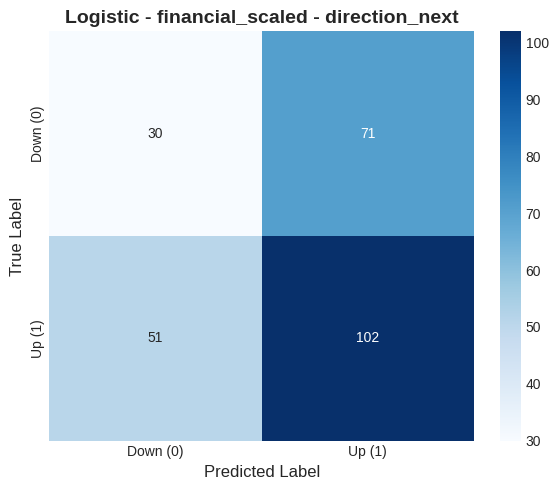

  ✓ Matriz generada para Logistic
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_Random_Forest_confusion_matrix.png


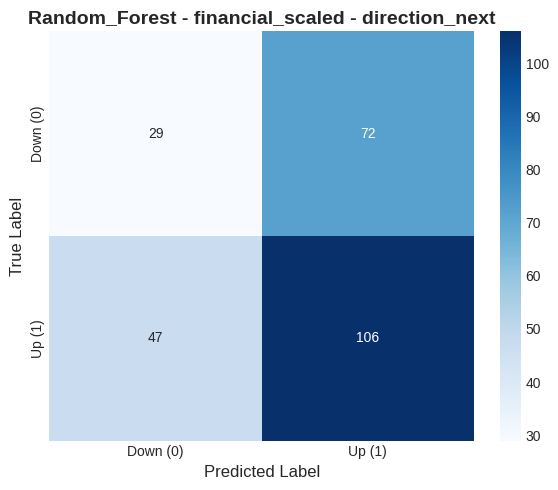

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_XGBoost_confusion_matrix.png


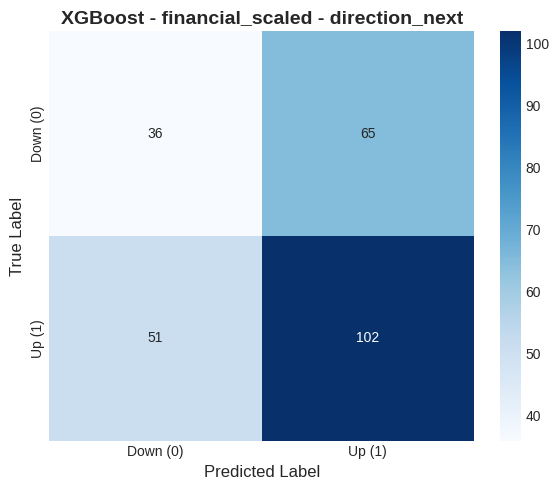

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_LightGBM_confusion_matrix.png


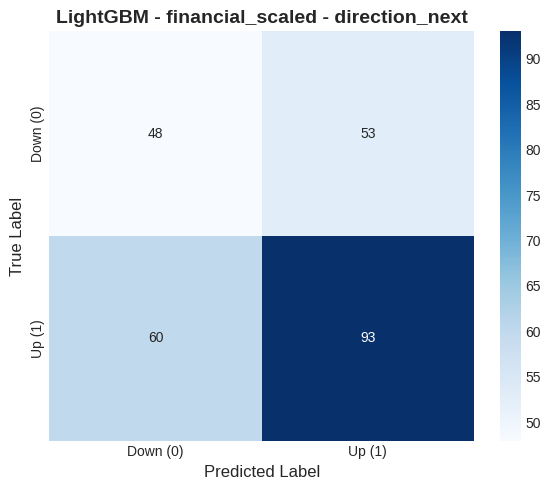

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_MLP_confusion_matrix.png


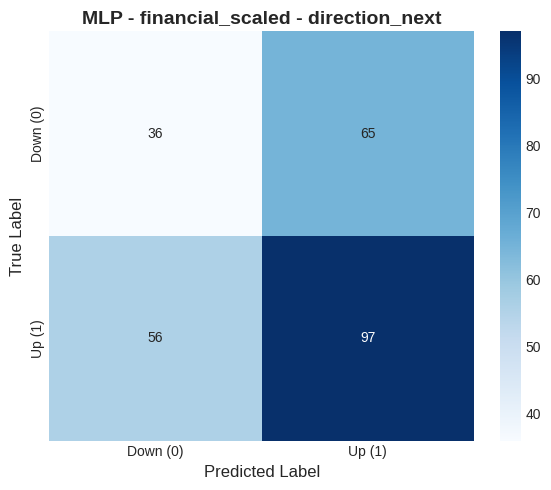

  ✓ Matriz generada para MLP
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_Ensemble_confusion_matrix.png


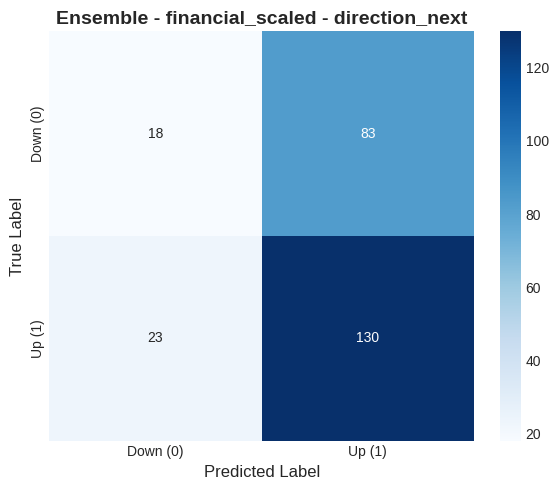

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_GRU_medium_confusion_matrix.png


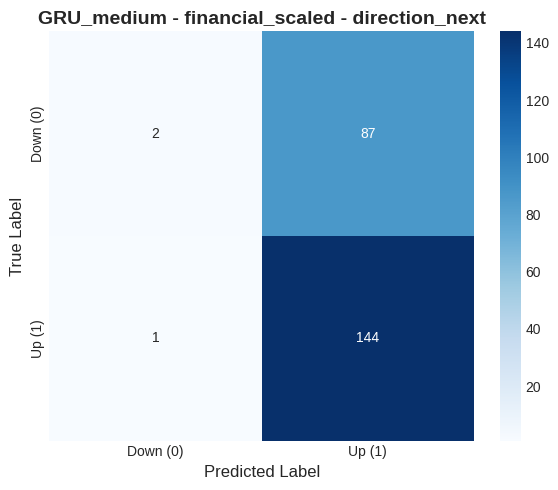

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_LSTM_medium_confusion_matrix.png


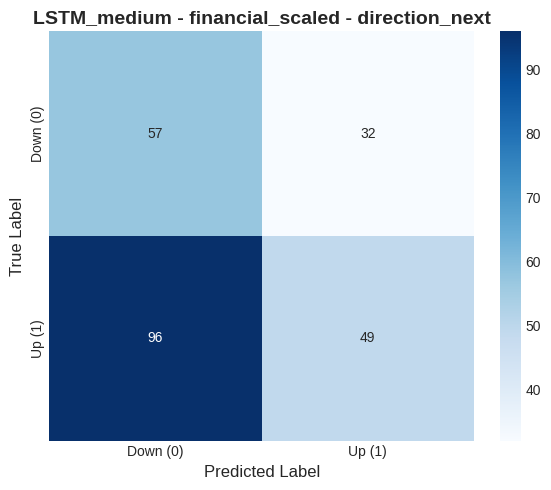

  ✓ Matriz generada para LSTM_medium

financial_scaled - direction_next_5: 8 modelos
  Encontrados 8 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_5_Logistic_confusion_matrix.png


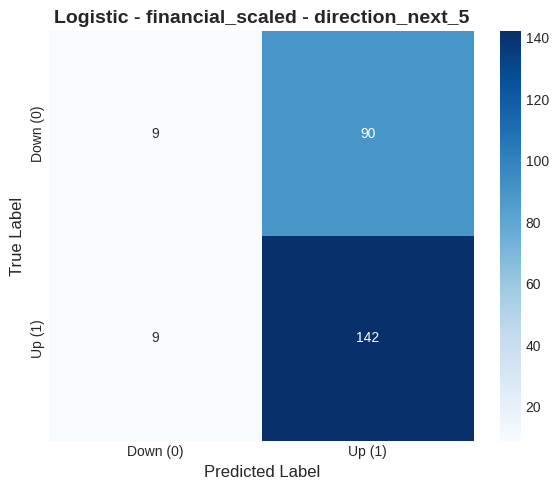

  ✓ Matriz generada para Logistic
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_5_Random_Forest_confusion_matrix.png


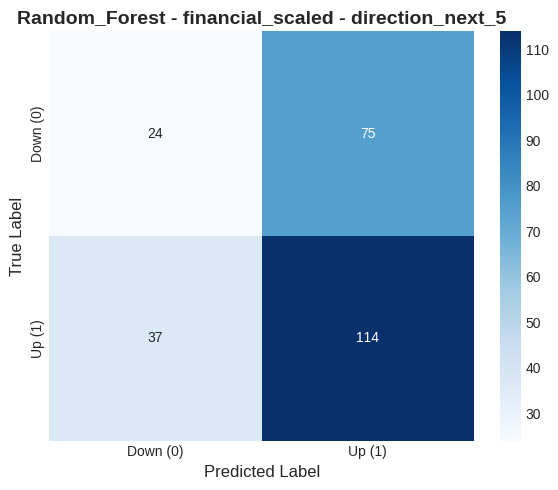

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_5_XGBoost_confusion_matrix.png


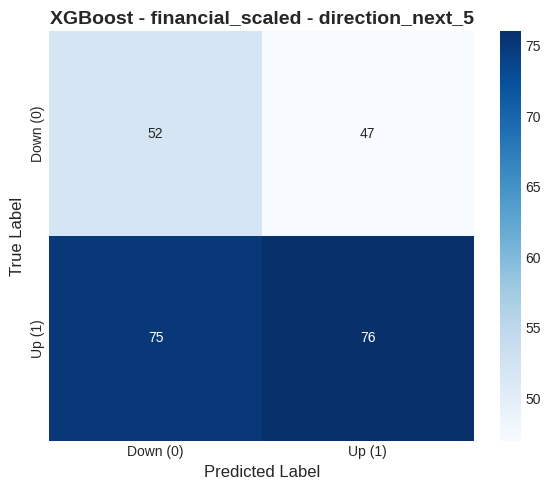

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_5_LightGBM_confusion_matrix.png


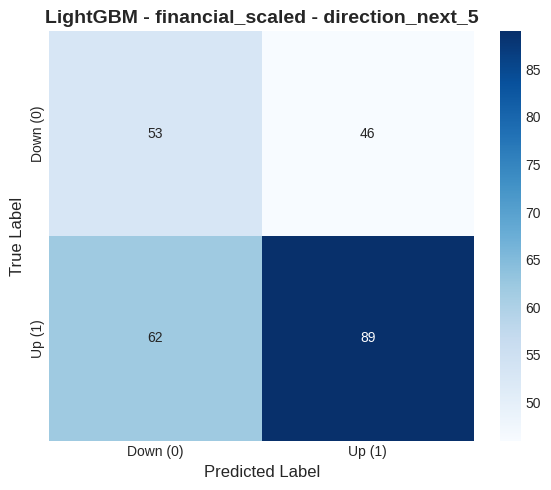

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_5_MLP_confusion_matrix.png


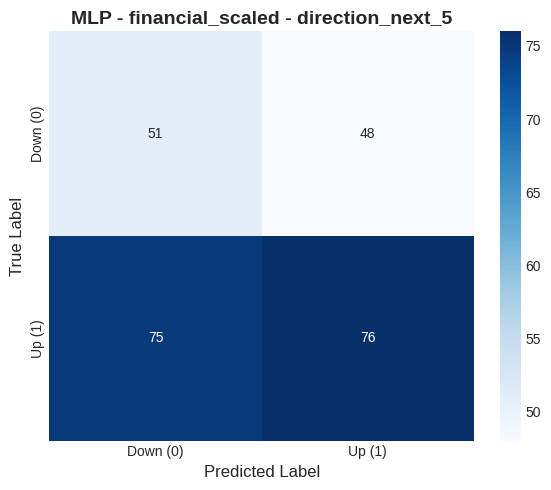

  ✓ Matriz generada para MLP
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_5_Ensemble_confusion_matrix.png


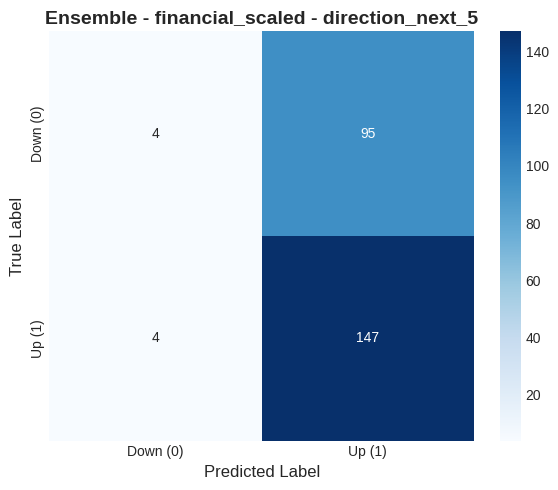

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_5_GRU_medium_confusion_matrix.png


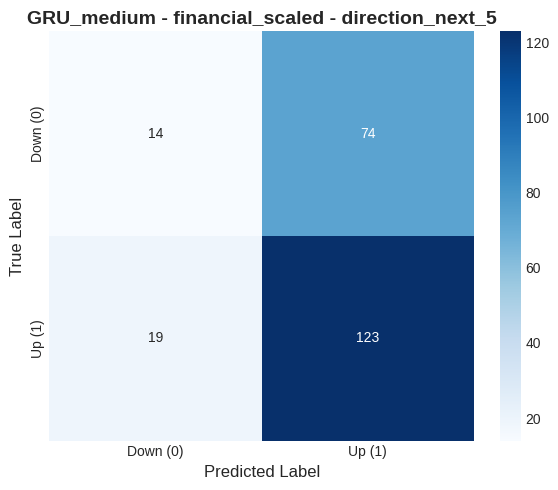

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_5_LSTM_medium_confusion_matrix.png


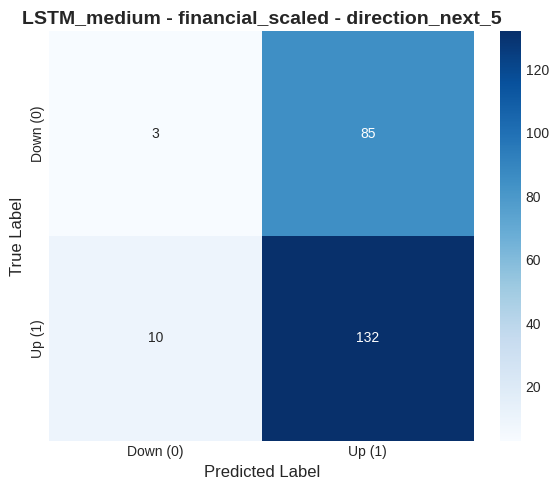

  ✓ Matriz generada para LSTM_medium

financial_scaled - direction_next_10: 8 modelos
  Encontrados 8 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_10_Logistic_confusion_matrix.png


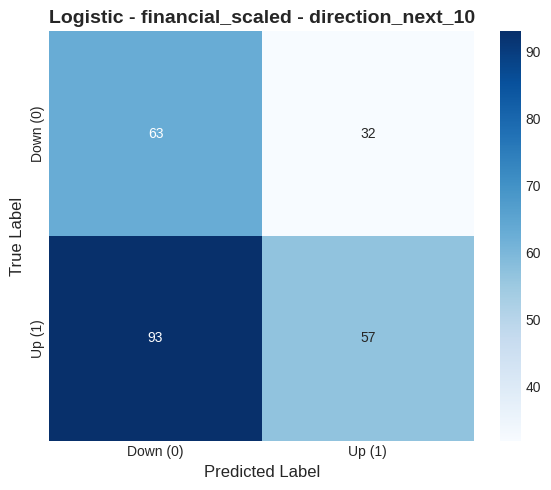

  ✓ Matriz generada para Logistic
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_10_Random_Forest_confusion_matrix.png


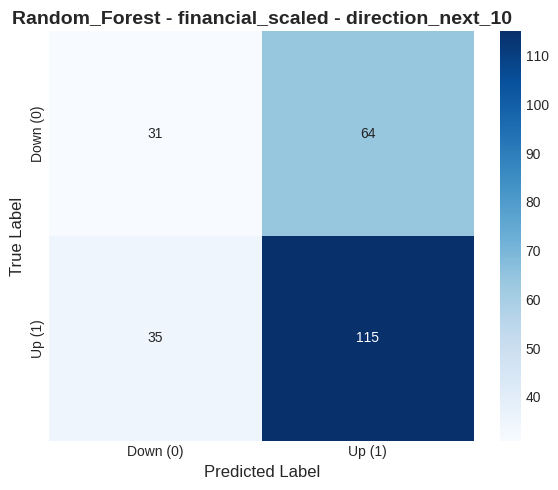

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_10_XGBoost_confusion_matrix.png


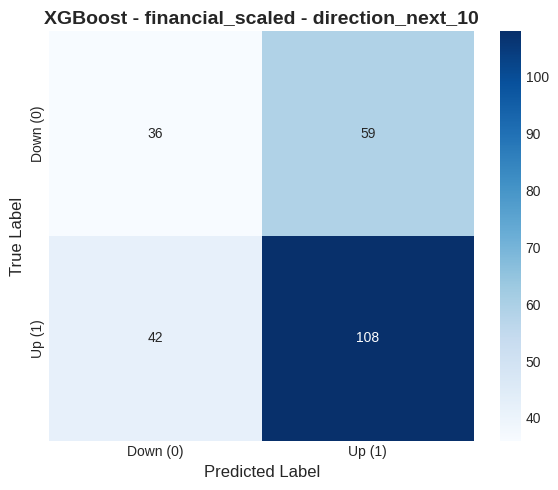

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_10_LightGBM_confusion_matrix.png


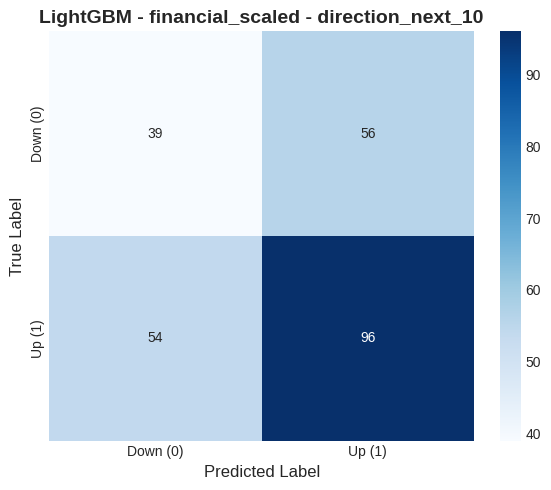

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_10_MLP_confusion_matrix.png


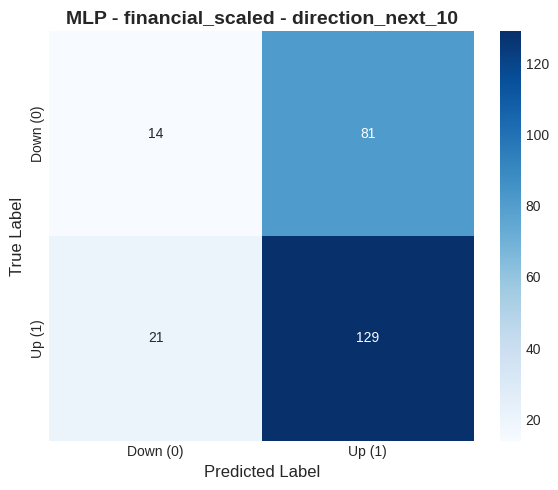

  ✓ Matriz generada para MLP
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_10_Ensemble_confusion_matrix.png


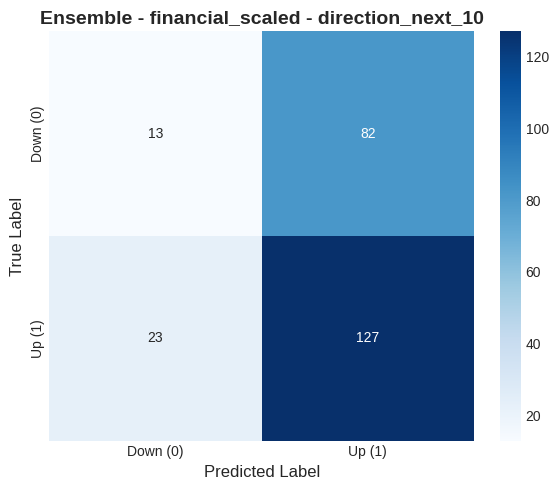

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_10_GRU_medium_confusion_matrix.png


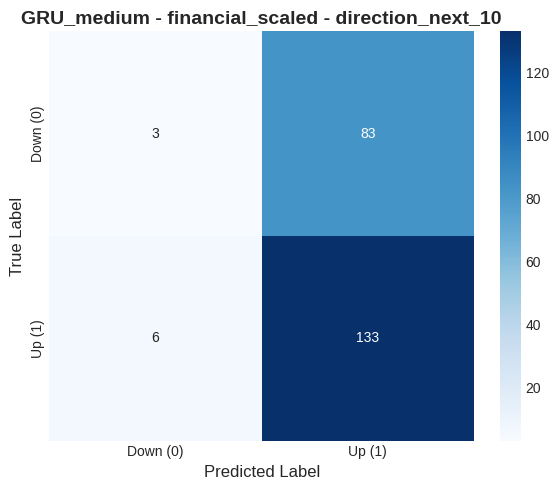

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_10_LSTM_medium_confusion_matrix.png


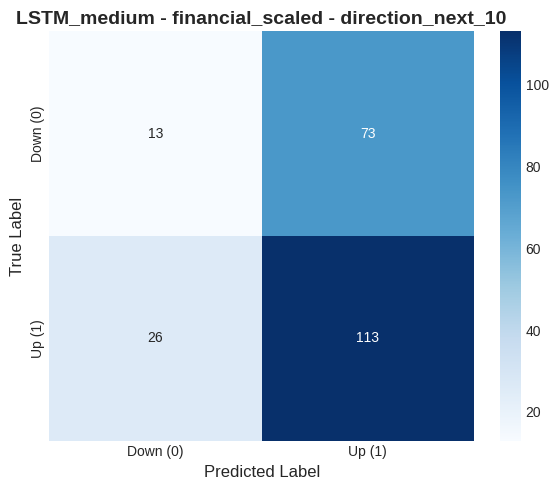

  ✓ Matriz generada para LSTM_medium

financial_scaled - direction_next_20: 8 modelos
  Encontrados 8 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_20_Logistic_confusion_matrix.png


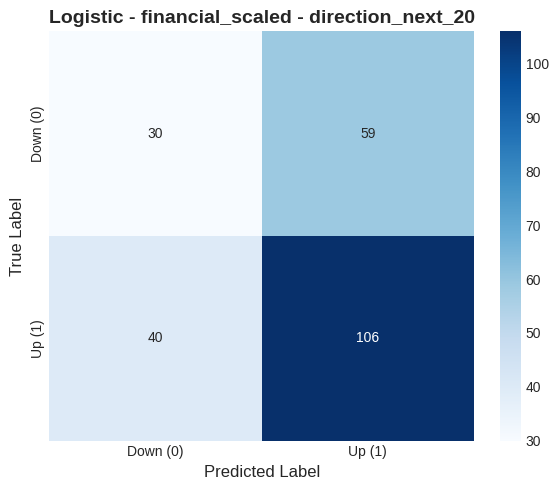

  ✓ Matriz generada para Logistic
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_20_Random_Forest_confusion_matrix.png


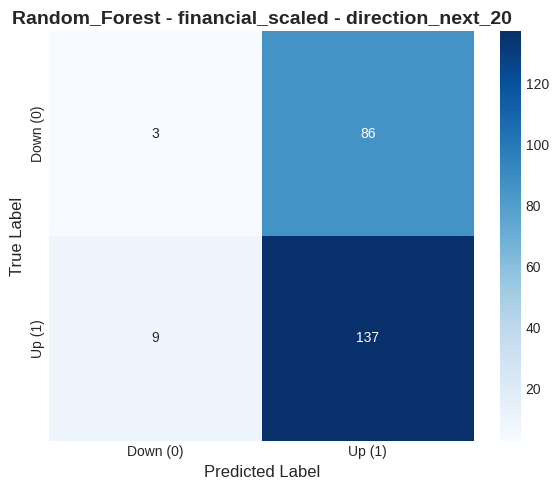

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_20_XGBoost_confusion_matrix.png


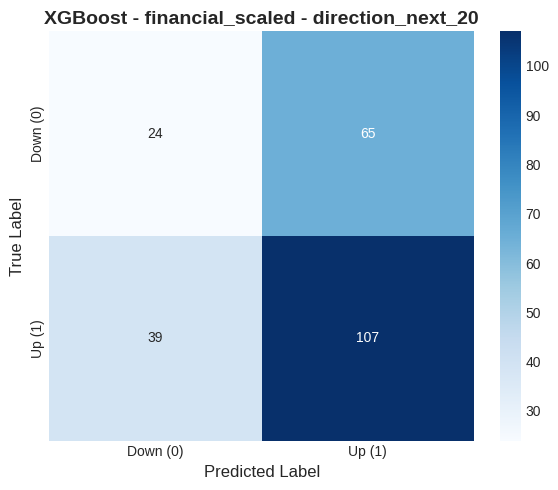

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_20_LightGBM_confusion_matrix.png


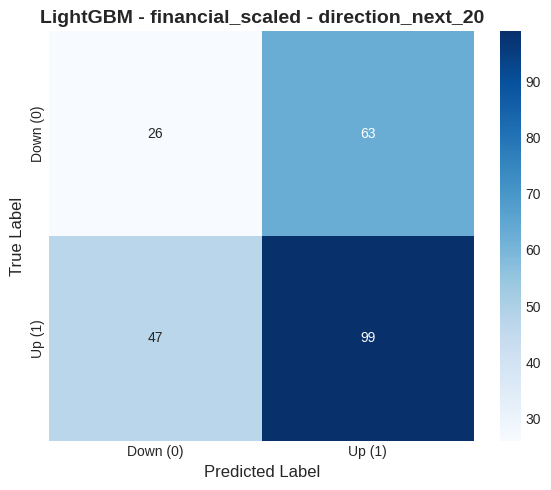

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_20_MLP_confusion_matrix.png


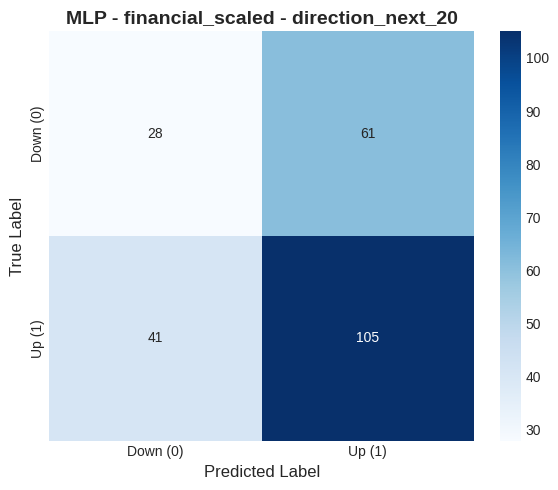

  ✓ Matriz generada para MLP
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_20_Ensemble_confusion_matrix.png


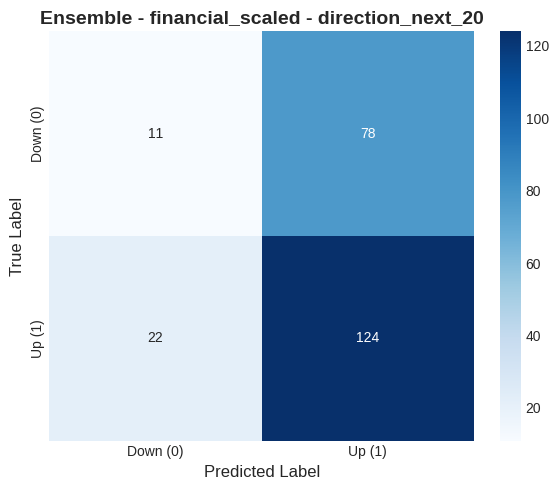

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_20_GRU_medium_confusion_matrix.png


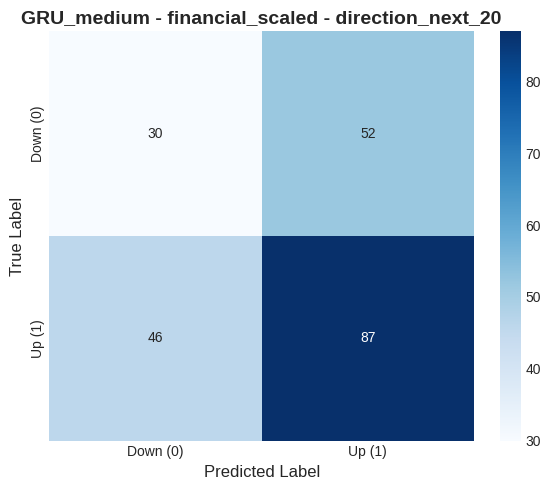

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_scaled_direction_next_20_LSTM_medium_confusion_matrix.png


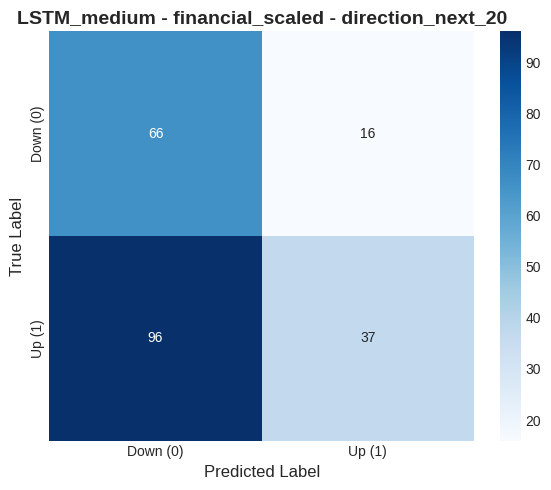

  ✓ Matriz generada para LSTM_medium

financial_unscaled - direction_next: 6 modelos
  Encontrados 6 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_Random_Forest_confusion_matrix.png


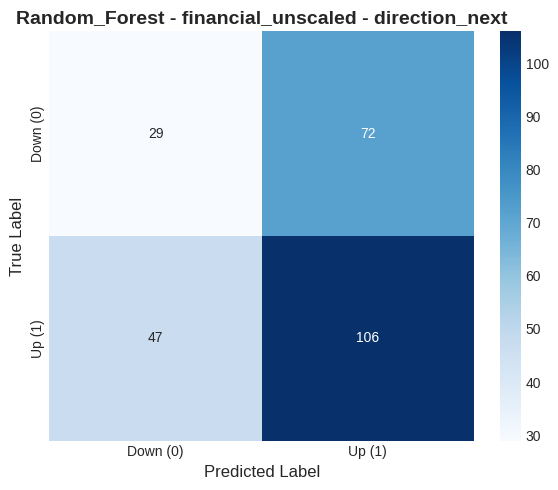

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_XGBoost_confusion_matrix.png


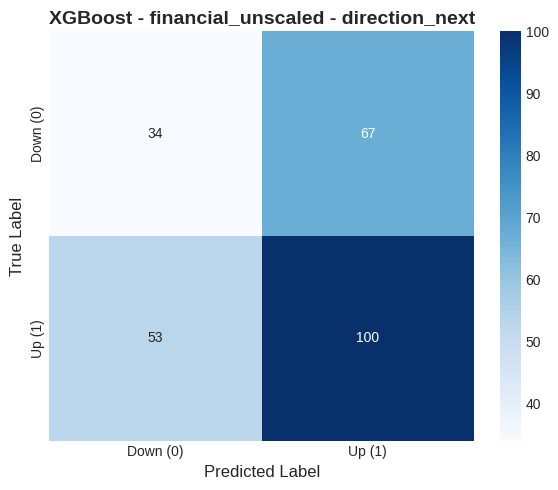

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_LightGBM_confusion_matrix.png


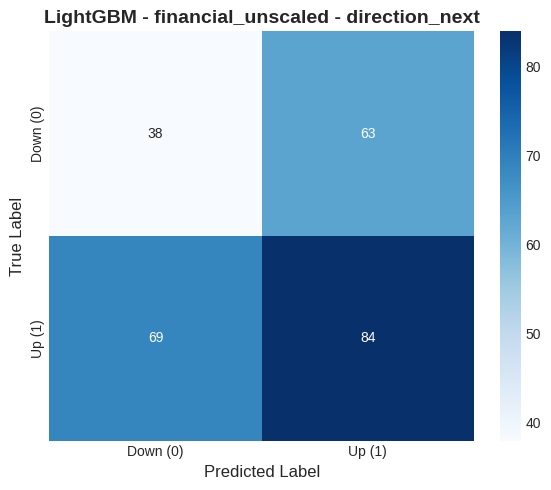

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_Ensemble_confusion_matrix.png


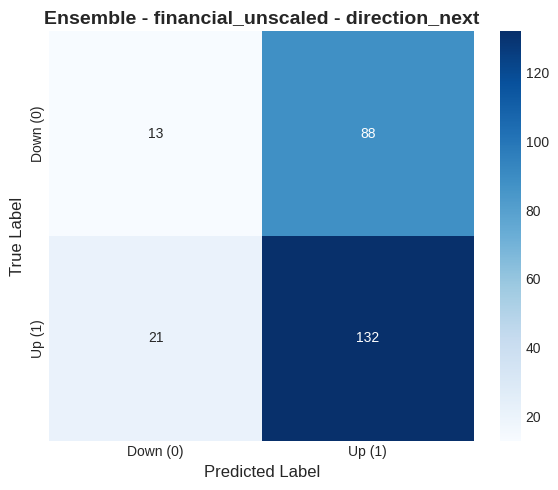

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_GRU_medium_confusion_matrix.png


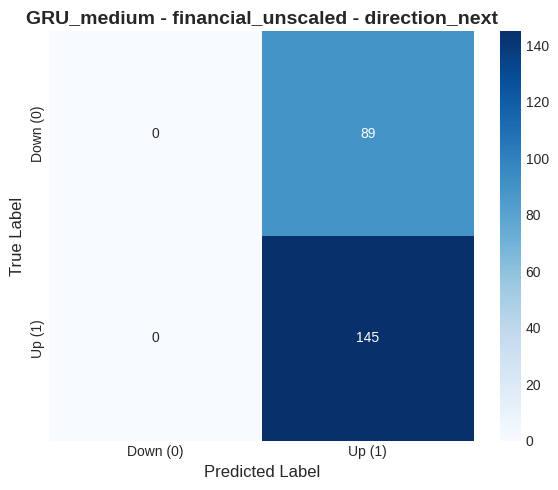

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_LSTM_medium_confusion_matrix.png


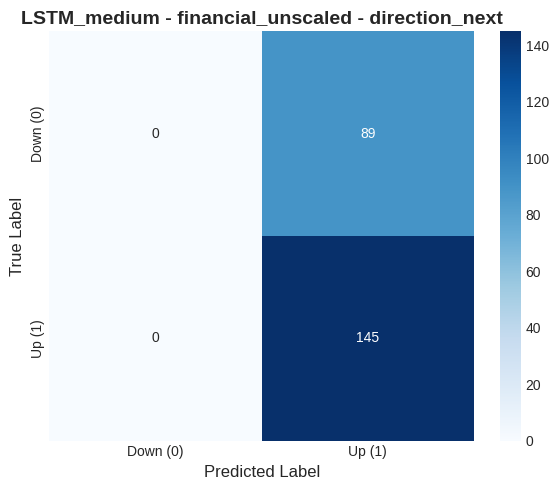

  ✓ Matriz generada para LSTM_medium

financial_unscaled - direction_next_5: 6 modelos
  Encontrados 6 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_5_Random_Forest_confusion_matrix.png


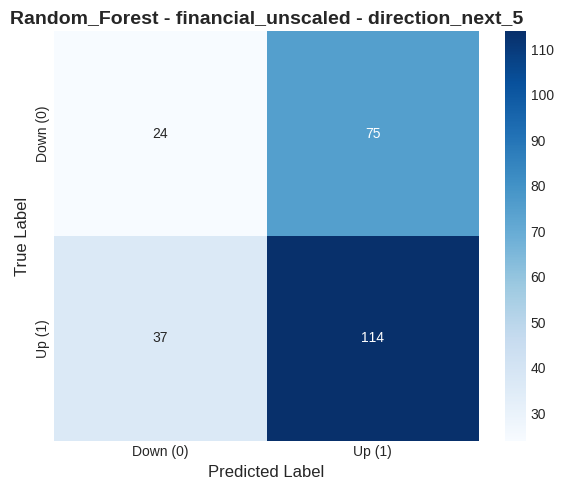

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_5_XGBoost_confusion_matrix.png


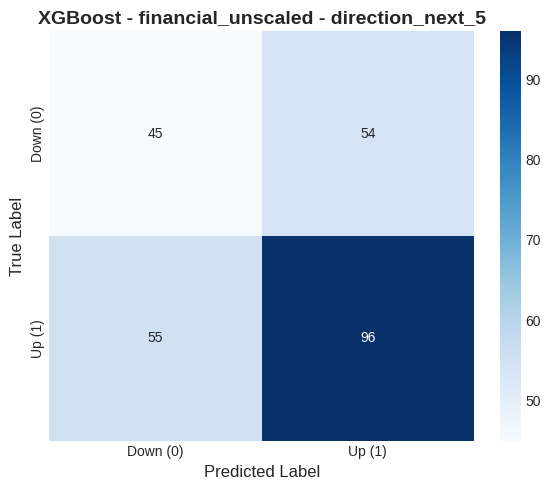

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_5_LightGBM_confusion_matrix.png


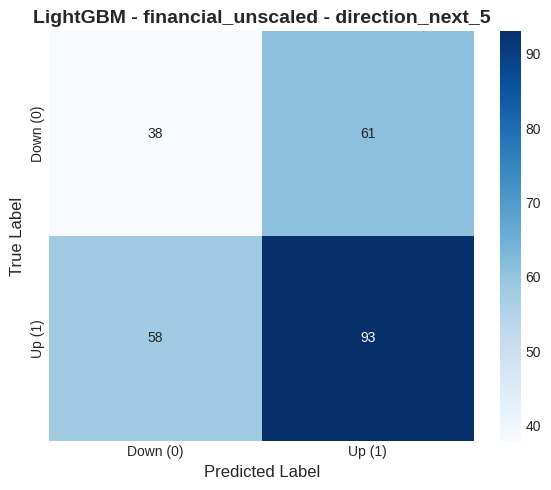

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_5_Ensemble_confusion_matrix.png


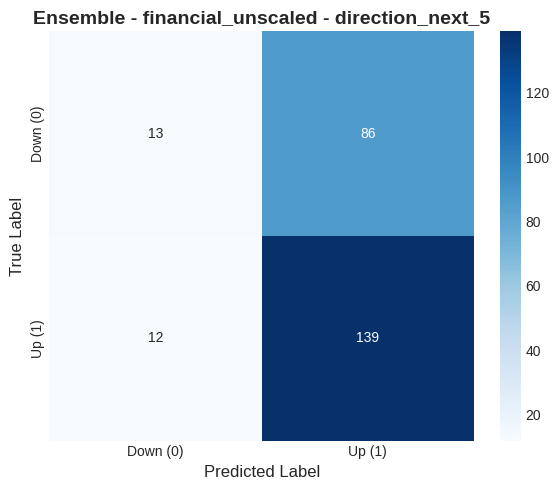

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_5_GRU_medium_confusion_matrix.png


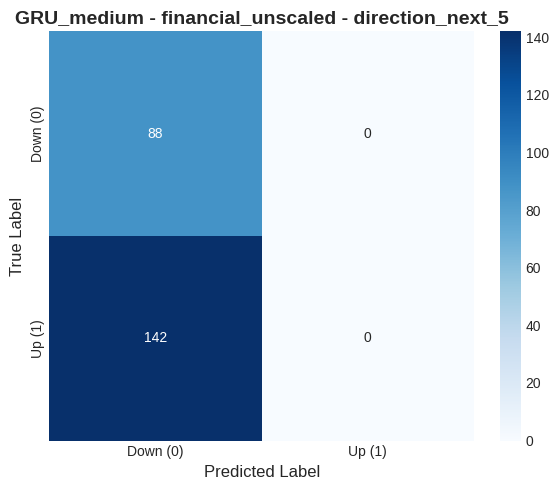

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_5_LSTM_medium_confusion_matrix.png


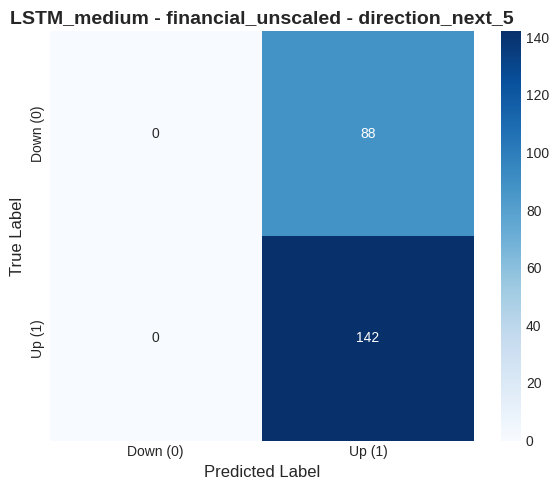

  ✓ Matriz generada para LSTM_medium

financial_unscaled - direction_next_10: 6 modelos
  Encontrados 6 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_10_Random_Forest_confusion_matrix.png


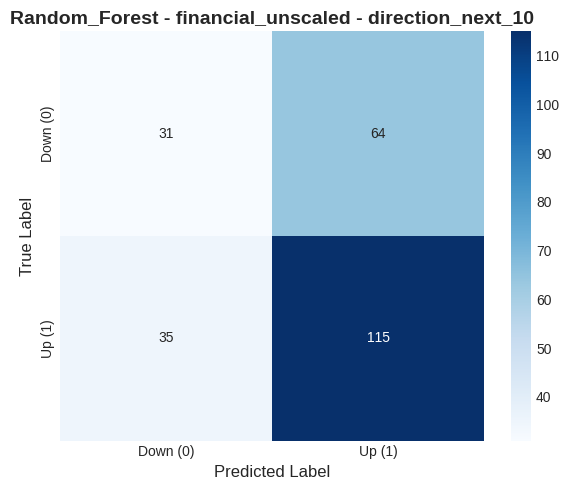

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_10_XGBoost_confusion_matrix.png


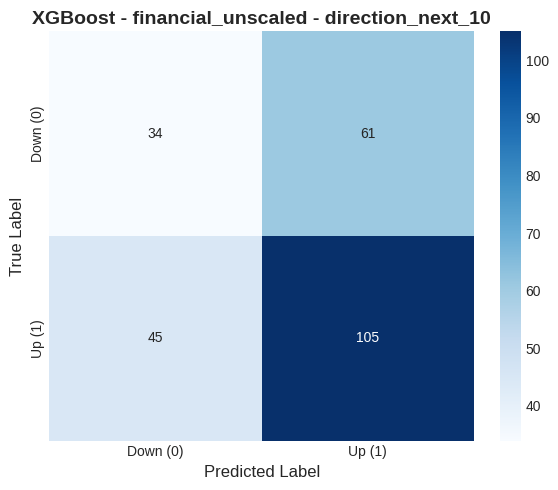

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_10_LightGBM_confusion_matrix.png


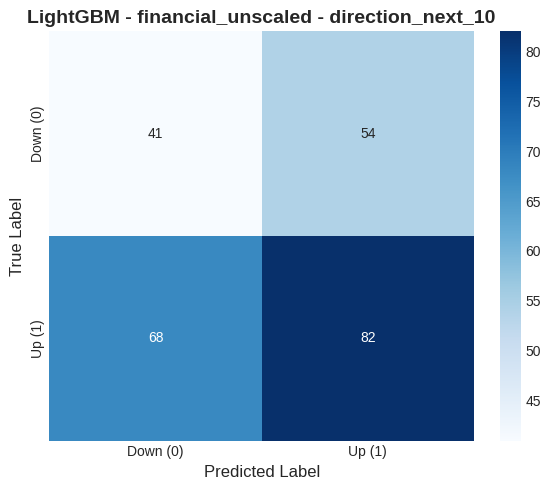

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_10_Ensemble_confusion_matrix.png


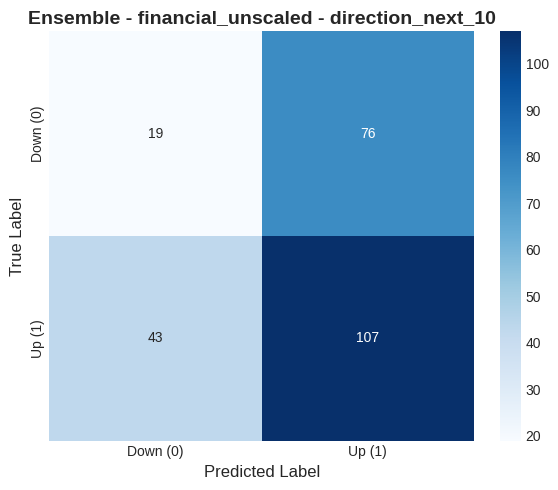

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_10_GRU_medium_confusion_matrix.png


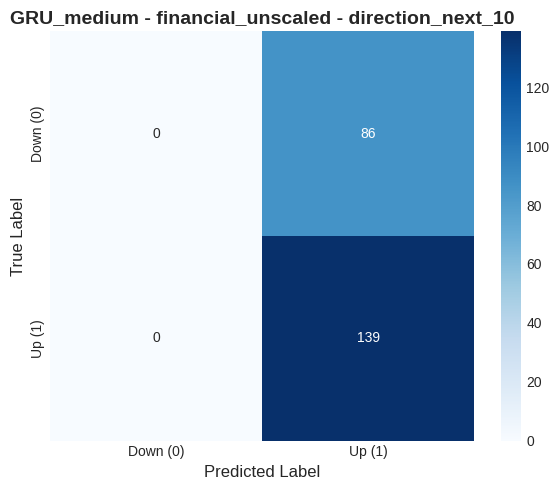

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_10_LSTM_medium_confusion_matrix.png


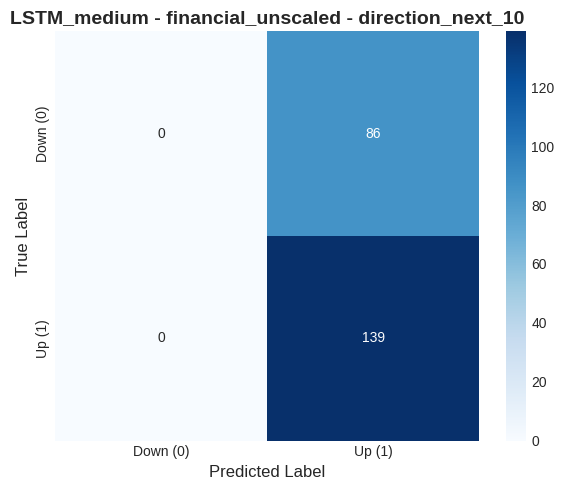

  ✓ Matriz generada para LSTM_medium

financial_unscaled - direction_next_20: 6 modelos
  Encontrados 6 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_20_Random_Forest_confusion_matrix.png


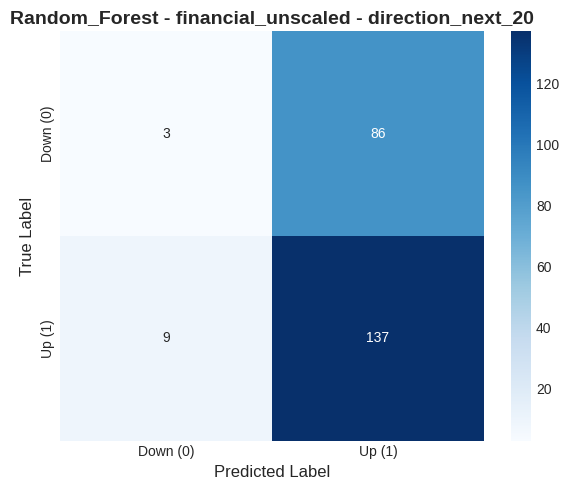

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_20_XGBoost_confusion_matrix.png


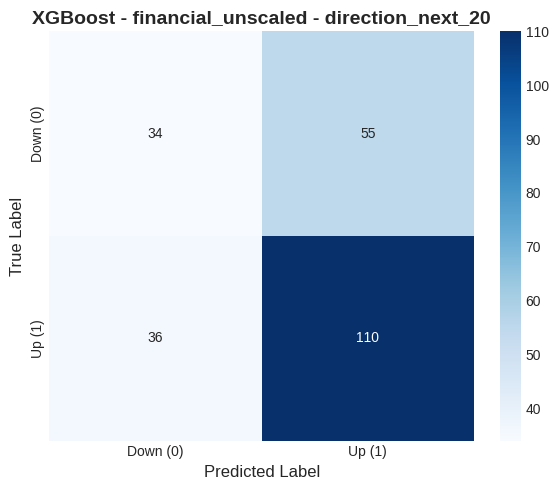

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_20_LightGBM_confusion_matrix.png


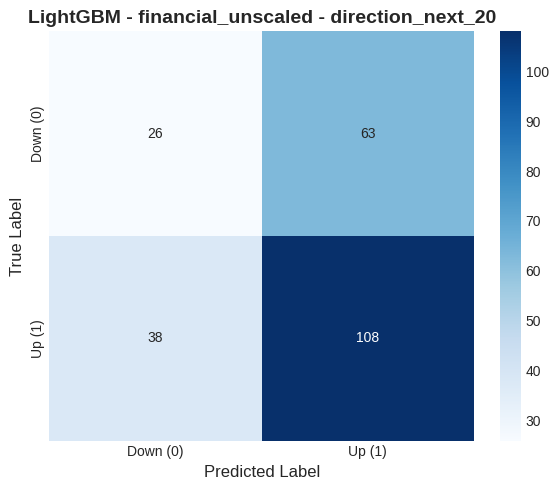

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_20_Ensemble_confusion_matrix.png


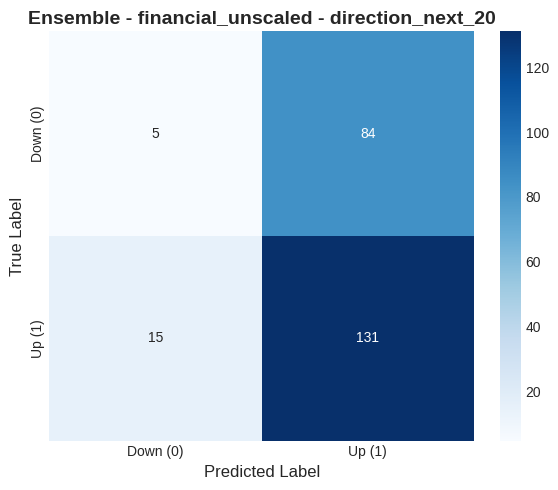

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_20_GRU_medium_confusion_matrix.png


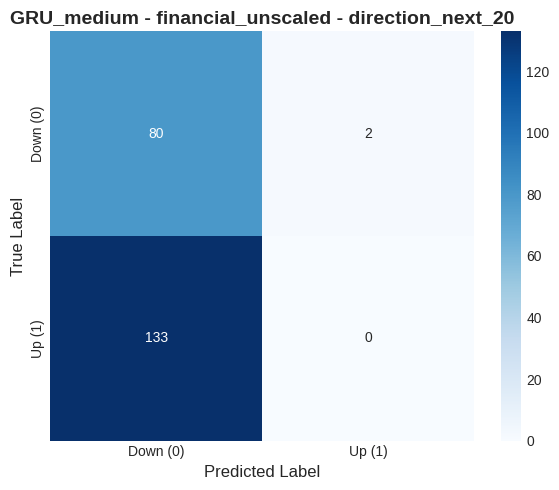

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_unscaled_direction_next_20_LSTM_medium_confusion_matrix.png


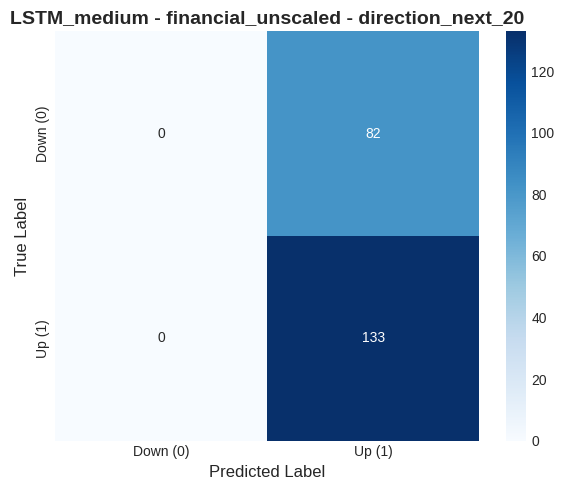

  ✓ Matriz generada para LSTM_medium

financial_long_scaled - direction_next: 8 modelos
  Encontrados 8 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_Logistic_confusion_matrix.png


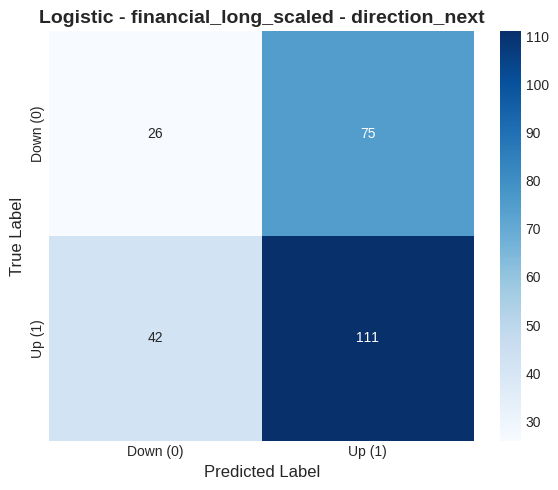

  ✓ Matriz generada para Logistic
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_Random_Forest_confusion_matrix.png


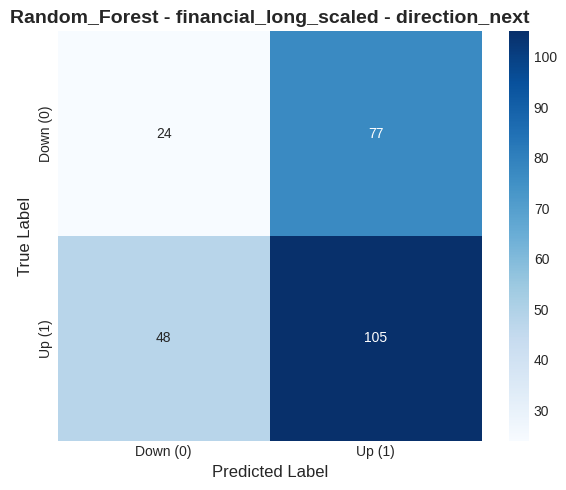

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_XGBoost_confusion_matrix.png


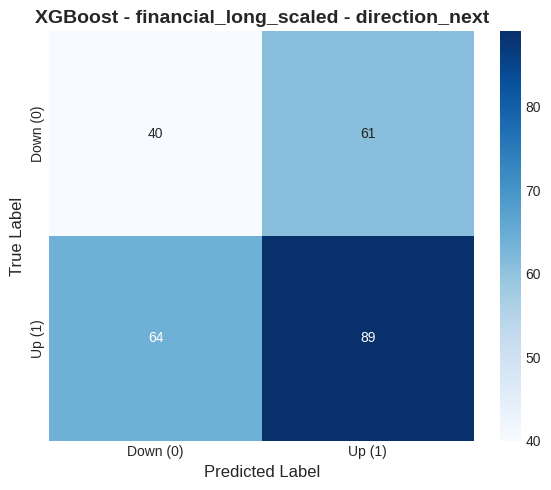

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_LightGBM_confusion_matrix.png


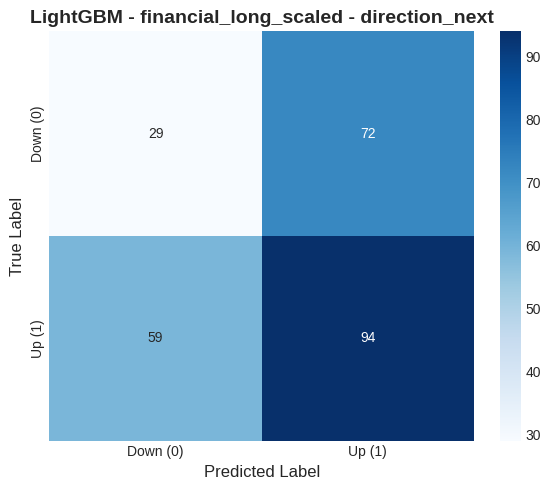

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_MLP_confusion_matrix.png


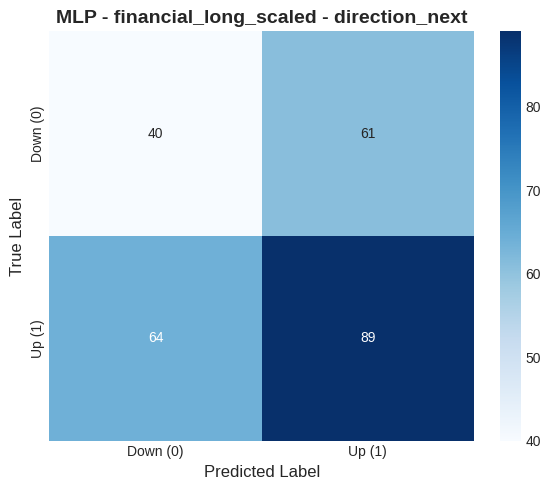

  ✓ Matriz generada para MLP
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_Ensemble_confusion_matrix.png


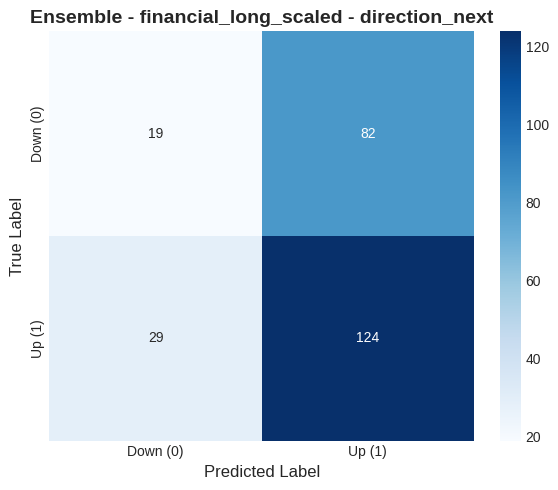

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_GRU_medium_confusion_matrix.png


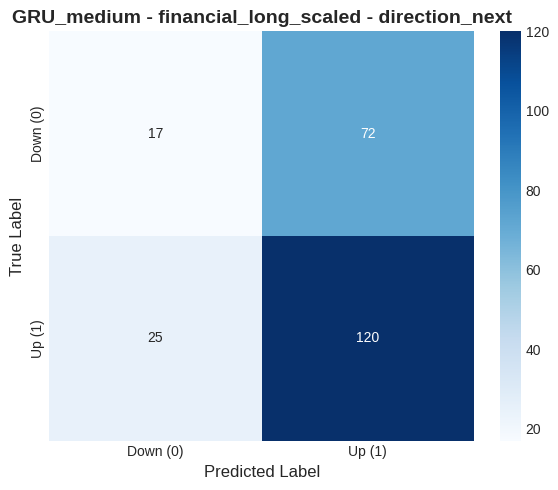

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_LSTM_medium_confusion_matrix.png


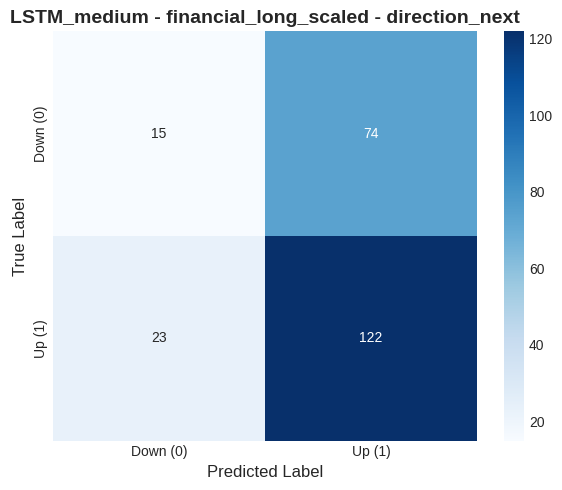

  ✓ Matriz generada para LSTM_medium

financial_long_scaled - direction_next_5: 8 modelos
  Encontrados 8 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_5_Logistic_confusion_matrix.png


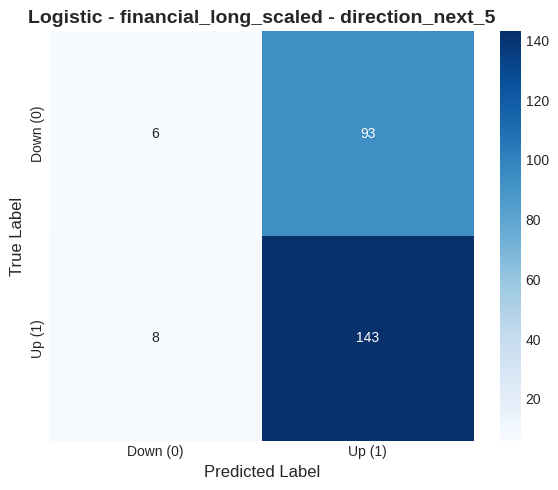

  ✓ Matriz generada para Logistic
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_5_Random_Forest_confusion_matrix.png


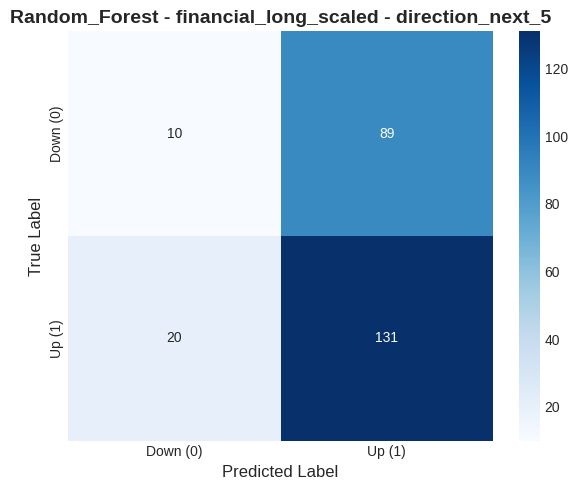

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_5_XGBoost_confusion_matrix.png


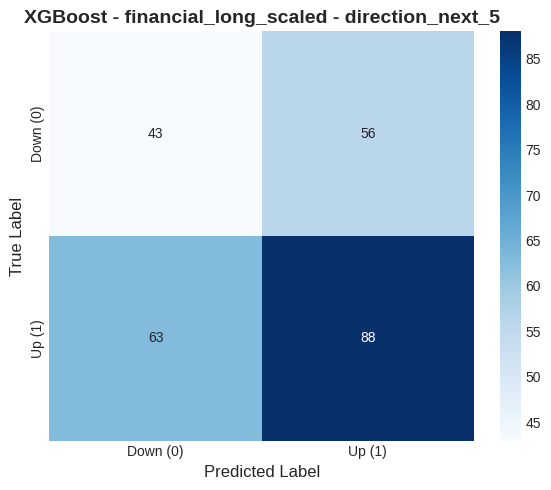

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_5_LightGBM_confusion_matrix.png


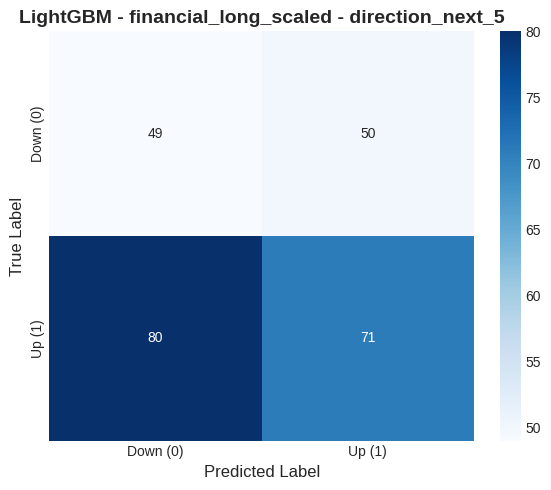

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_5_MLP_confusion_matrix.png


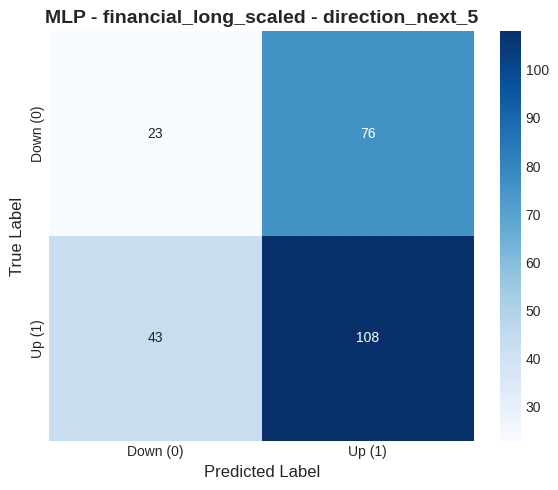

  ✓ Matriz generada para MLP
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_5_Ensemble_confusion_matrix.png


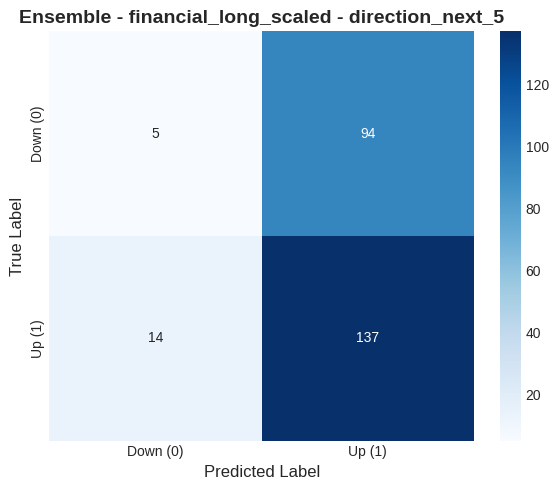

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_5_GRU_medium_confusion_matrix.png


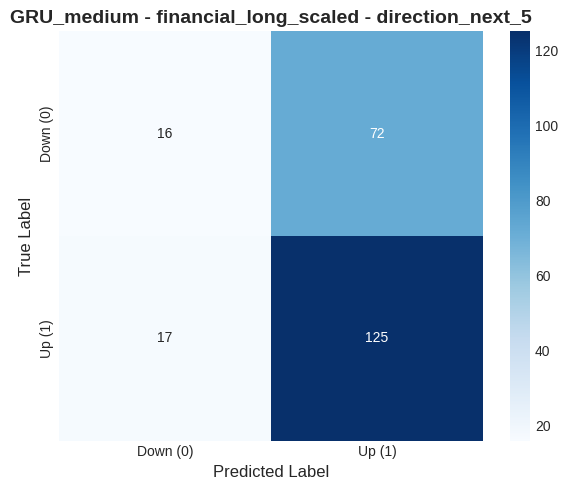

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_5_LSTM_medium_confusion_matrix.png


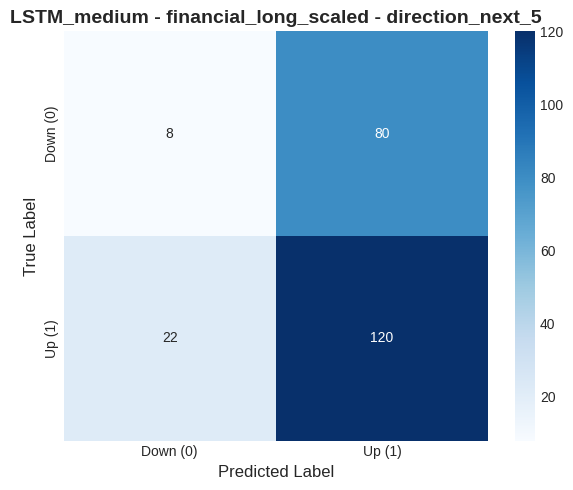

  ✓ Matriz generada para LSTM_medium

financial_long_scaled - direction_next_10: 8 modelos
  Encontrados 8 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_10_Logistic_confusion_matrix.png


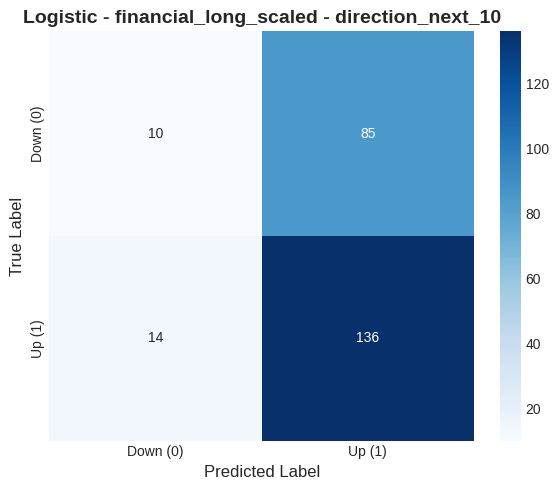

  ✓ Matriz generada para Logistic
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_10_Random_Forest_confusion_matrix.png


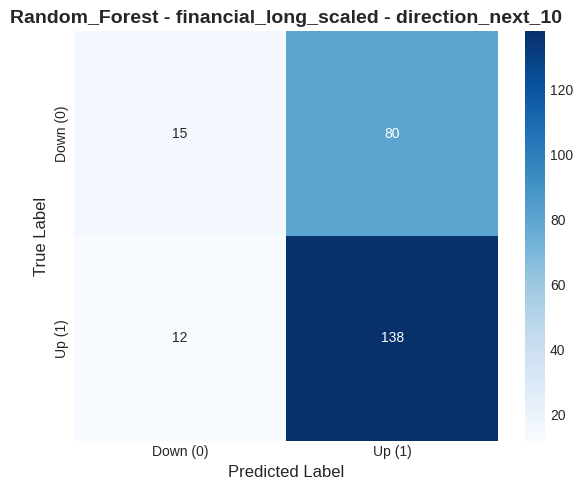

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_10_XGBoost_confusion_matrix.png


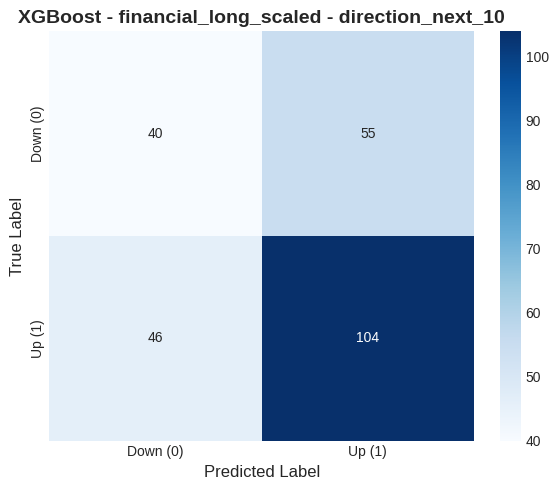

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_10_LightGBM_confusion_matrix.png


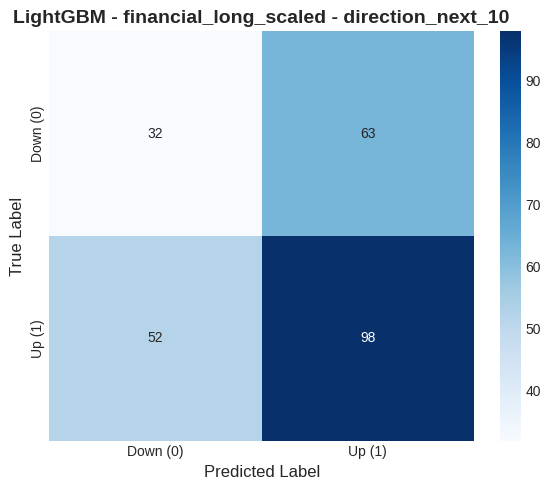

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_10_MLP_confusion_matrix.png


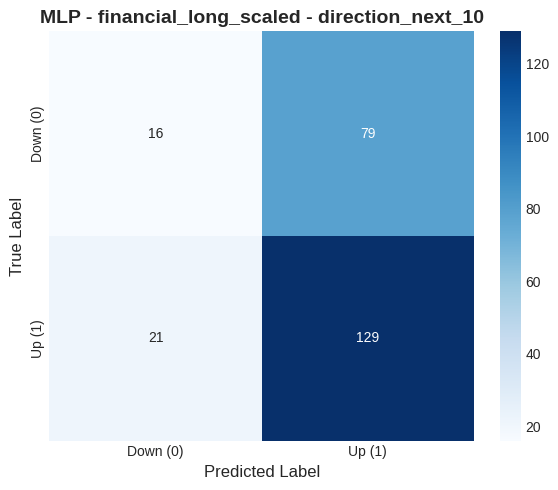

  ✓ Matriz generada para MLP
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_10_Ensemble_confusion_matrix.png


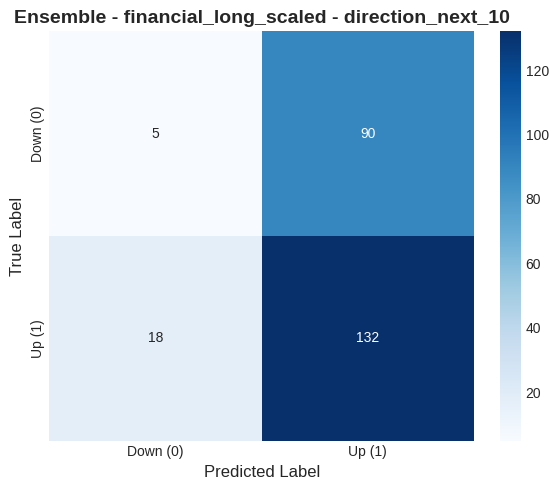

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_10_GRU_medium_confusion_matrix.png


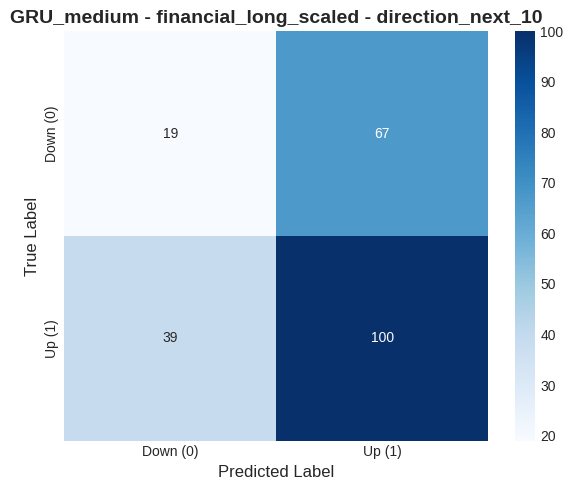

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_10_LSTM_medium_confusion_matrix.png


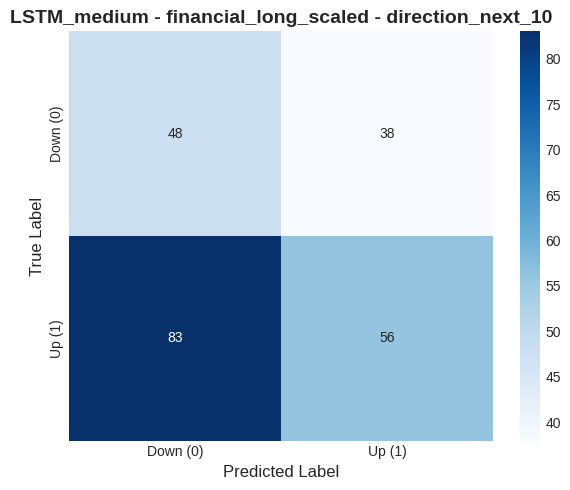

  ✓ Matriz generada para LSTM_medium

financial_long_scaled - direction_next_20: 8 modelos
  Encontrados 8 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_20_Logistic_confusion_matrix.png


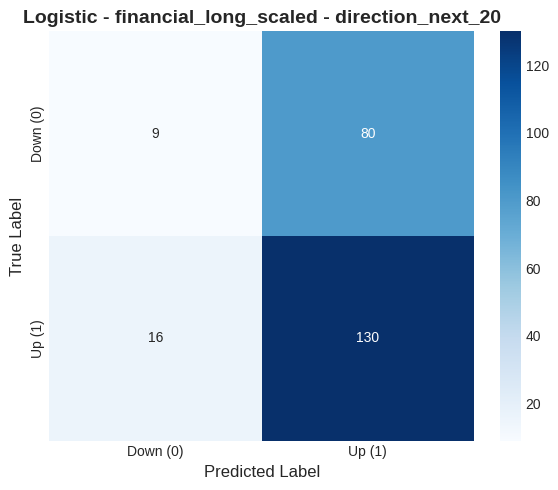

  ✓ Matriz generada para Logistic
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_20_Random_Forest_confusion_matrix.png


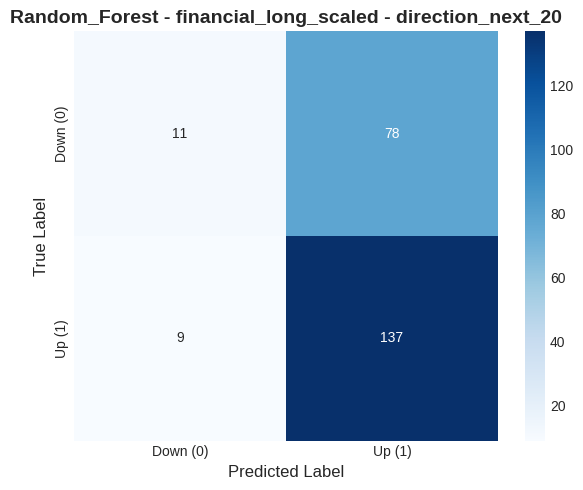

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_20_XGBoost_confusion_matrix.png


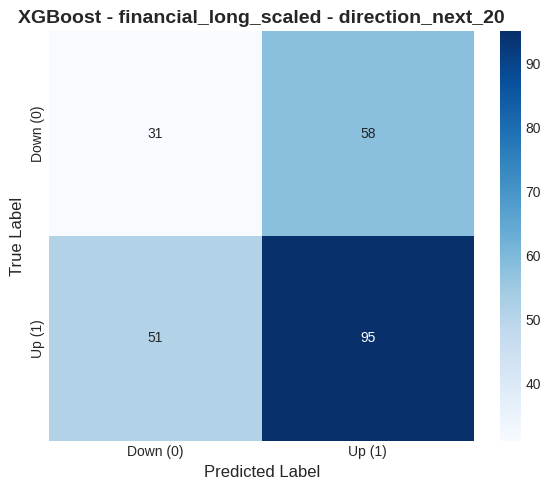

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_20_LightGBM_confusion_matrix.png


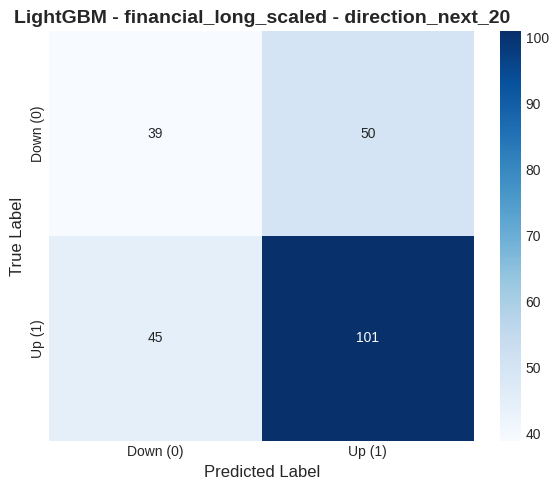

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_20_MLP_confusion_matrix.png


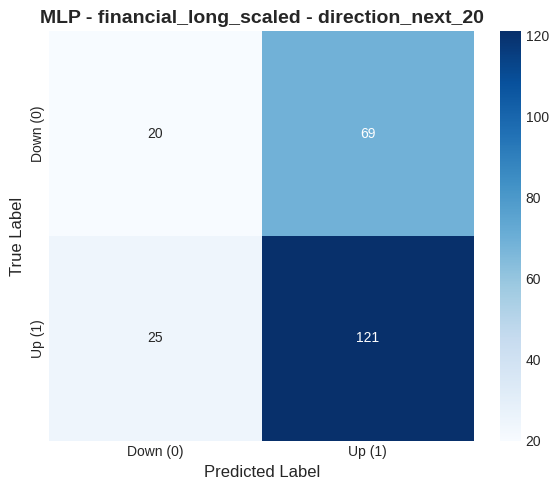

  ✓ Matriz generada para MLP
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_20_Ensemble_confusion_matrix.png


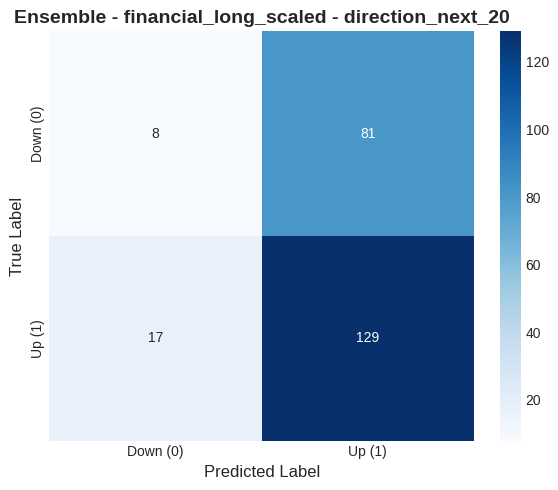

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_20_GRU_medium_confusion_matrix.png


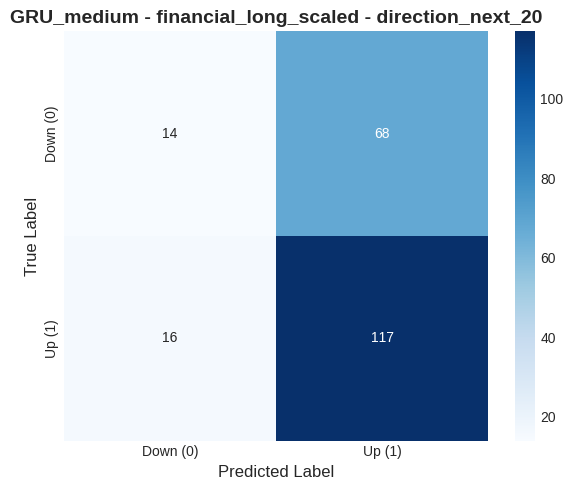

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_scaled_direction_next_20_LSTM_medium_confusion_matrix.png


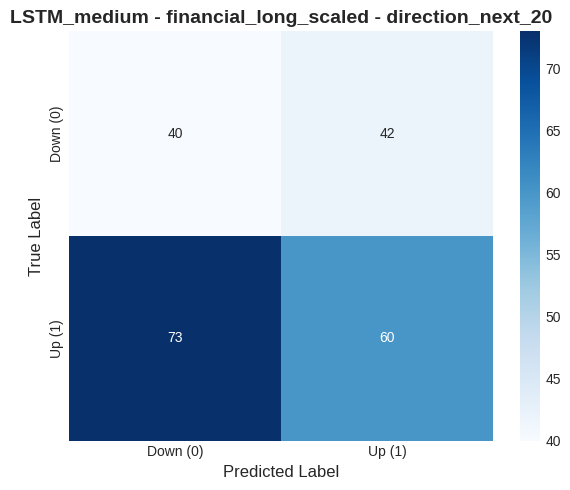

  ✓ Matriz generada para LSTM_medium

financial_long_unscaled - direction_next: 6 modelos
  Encontrados 6 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_Random_Forest_confusion_matrix.png


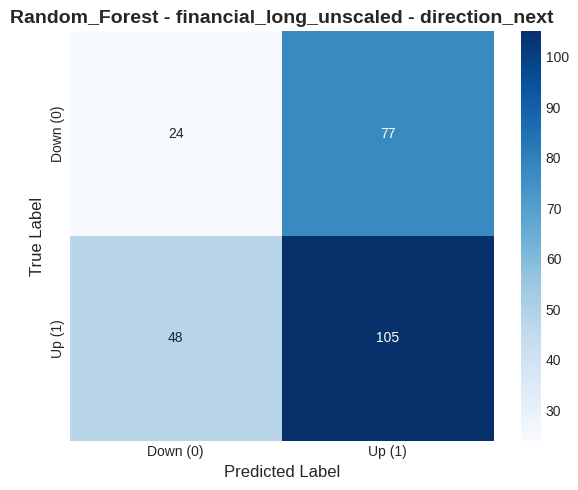

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_XGBoost_confusion_matrix.png


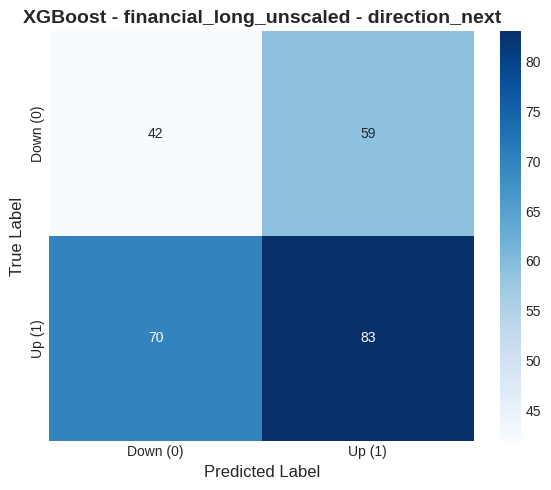

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_LightGBM_confusion_matrix.png


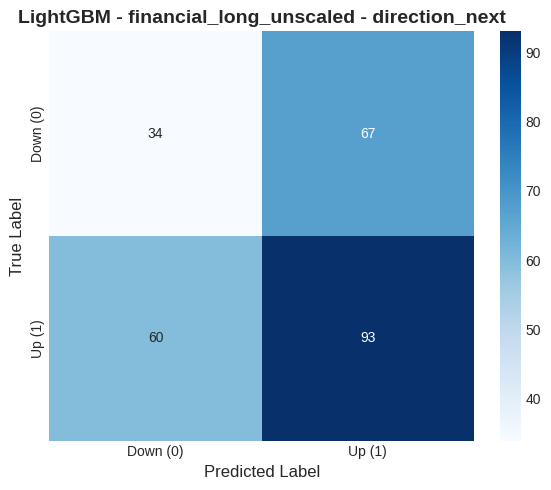

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_Ensemble_confusion_matrix.png


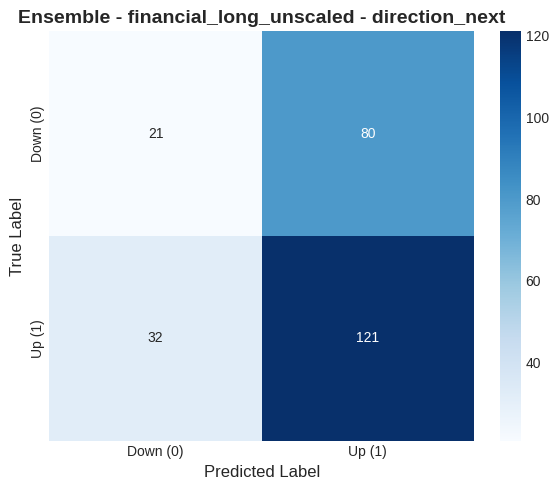

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_GRU_medium_confusion_matrix.png


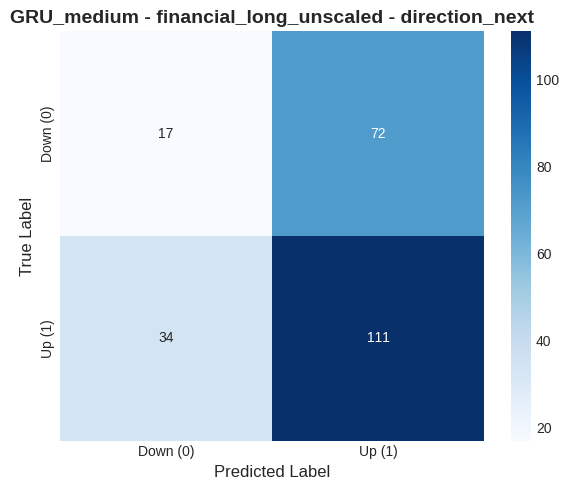

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_LSTM_medium_confusion_matrix.png


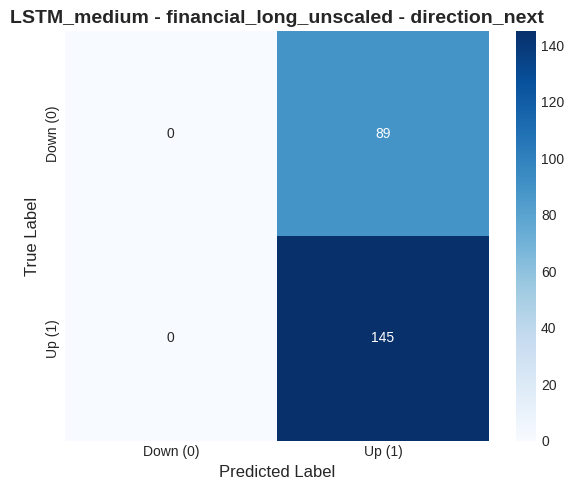

  ✓ Matriz generada para LSTM_medium

financial_long_unscaled - direction_next_5: 6 modelos
  Encontrados 6 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_5_Random_Forest_confusion_matrix.png


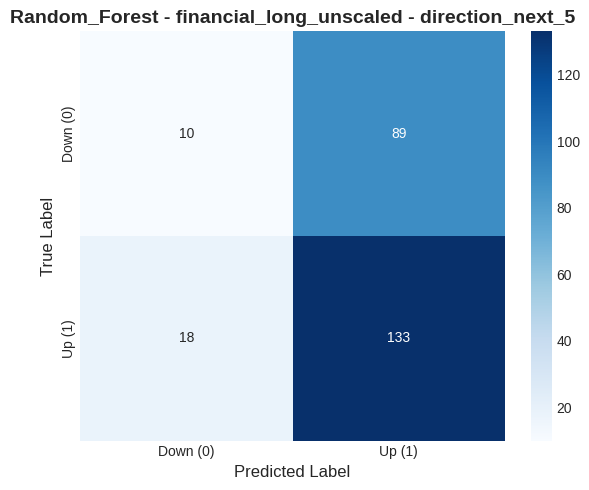

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_5_XGBoost_confusion_matrix.png


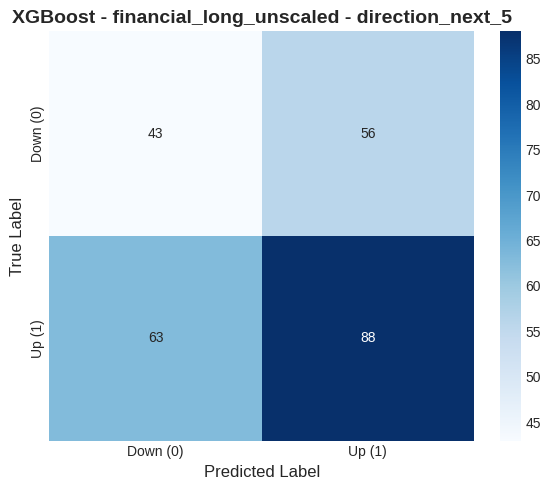

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_5_LightGBM_confusion_matrix.png


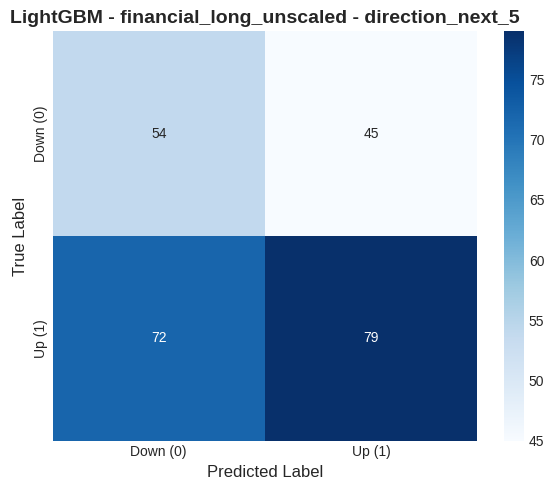

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_5_Ensemble_confusion_matrix.png


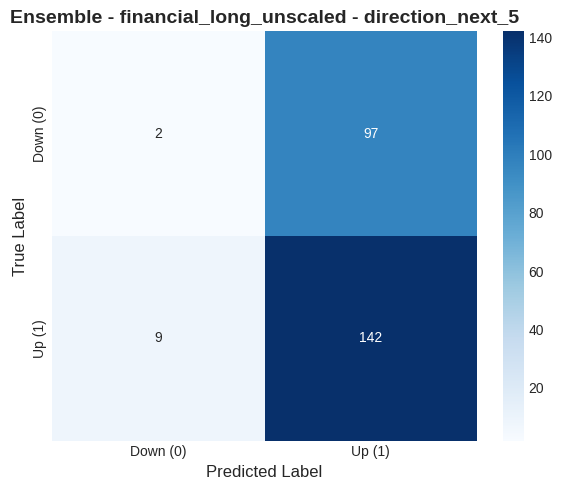

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_5_GRU_medium_confusion_matrix.png


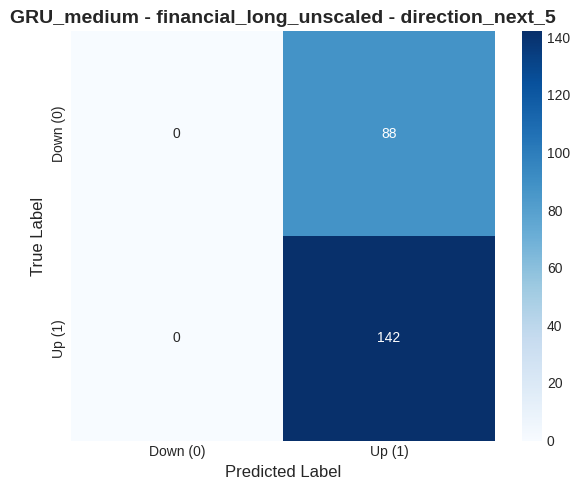

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_5_LSTM_medium_confusion_matrix.png


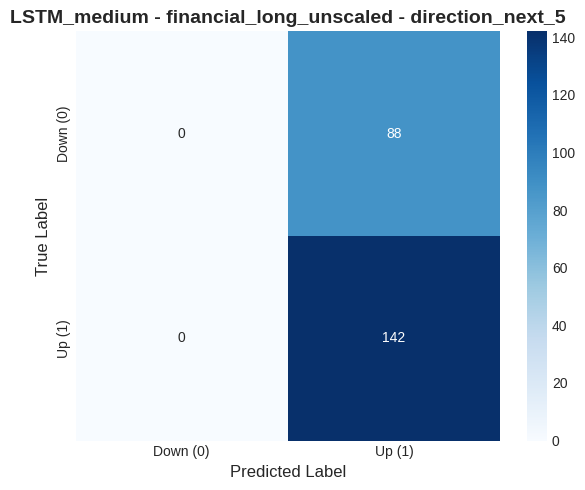

  ✓ Matriz generada para LSTM_medium

financial_long_unscaled - direction_next_10: 6 modelos
  Encontrados 6 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_10_Random_Forest_confusion_matrix.png


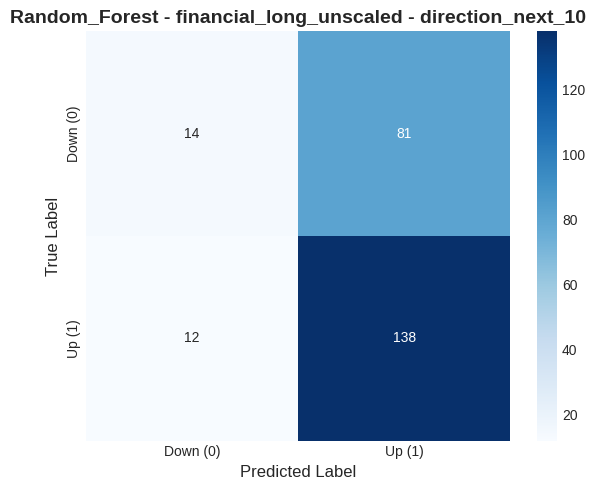

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_10_XGBoost_confusion_matrix.png


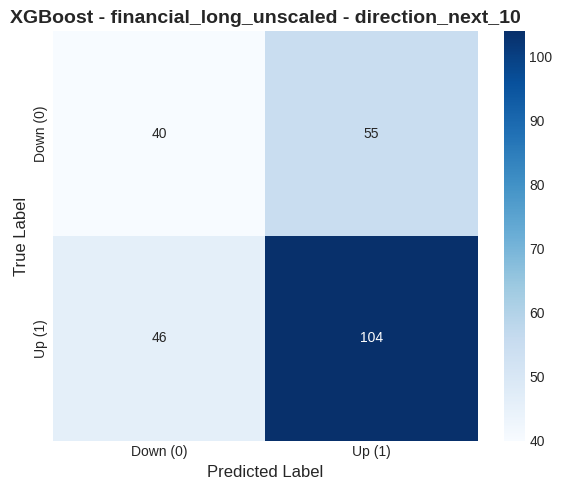

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_10_LightGBM_confusion_matrix.png


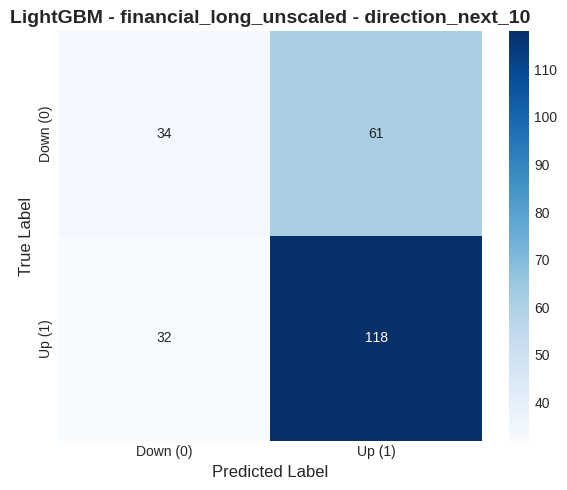

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_10_Ensemble_confusion_matrix.png


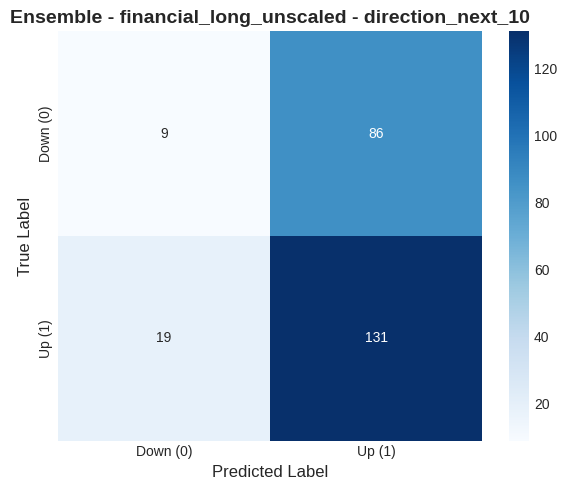

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_10_GRU_medium_confusion_matrix.png


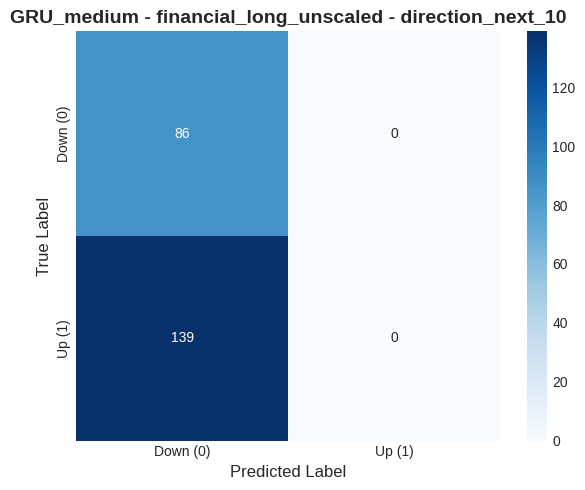

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_10_LSTM_medium_confusion_matrix.png


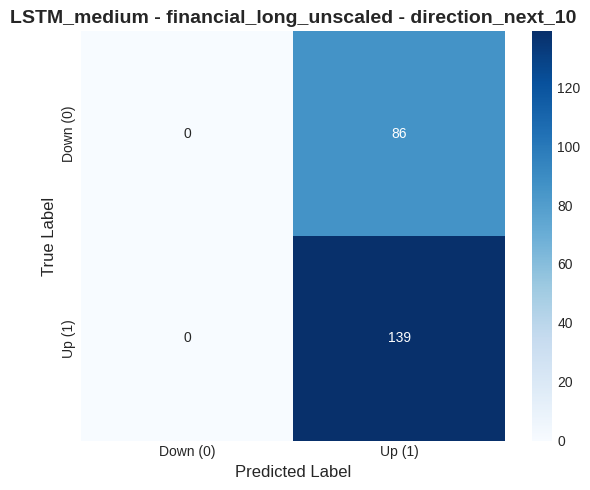

  ✓ Matriz generada para LSTM_medium

financial_long_unscaled - direction_next_20: 6 modelos
  Encontrados 6 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_20_Random_Forest_confusion_matrix.png


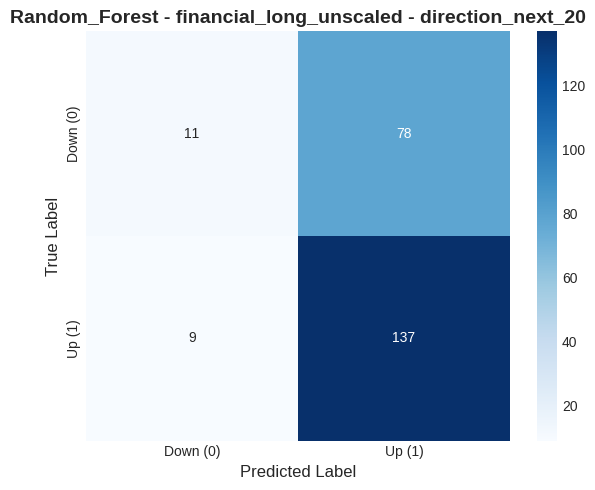

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_20_XGBoost_confusion_matrix.png


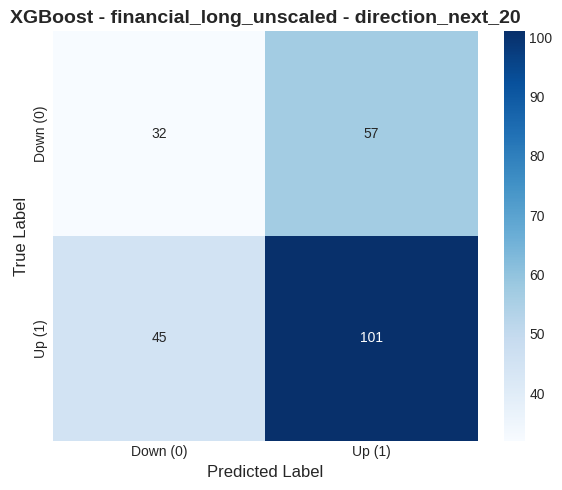

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_20_LightGBM_confusion_matrix.png


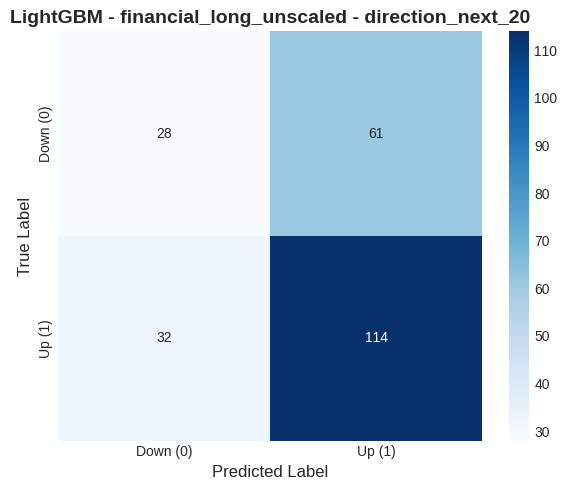

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_20_Ensemble_confusion_matrix.png


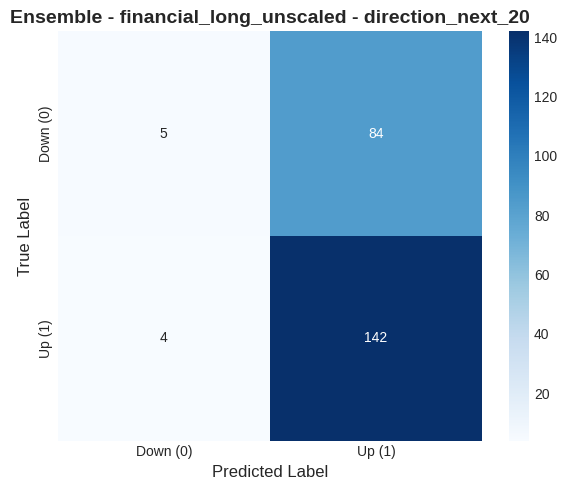

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_20_GRU_medium_confusion_matrix.png


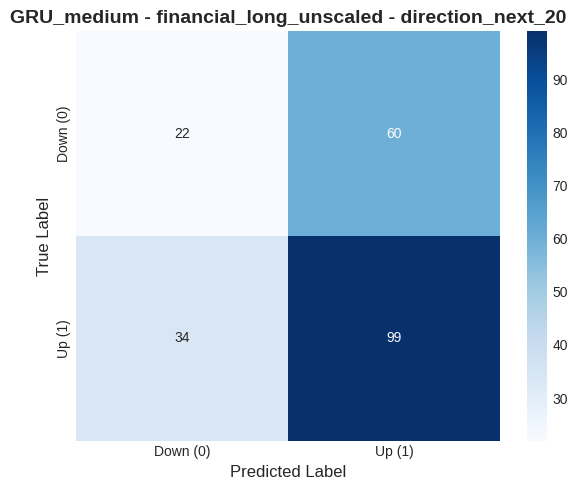

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/financial_long_unscaled_direction_next_20_LSTM_medium_confusion_matrix.png


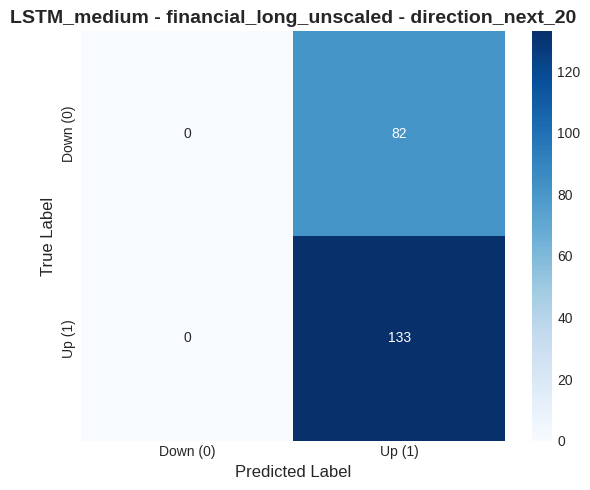

  ✓ Matriz generada para LSTM_medium

sentiment_scaled - direction_next: 8 modelos
  Encontrados 8 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_Logistic_confusion_matrix.png


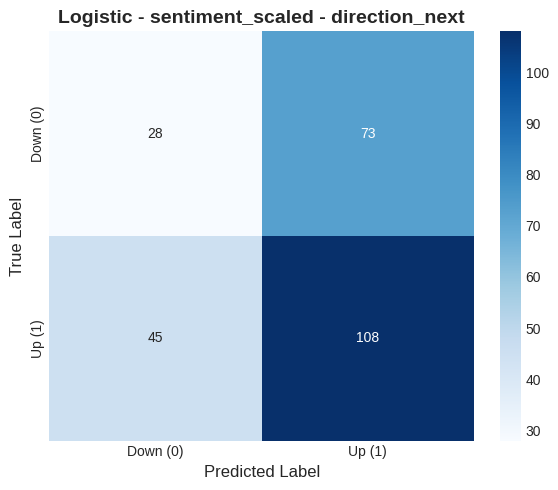

  ✓ Matriz generada para Logistic
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_Random_Forest_confusion_matrix.png


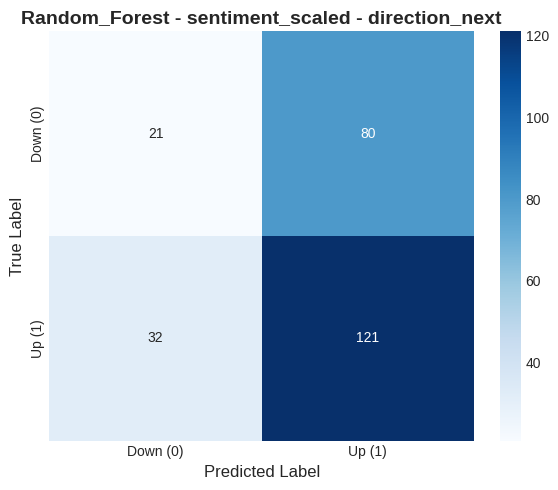

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_XGBoost_confusion_matrix.png


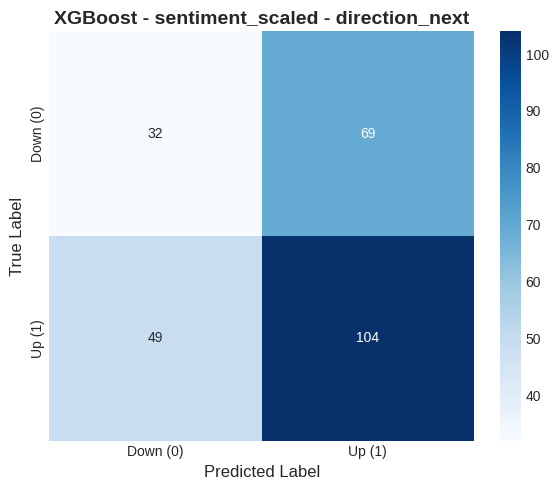

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_LightGBM_confusion_matrix.png


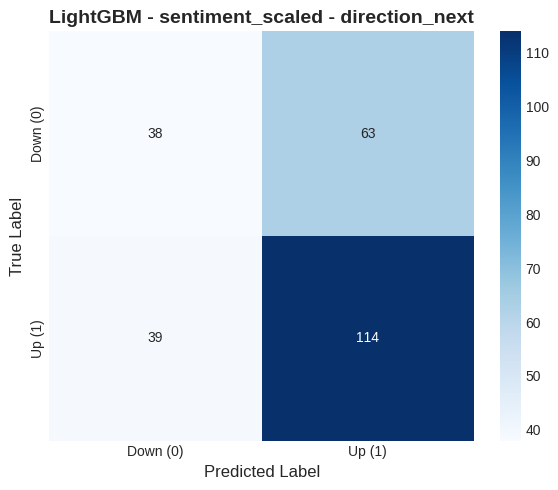

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_MLP_confusion_matrix.png


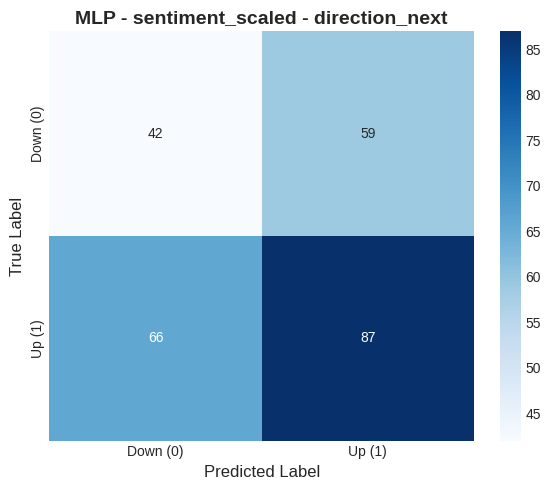

  ✓ Matriz generada para MLP
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_Ensemble_confusion_matrix.png


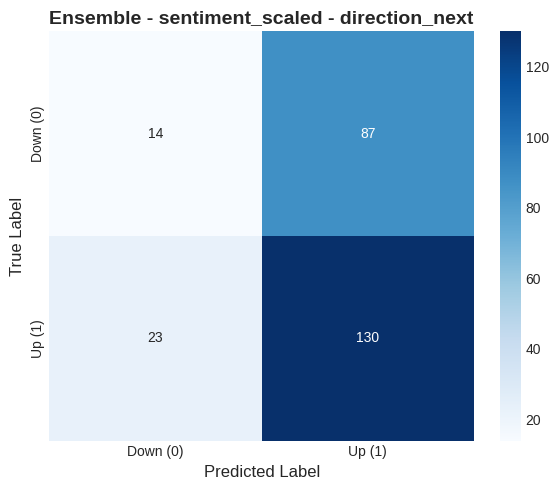

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_GRU_medium_confusion_matrix.png


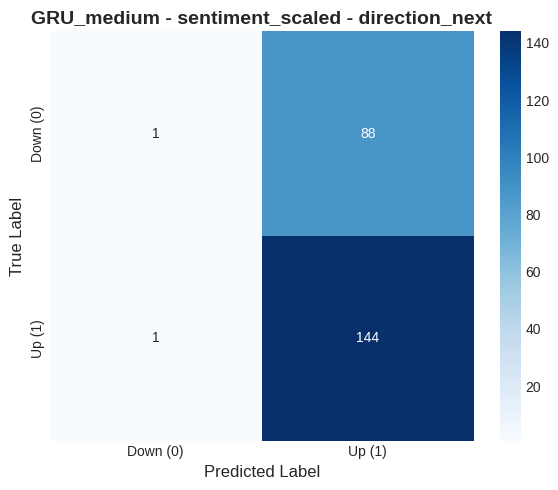

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_LSTM_medium_confusion_matrix.png


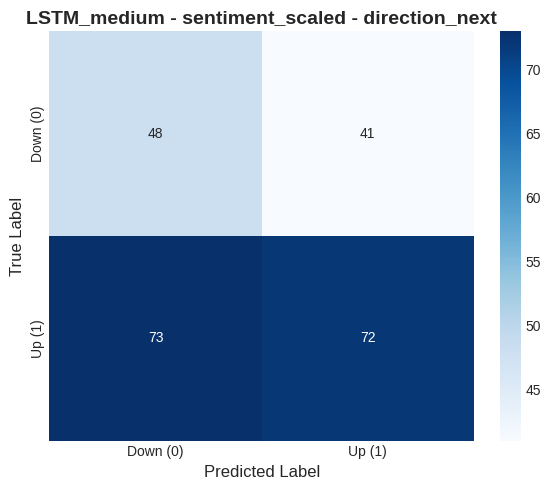

  ✓ Matriz generada para LSTM_medium

sentiment_scaled - direction_next_5: 8 modelos
  Encontrados 8 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_5_Logistic_confusion_matrix.png


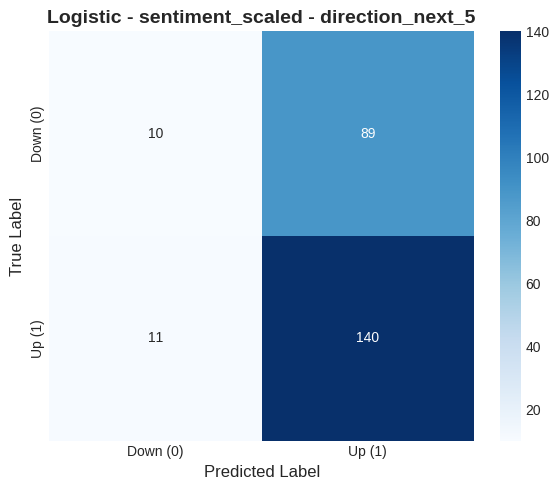

  ✓ Matriz generada para Logistic
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_5_Random_Forest_confusion_matrix.png


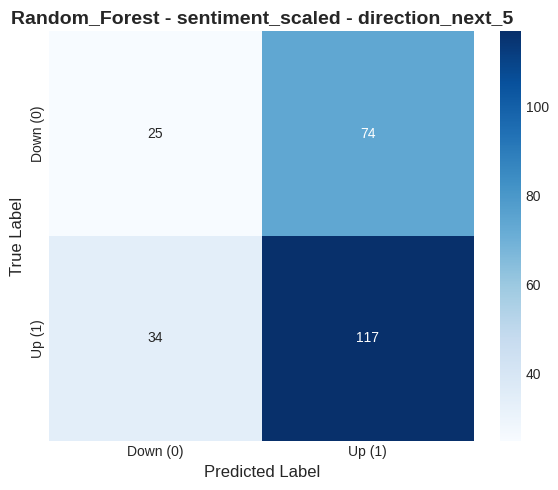

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_5_XGBoost_confusion_matrix.png


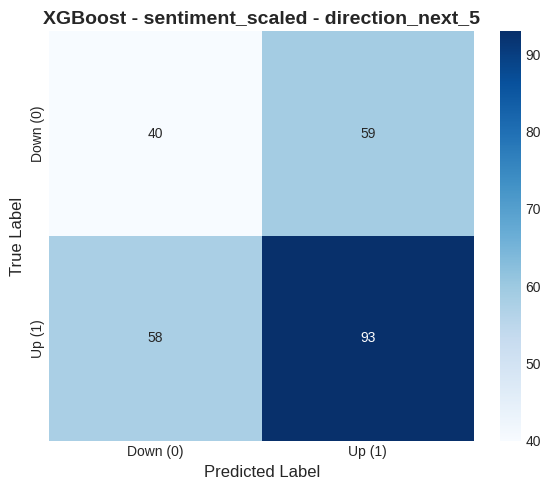

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_5_LightGBM_confusion_matrix.png


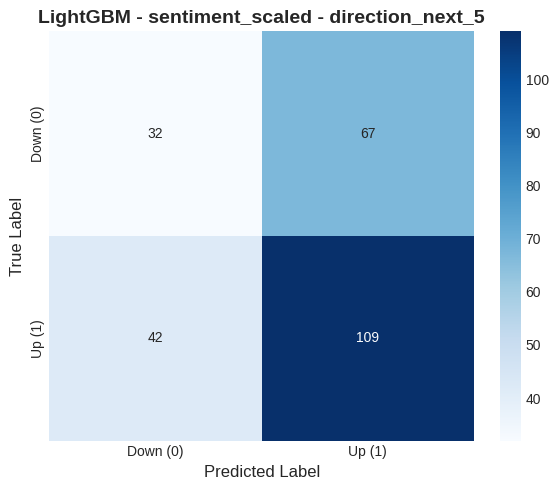

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_5_MLP_confusion_matrix.png


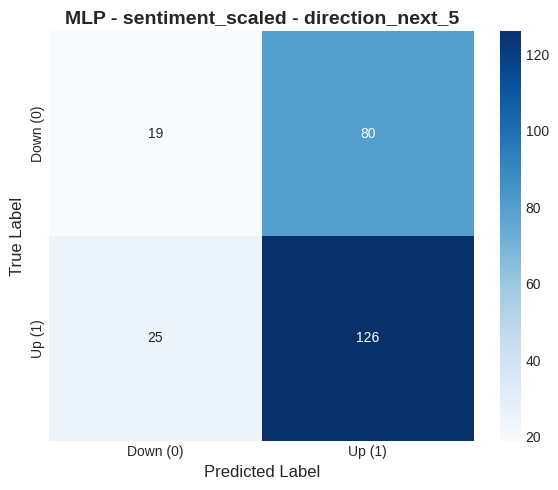

  ✓ Matriz generada para MLP
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_5_Ensemble_confusion_matrix.png


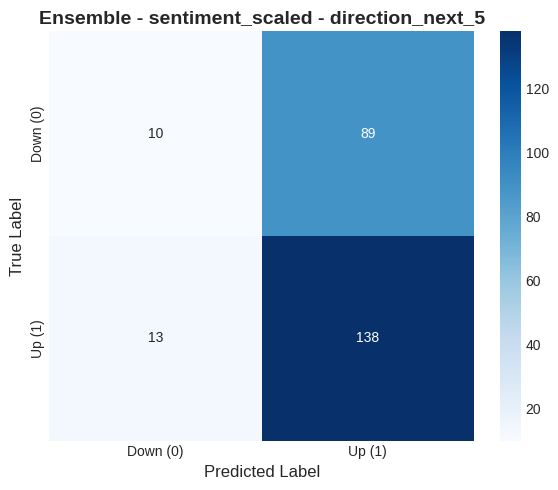

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_5_GRU_medium_confusion_matrix.png


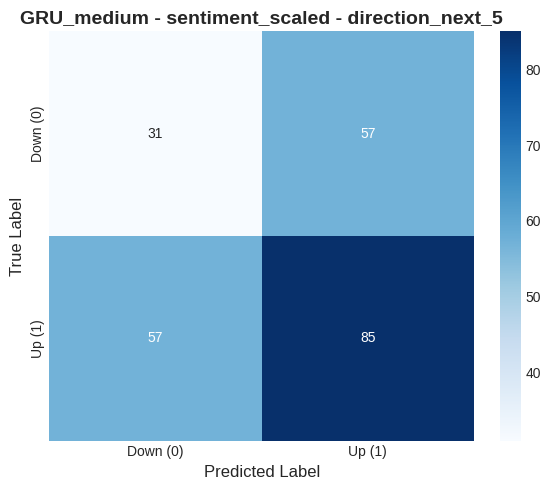

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_5_LSTM_medium_confusion_matrix.png


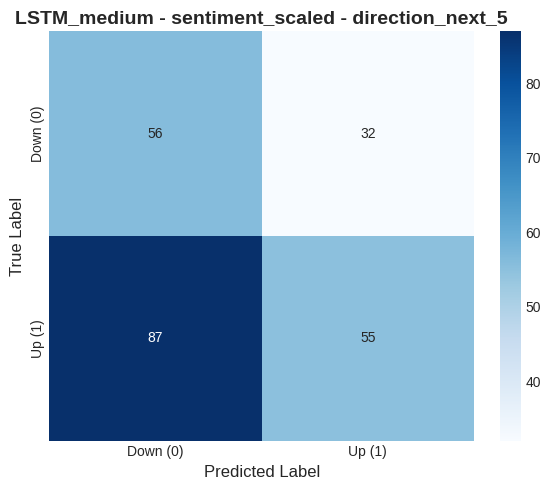

  ✓ Matriz generada para LSTM_medium

sentiment_scaled - direction_next_10: 8 modelos
  Encontrados 8 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_10_Logistic_confusion_matrix.png


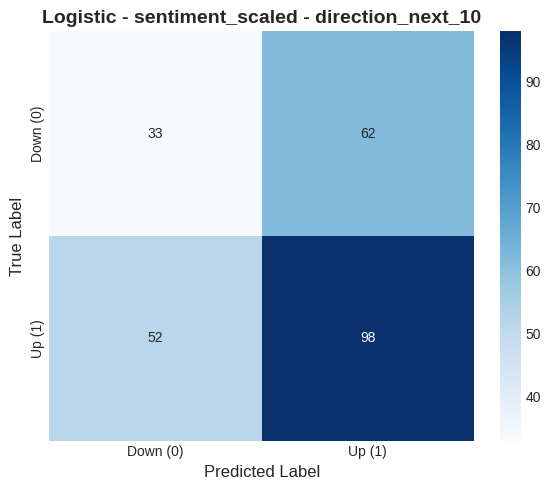

  ✓ Matriz generada para Logistic
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_10_Random_Forest_confusion_matrix.png


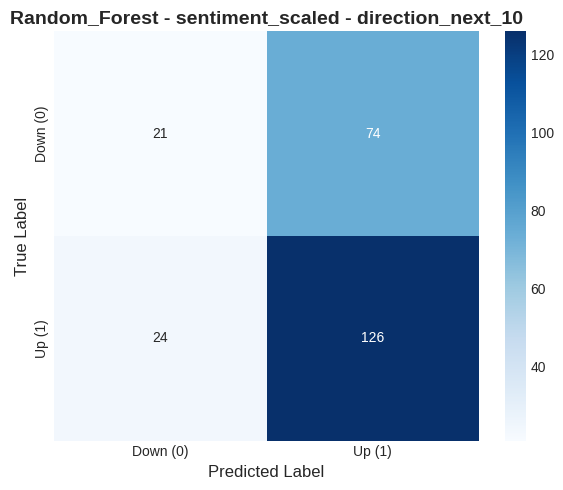

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_10_XGBoost_confusion_matrix.png


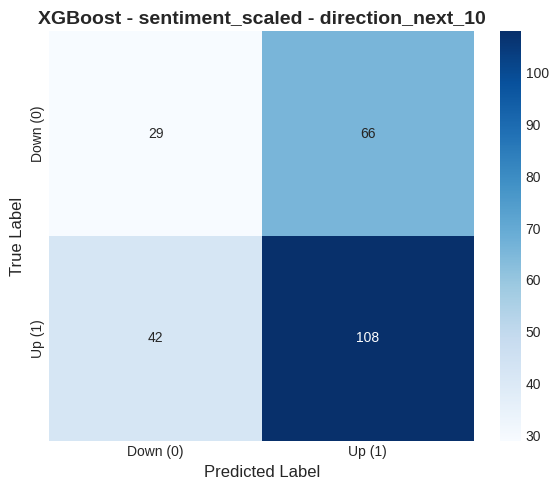

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_10_LightGBM_confusion_matrix.png


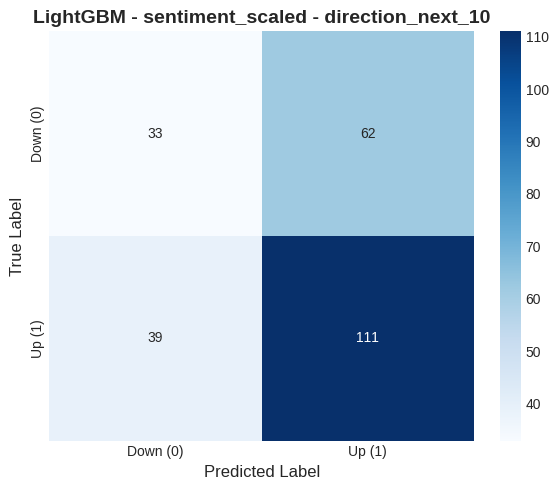

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_10_MLP_confusion_matrix.png


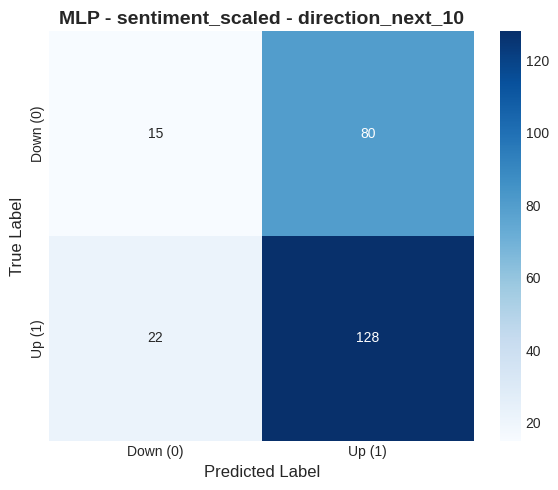

  ✓ Matriz generada para MLP
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_10_Ensemble_confusion_matrix.png


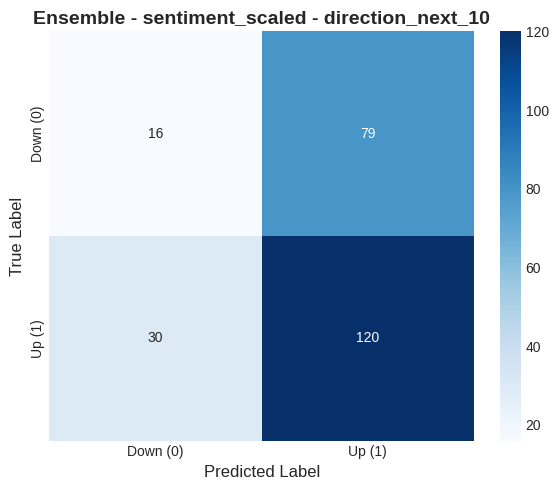

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_10_GRU_medium_confusion_matrix.png


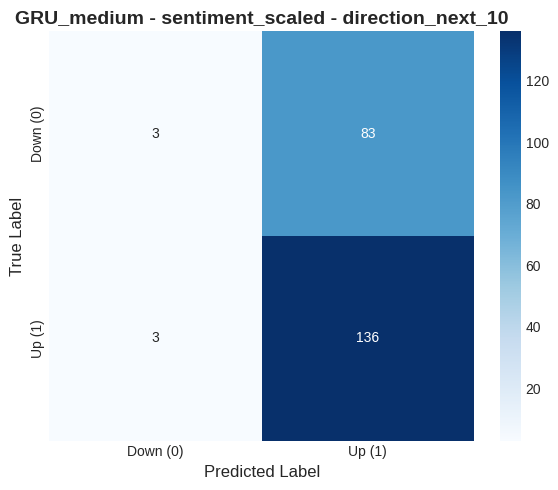

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_10_LSTM_medium_confusion_matrix.png


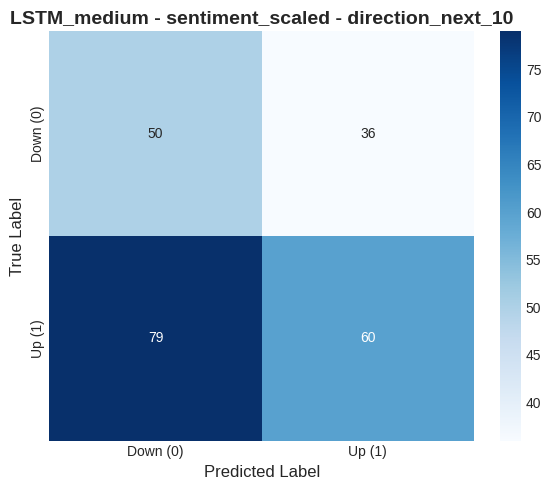

  ✓ Matriz generada para LSTM_medium

sentiment_scaled - direction_next_20: 8 modelos
  Encontrados 8 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_20_Logistic_confusion_matrix.png


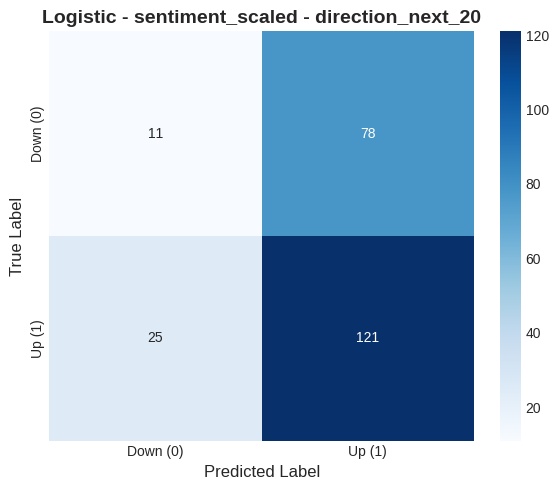

  ✓ Matriz generada para Logistic
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_20_Random_Forest_confusion_matrix.png


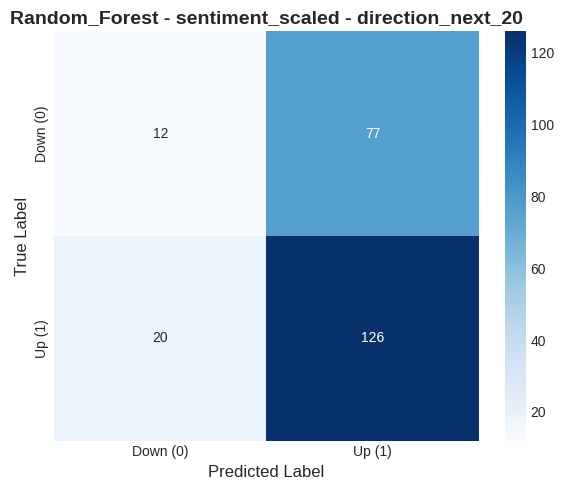

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_20_XGBoost_confusion_matrix.png


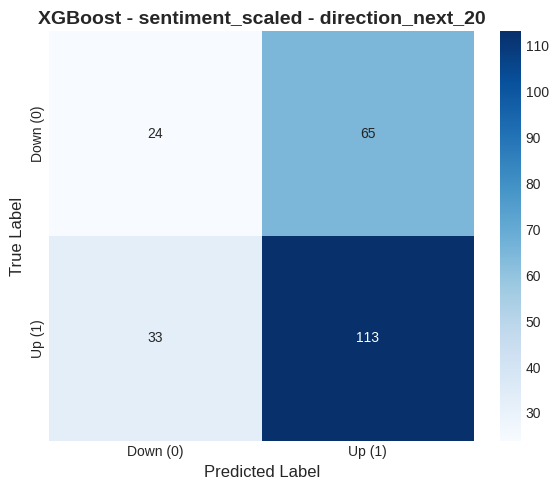

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_20_LightGBM_confusion_matrix.png


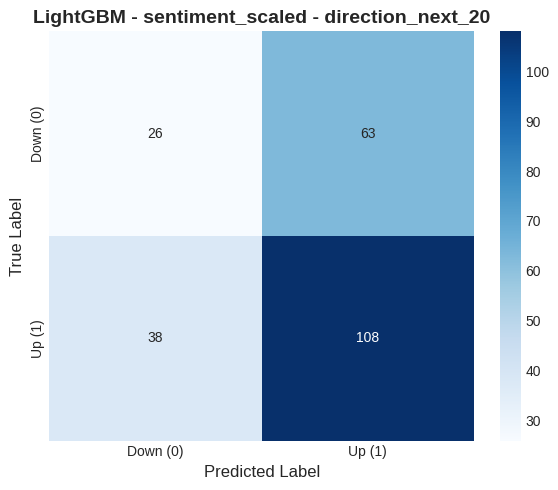

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_20_MLP_confusion_matrix.png


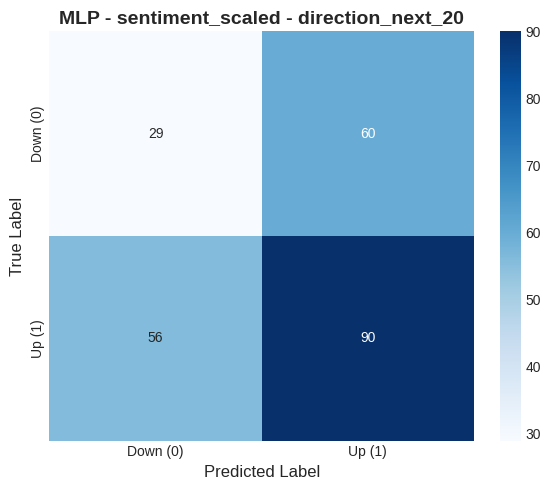

  ✓ Matriz generada para MLP
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_20_Ensemble_confusion_matrix.png


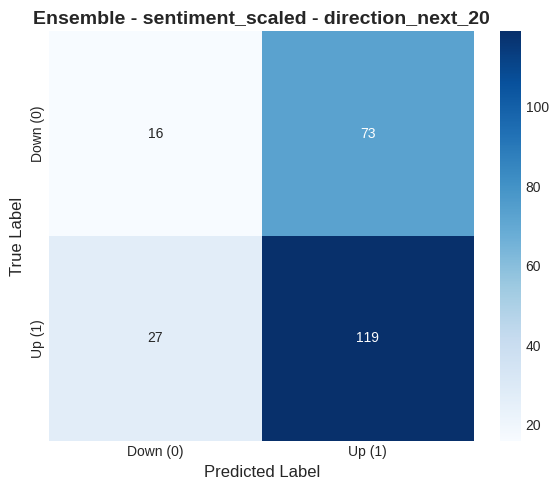

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_20_GRU_medium_confusion_matrix.png


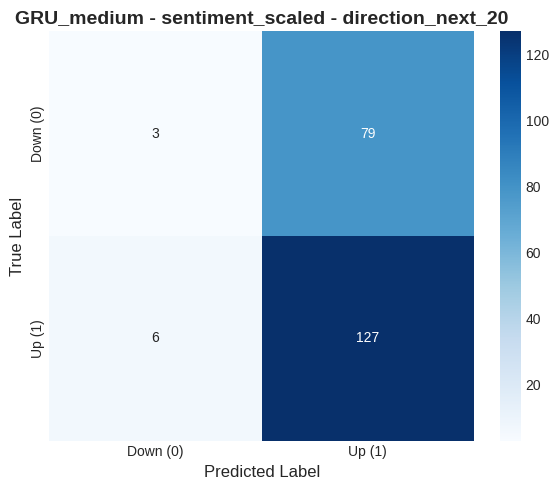

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_scaled_direction_next_20_LSTM_medium_confusion_matrix.png


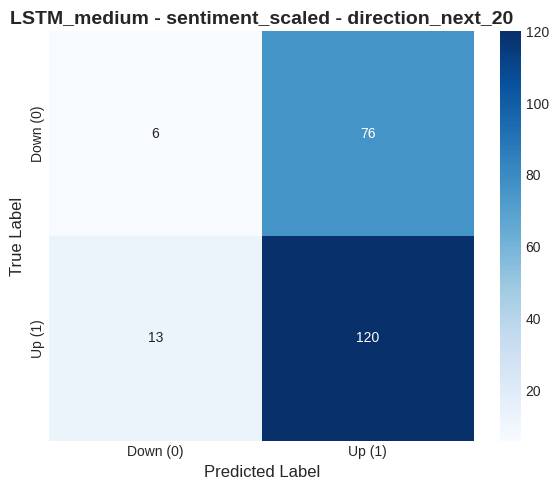

  ✓ Matriz generada para LSTM_medium

sentiment_unscaled - direction_next: 6 modelos
  Encontrados 6 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_Random_Forest_confusion_matrix.png


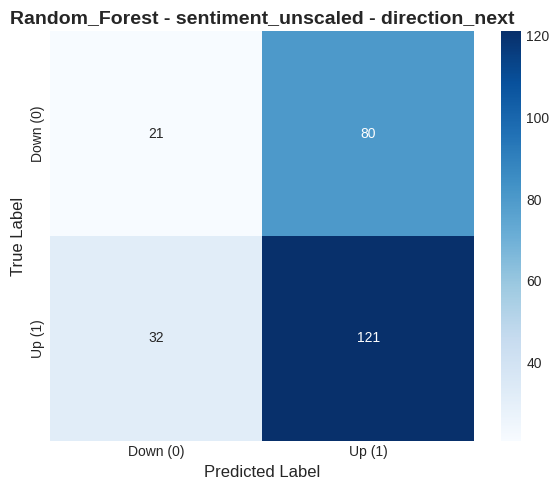

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_XGBoost_confusion_matrix.png


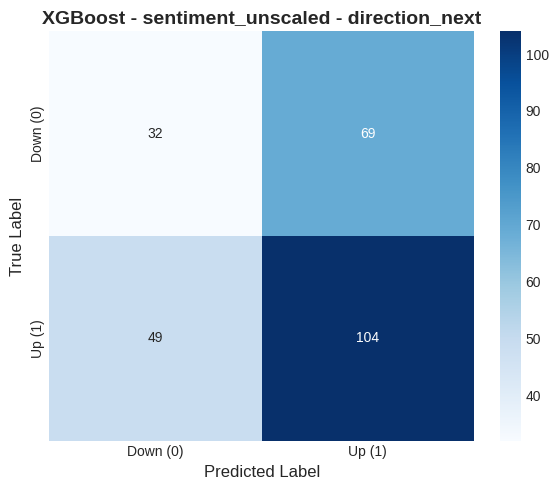

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_LightGBM_confusion_matrix.png


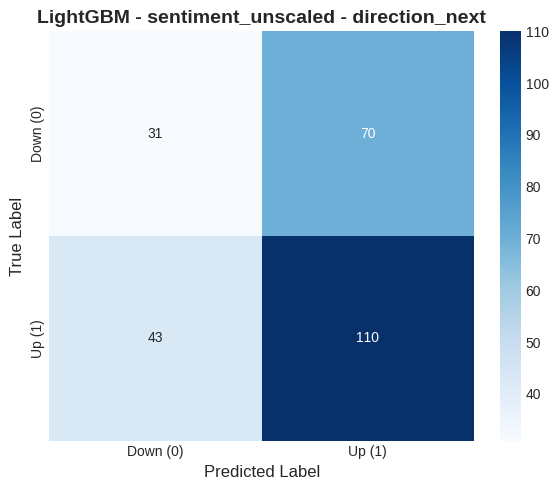

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_Ensemble_confusion_matrix.png


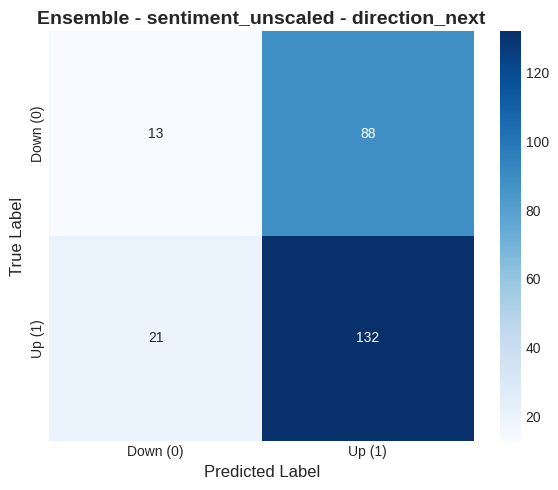

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_GRU_medium_confusion_matrix.png


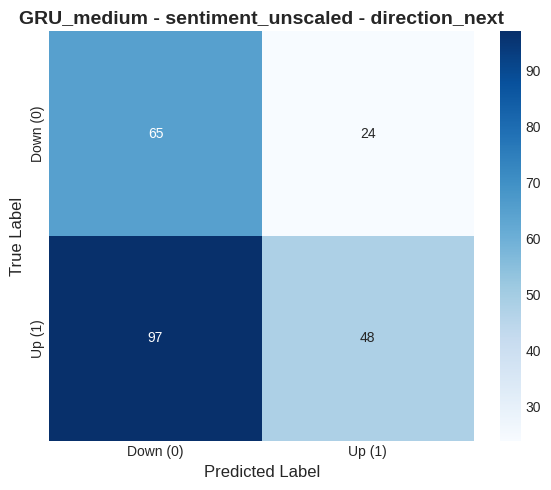

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_LSTM_medium_confusion_matrix.png


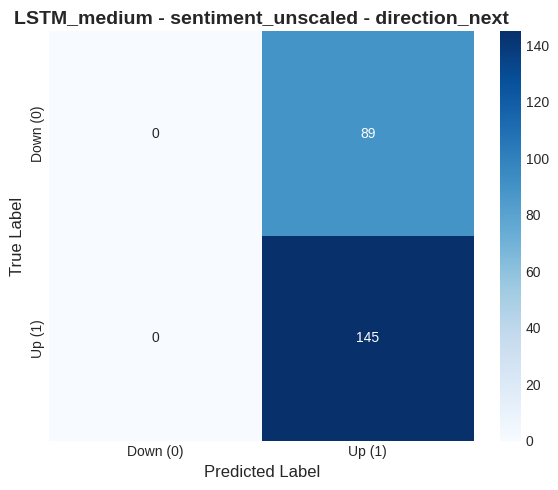

  ✓ Matriz generada para LSTM_medium

sentiment_unscaled - direction_next_5: 6 modelos
  Encontrados 6 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_5_Random_Forest_confusion_matrix.png


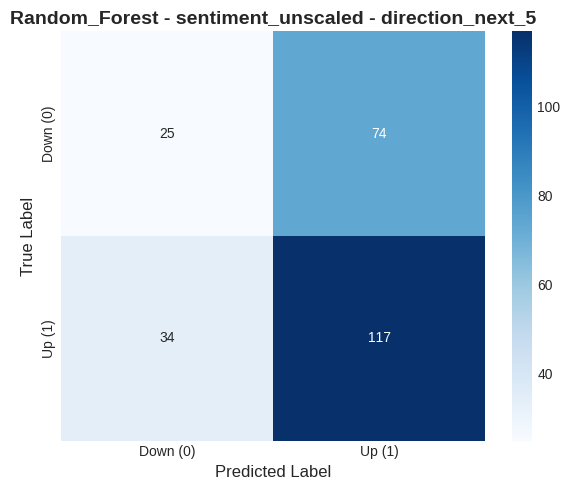

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_5_XGBoost_confusion_matrix.png


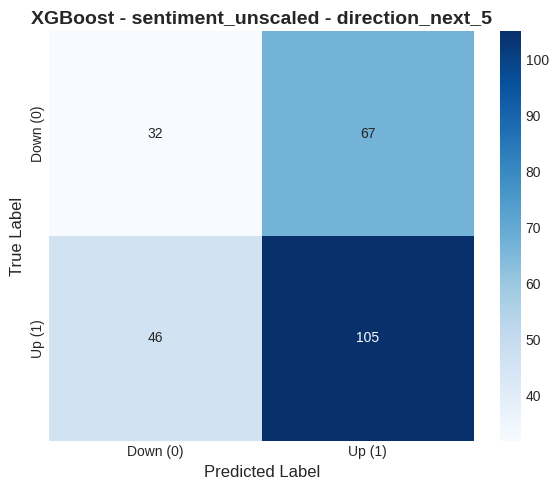

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_5_LightGBM_confusion_matrix.png


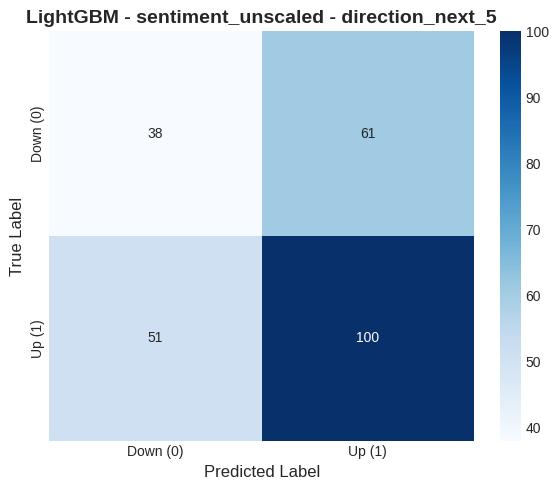

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_5_Ensemble_confusion_matrix.png


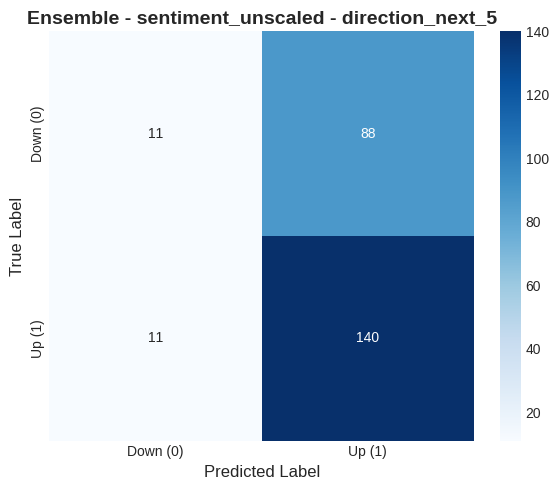

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_5_GRU_medium_confusion_matrix.png


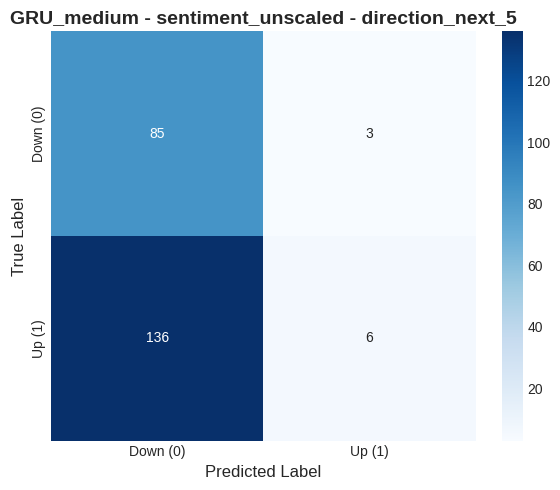

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_5_LSTM_medium_confusion_matrix.png


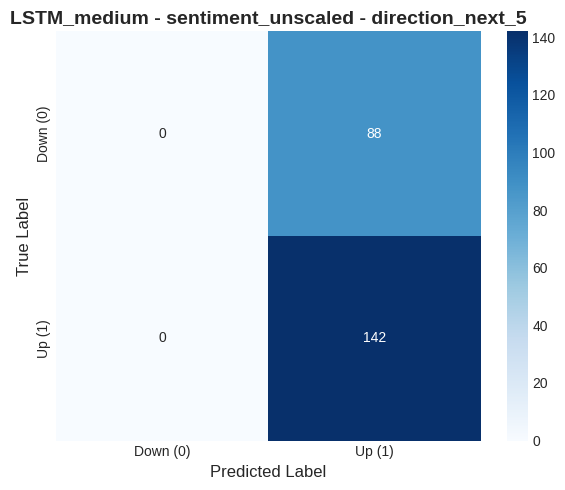

  ✓ Matriz generada para LSTM_medium

sentiment_unscaled - direction_next_10: 6 modelos
  Encontrados 6 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_10_Random_Forest_confusion_matrix.png


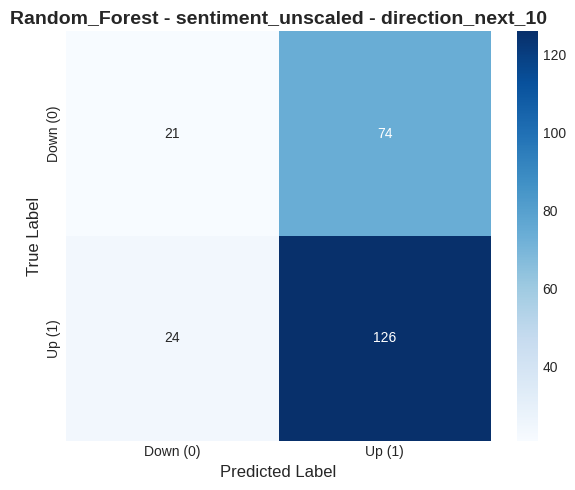

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_10_XGBoost_confusion_matrix.png


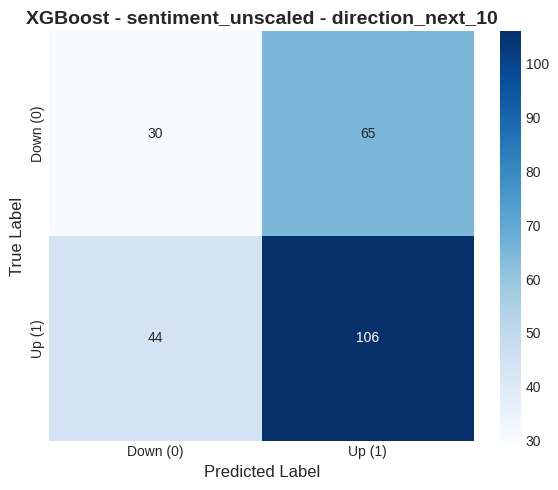

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_10_LightGBM_confusion_matrix.png


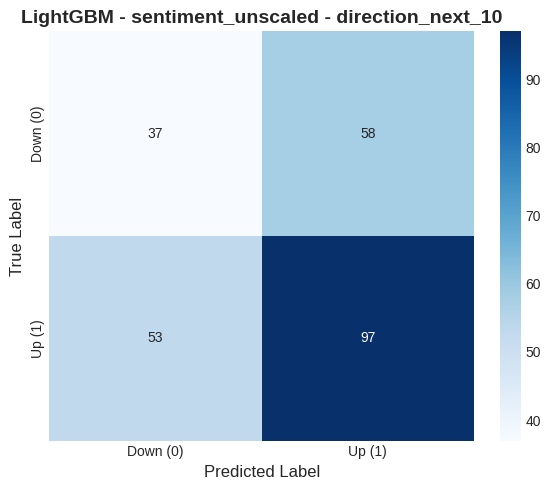

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_10_Ensemble_confusion_matrix.png


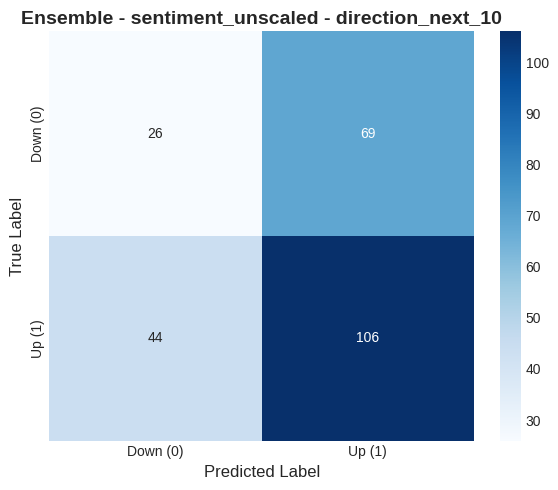

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_10_GRU_medium_confusion_matrix.png


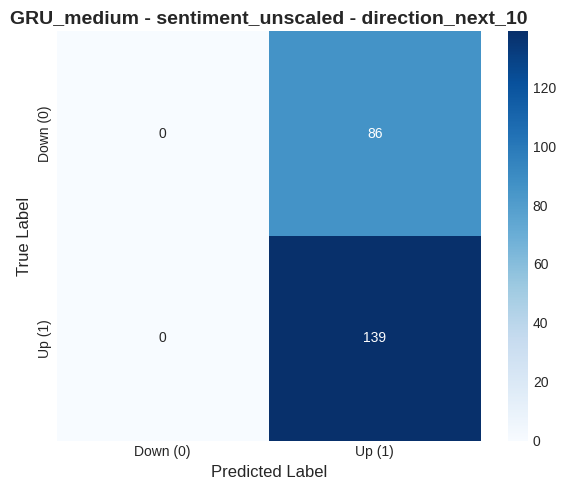

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_10_LSTM_medium_confusion_matrix.png


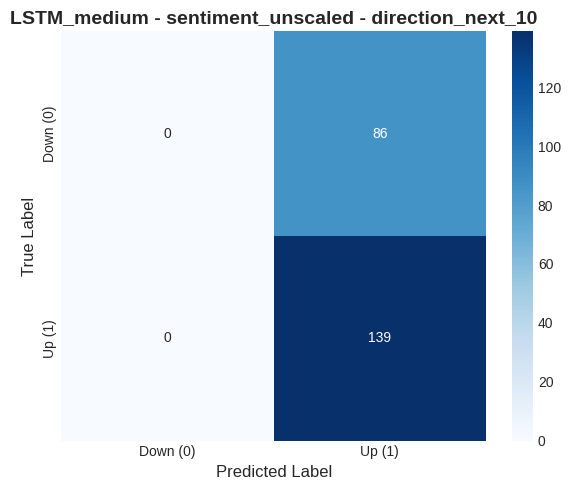

  ✓ Matriz generada para LSTM_medium

sentiment_unscaled - direction_next_20: 6 modelos
  Encontrados 6 archivos CSV
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_20_Random_Forest_confusion_matrix.png


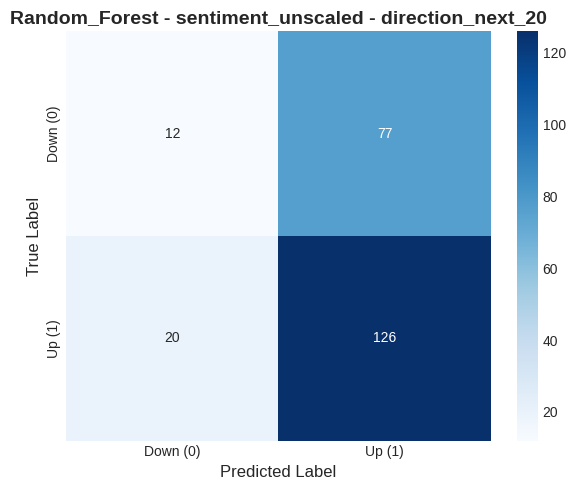

  ✓ Matriz generada para Random_Forest
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_20_XGBoost_confusion_matrix.png


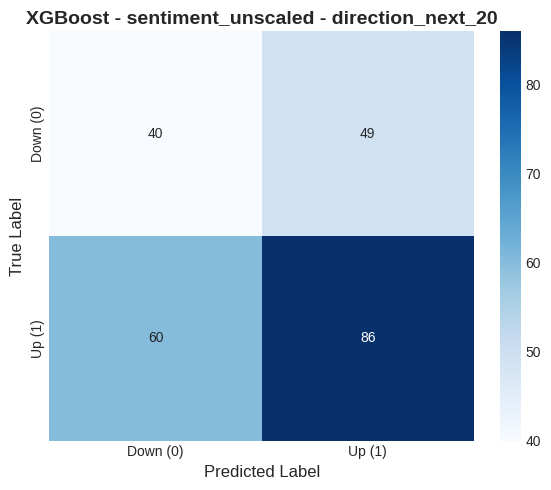

  ✓ Matriz generada para XGBoost
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_20_LightGBM_confusion_matrix.png


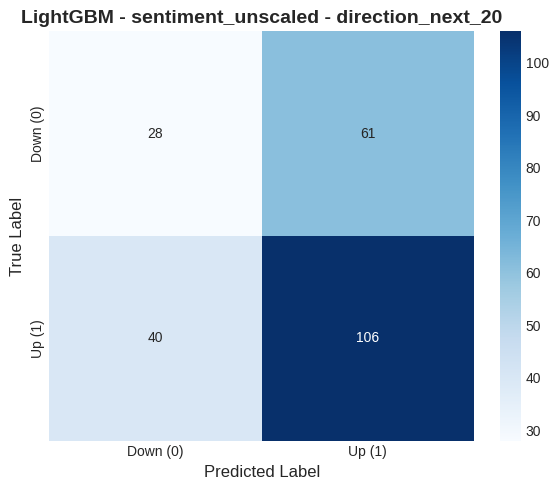

  ✓ Matriz generada para LightGBM
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_20_Ensemble_confusion_matrix.png


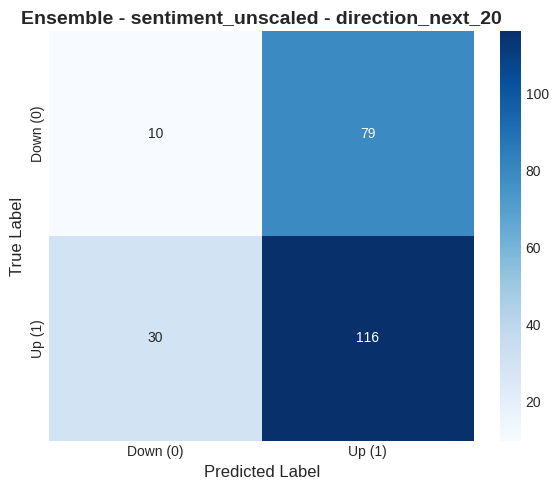

  ✓ Matriz generada para Ensemble
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_20_GRU_medium_confusion_matrix.png


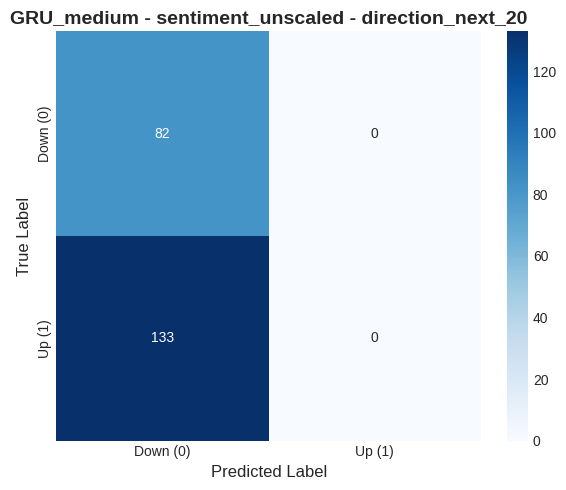

  ✓ Matriz generada para GRU_medium
   Confusion matrix guardada: /content/drive/MyDrive/TFM/results/plots/sentiment_unscaled_direction_next_20_LSTM_medium_confusion_matrix.png


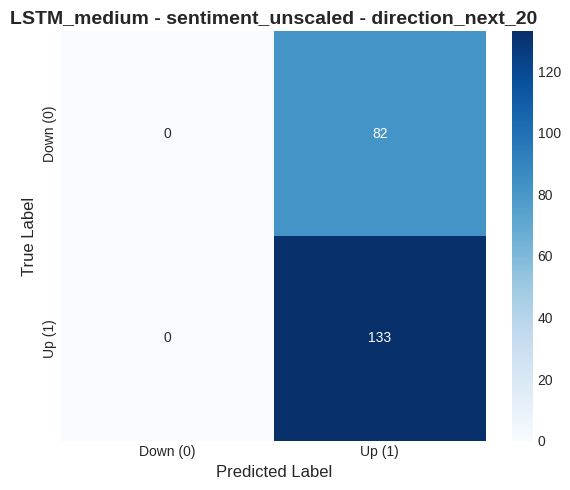

  ✓ Matriz generada para LSTM_medium

✓ Matrices de confusión completadas


In [19]:
import numpy as np
# Generar matrices de confusión para clasificación
print("Generando matrices de confusión...")
print("="*70)

if not clf_df.empty:
    # Por cada combinación dataset-target
    for dataset in clf_df['dataset'].unique():
        for target in clf_df['target'].unique():
            subset = clf_df[
                (clf_df['dataset'] == dataset) &
                (clf_df['target'] == target)
            ]

            if len(subset) > 0:
                print(f"\n{dataset} - {target}: {len(subset)} modelos")

                # Construir path a la carpeta
                predictions_dir = CSV / dataset / target

                if predictions_dir.exists() and predictions_dir.is_dir():
                    # Obtener todos los CSV en la carpeta
                    csv_files = list(predictions_dir.glob('*_predictions.csv'))

                    if csv_files:
                        print(f"  Encontrados {len(csv_files)} archivos CSV")

                        for csv_file in csv_files:
                            try:
                                # Extraer nombre del modelo del archivo
                                model_name = csv_file.stem.replace('_predictions', '')

                                # Cargar predicciones
                                pred_df = pd.read_csv(csv_file)

                                y_true = pred_df['y_true'].values
                                y_pred = pred_df['y_pred'].values

                                # Generar matriz de confusión
                                plot_confusion_matrix(
                                    y_true,
                                    y_pred,
                                    title=f"{model_name} - {dataset} - {target}",
                                    model_name=f"{dataset}_{target}_{model_name}"
                                )
                                print(f"  ✓ Matriz generada para {model_name}")

                            except Exception as e:
                                print(f"  ✗ Error con {csv_file.name}: {e}")
                    else:
                        print(f"  ⚠ No se encontraron archivos CSV en {predictions_dir}")
                else:
                    print(f"  ⚠ Directorio no encontrado: {predictions_dir}")
else:
    print("⚠ No hay resultados de clasificación")

print("\n" + "="*70)
print("✓ Matrices de confusión completadas")

### 6.2 ¿Existe una mejora al incorporar sentimientos desde GDELT?

#### Regresión

In [26]:
import logging

# Nombre del fichero log con timestamp (opcional pero recomendable)
logfile = os.path.join(
    CSV,
    f"sentiment_analysis_improvement_regression_{datetime.now().strftime('%Y%m%d_%H%M%S')}.log"
)

logging.basicConfig(
    filename=logfile,
    filemode="w",
    encoding="utf-8",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

if not reg_df.empty:
    logging.info(f"\n\n{'='*70}")
    logging.info("ANÁLISIS: ¿SENTIMENT MEJORA LAS PREDICCIONES?")
    logging.info("Classificación")
    logging.info(f"{'='*70}\n")

    # Comparar financial vs sentiment (mismo scaling)
    for scale_type in ['scaled', 'unscaled']:
        financial_data = reg_df[reg_df['dataset'] == f'financial_{scale_type}']
        sentiment_data = reg_df[reg_df['dataset'] == f'sentiment_{scale_type}']

        if not financial_data.empty and not sentiment_data.empty:
            logging.info(f"\n== {scale_type.upper()} ==")

            # Por cada modelo y target, comparar
            for model in reg_df['model'].unique():
                for target in custom_config.get('targets_regression',[]):
                    fin = financial_data[(financial_data['model'] == model) &
                                        (financial_data['target'] == target)]
                    sent = sentiment_data[(sentiment_data['model'] == model) &
                                         (sentiment_data['target'] == target)]

                    if not fin.empty and not sent.empty:
                        fin_acc = fin['Direction_Accuracy'].values[0]
                        sent_acc = sent['Direction_Accuracy'].values[0]
                        diff = sent_acc - fin_acc

                        symbol = "📈" if diff > 0 else "📉" if diff < 0 else "➡️"
                        logging.info(
                            f"{model:15} | {target:15} | "
                            f"Financial: {fin_acc:5.2f}% | "
                            f"Sentiment: {sent_acc:5.2f}% | "
                            f"Diff: {diff:+5.2f}% {symbol}"
                            )
print(f" Aporte de GCELT a los modelos de regresión guardada en: {logfile}"
)

 Aporte de GCELT a los modelos guardada en: /content/drive/MyDrive/TFM/results/csv/sentiment_analysis_improvement_regression_20251130_210537.log


#### Clasificación

In [27]:
import logging

# Nombre del fichero log con timestamp (opcional pero recomendable)
logfile = os.path.join(
    CSV,
    f"sentiment_analysis_improvement_classification_{datetime.now().strftime('%Y%m%d_%H%M%S')}.log"
)

logging.basicConfig(
    filename=logfile,
    filemode="w",
    encoding="utf-8",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)


if not clf_df.empty:
    logging.info(f"\n\n{'='*70}")
    logging.info("ANÁLISIS: ¿SENTIMENT MEJORA LAS PREDICCIONES?")
    logging.info("Classificación")
    logging.info(f"{'='*70}\n")

    # Comparar financial vs sentiment (mismo scaling)
    for scale_type in ['scaled', 'unscaled']:
        financial_data = clf_df[clf_df['dataset'] == f'financial_{scale_type}']
        sentiment_data = clf_df[clf_df['dataset'] == f'sentiment_{scale_type}']

        if not financial_data.empty and not sentiment_data.empty:
            logging.info(f"\n== {scale_type.upper()} ==")

            # Por cada modelo y target, comparar
            for model in clf_df['model'].unique():
                for target in custom_config.get('targets_classification',[]):
                    fin = financial_data[(financial_data['model'] == model) &
                                        (financial_data['target'] == target)]
                    sent = sentiment_data[(sentiment_data['model'] == model) &
                                         (sentiment_data['target'] == target)]

                    if not fin.empty and not sent.empty:
                        fin_acc = fin['Accuracy'].values[0]
                        sent_acc = sent['Accuracy'].values[0]
                        diff = sent_acc - fin_acc

                        symbol = "📈" if diff > 0 else "📉" if diff < 0 else "➡️"
                        logging.info(f"{model:15} | {target:15} | "
                        f"Financial: {fin_acc:5.2f}% | "
                        f"Sentiment: {sent_acc:5.2f}% | "
                        f"Diff: {diff:+5.2f}% {symbol}")
print(f" Aporte de GCELT a los modelos de clasificación guardada en: {logfile}"
)

 Aporte de GCELT a los modelos de clasificación guardada en: /content/drive/MyDrive/TFM/results/csv/sentiment_analysis_improvement_classification_20251130_210610.log


Procederemos a analizar estas diferencias para comprombar si son estadísticamente significativas, mediante los test de McNemar para el caso de clasificación, o de Mariano-Diebold en el caso de la regresión.

### 6.3 Comparaciones Estadísticas

Unir todas las predicciones en un único df

#### Regresión

In [28]:
# EJECUTAR COMPARACIONES ESTADÍSTICAS PARA REGRESIÓN
regression_stats = run_regression_statistical_comparisons(reg_predictions_df, targets=['returns_next', 'returns_next_5',
                                                     'returns_next_10', 'returns_next_20'])

# Guardar resultados
regression_stats.to_csv(f"{CSV}/statistical_comparison_regression.csv", index=False, float_format='%.10f')
regression_stats.to_parquet(f"{CSV}/statistical_comparison_regression.parquet", index=False, engine='pyarrow')


print(f"\n✓ Resultados guardados en {CSV}/statistical_comparison_regression.csv")



######################################################################
# REGRESIÓN - TARGET: returns_next
######################################################################


== Financial_vs_Sentiment (scaled) - 254 muestras válidas ==

→ Ensemble_predictions.parquet:
   RMSE: financial=1.0003, sentiment=1.0057
   DM p-value: 0.5538 
   Bootstrap IC 95%: [-0.0224, 0.0121] ✓ SIGNIFICATIVO
⚠ GRU_predictions.parquet: Modelo secuencial (GRU), saltando...
⚠ LSTM_medium_predictions.parquet: Modelo secuencial (GRU), saltando...

→ LightGBM_predictions.parquet:
   RMSE: financial=1.0580, sentiment=1.1587
   DM p-value: 0.0009 ✓ SIGNIFICATIVO
   Bootstrap IC 95%: [-0.1564, -0.0420] ✓ SIGNIFICATIVO

→ Linear_predictions.parquet:
   RMSE: financial=1.0760, sentiment=1.0729
   DM p-value: 0.4659 
   Bootstrap IC 95%: [-0.0053, 0.0118] ✓ SIGNIFICATIVO

→ MLP_predictions.parquet:
   RMSE: financial=1.0255, sentiment=1.0077
   DM p-value: 0.6631 
   Bootstrap IC 95%: [-0.0541, 0.1057] ✓ SIGNIFIC

##### Visualizaciones Regresión

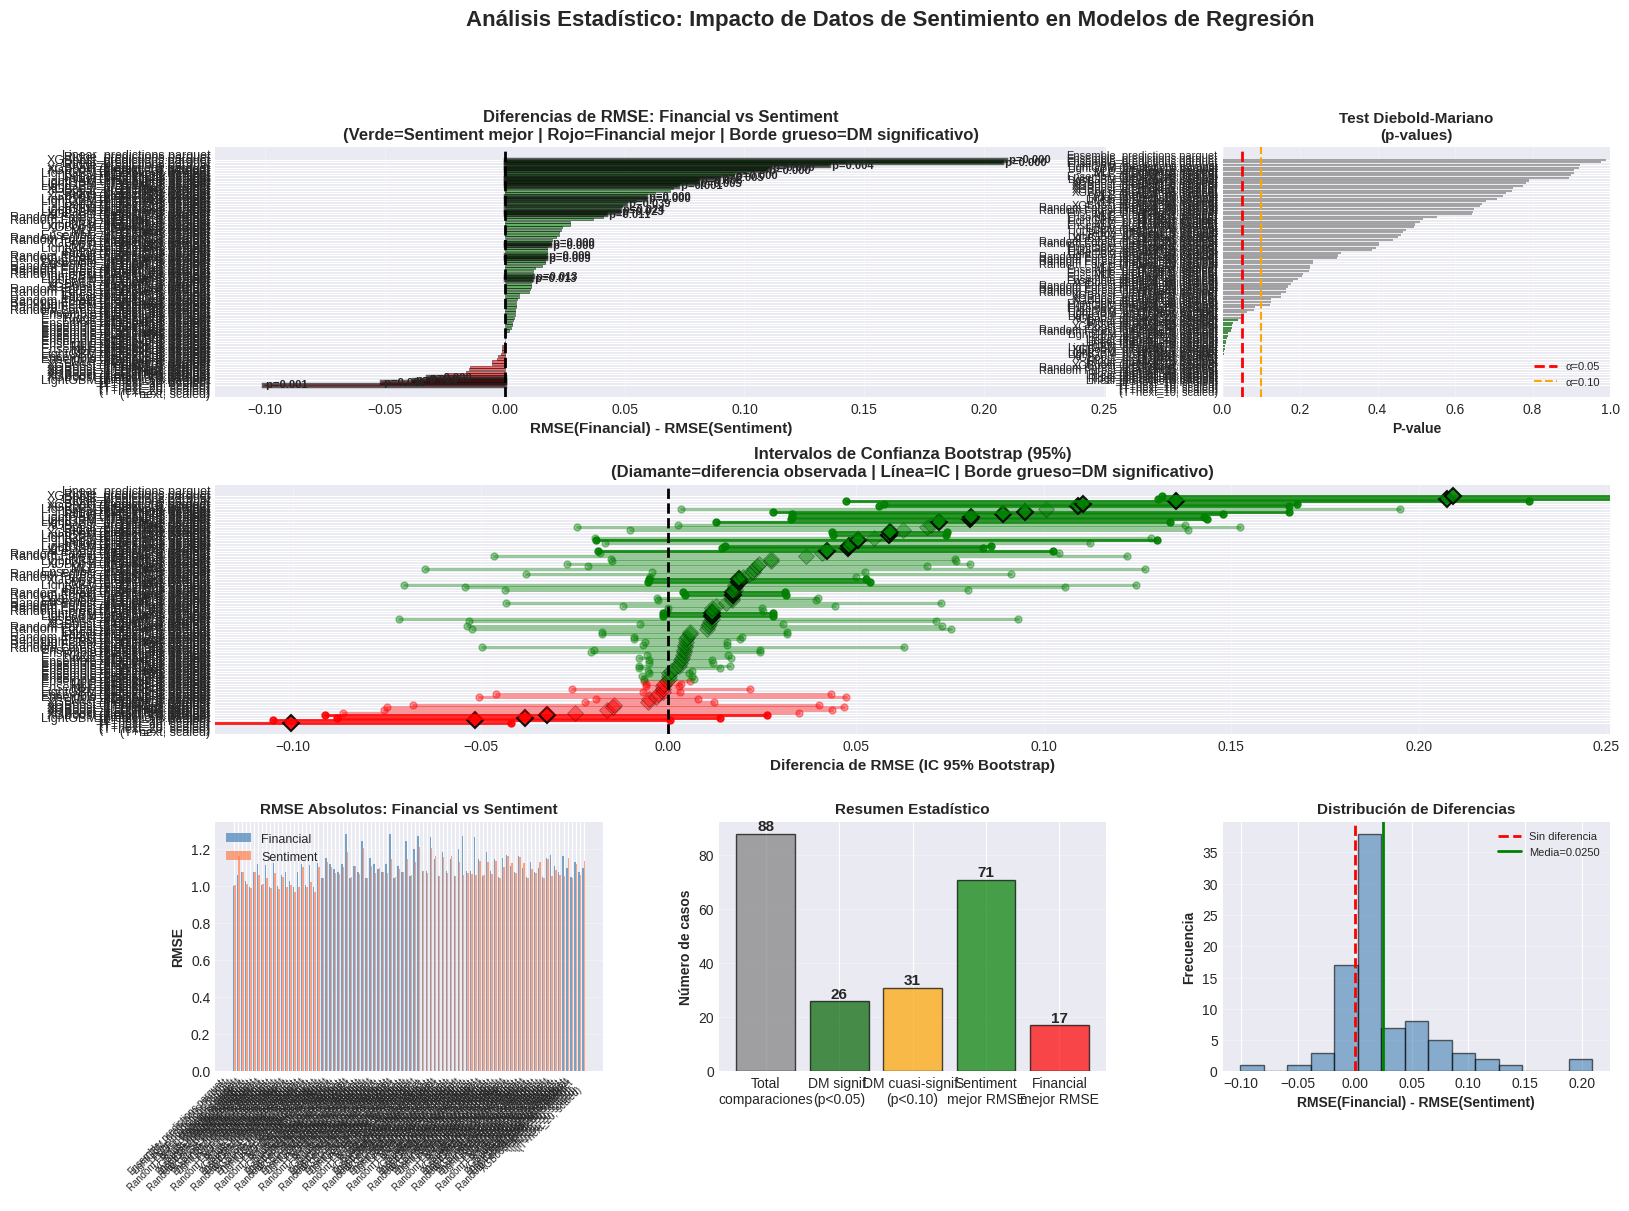


INTERPRETACIÓN DE RESULTADOS - REGRESIÓN

📊 RESUMEN GENERAL:
   • Total de comparaciones: 88
   • Casos donde Sentiment es mejor (RMSE menor): 71 (80.7%)
   • Casos donde Financial es mejor (RMSE menor): 17 (19.3%)
   • Diferencia media de RMSE: 0.0250

🔬 SIGNIFICANCIA ESTADÍSTICA:
   • Test Diebold-Mariano (p<0.05): 26 casos significativos
   • Test Diebold-Mariano (p<0.10): 31 casos cuasi-significativos

   Casos DM significativos (p<0.05):
      - LightGBM_predictions.parquet (returns_next, scaled): diff=-0.1007, p=0.0009 → Financial MEJOR
      - Linear_predictions.parquet (returns_next, scaled): diff=0.0806, p=0.0055 → Sentiment MEJOR
      - Ridge_predictions.parquet (returns_next, scaled): diff=0.0803, p=0.0053 → Sentiment MEJOR
      - LightGBM_predictions.parquet (returns_next, scaled): diff=0.0892, p=0.0048 → Sentiment MEJOR
      - Linear_predictions.parquet (returns_next_5, scaled): diff=0.0172, p=0.0093 → Sentiment MEJOR
      - Ridge_predictions.parquet (returns_next_5, 

In [29]:
# Visualizar
plot_statistical_results_regression(regression_stats)

#### Clasificación

In [30]:
# EJECUTAR COMPARACIONES ESTADÍSTICAS - CLASIFICACIÓN

# Comparación con configuración por defecto (las 3 comparaciones)
classification_stats = run_classification_statistical_comparisons(clf_predictions_df,
    targets=['direction_next', 'direction_next_5', 'direction_next_10', 'direction_next_20']
)

# Guardar resultados consolidados
if not classification_stats.empty:
    classification_stats.to_csv(f"{CSV}/statistical_comparison_classification.csv", index=False, float_format='%.10f')
    classification_stats.to_parquet(f"{CSV}/statistical_comparison_classification.parquet", index=False, engine='pyarrow')

    print(f"\n✓ Resultados guardados en {CSV}/statistical_comparison_classification.csv")


    # Separar por tipo de comparación para análisis individual
    for comp_type in classification_stats['comparison_type'].unique():
        df_comp = classification_stats[classification_stats['comparison_type'] == comp_type]
        filename = f"{CSV}/classification_stats_{comp_type}.csv"
        df_comp.to_csv(filename, index=False)
        print(f"✓ Guardado: {filename}")




######################################################################
# CLASIFICACIÓN - TARGET: direction_next
######################################################################

 Financial_vs_Sentiment: 254 muestras válidas / 255 totales
 Test sets idénticos
== Financial_vs_Sentiment (scaled) - Comparando 8 modelos ==

COMPARACIÓN: Ensemble_predictions.parquet (financial_scaled) vs Ensemble_predictions.parquet (sentiment_scaled)

 McNemar Test:
   Accuracy Ensemble_predictions.parquet (financial_scaled): 0.5827
   Accuracy Ensemble_predictions.parquet (sentiment_scaled): 0.5669
   Diferencia: -0.0157
   Statistic: 0.2812
   p-value: 0.5959
   NO significativo (p >= 0.05)

 Bootstrap (1000 iteraciones):
   Diferencia media: -0.0165
   IC 95%: [-0.0592, 0.0276]
   Intervalo incluye 0 → Diferencia NO significativa

⚠ GRU_medium_predictions.parquet: 235 predicciones < 255 y_test
   Probablemente modelo secuencial (GRU)

⚠ LSTM_medium_predictions.parquet: 235 predicciones < 255 y_te

##### Visualizaciones Clasificación

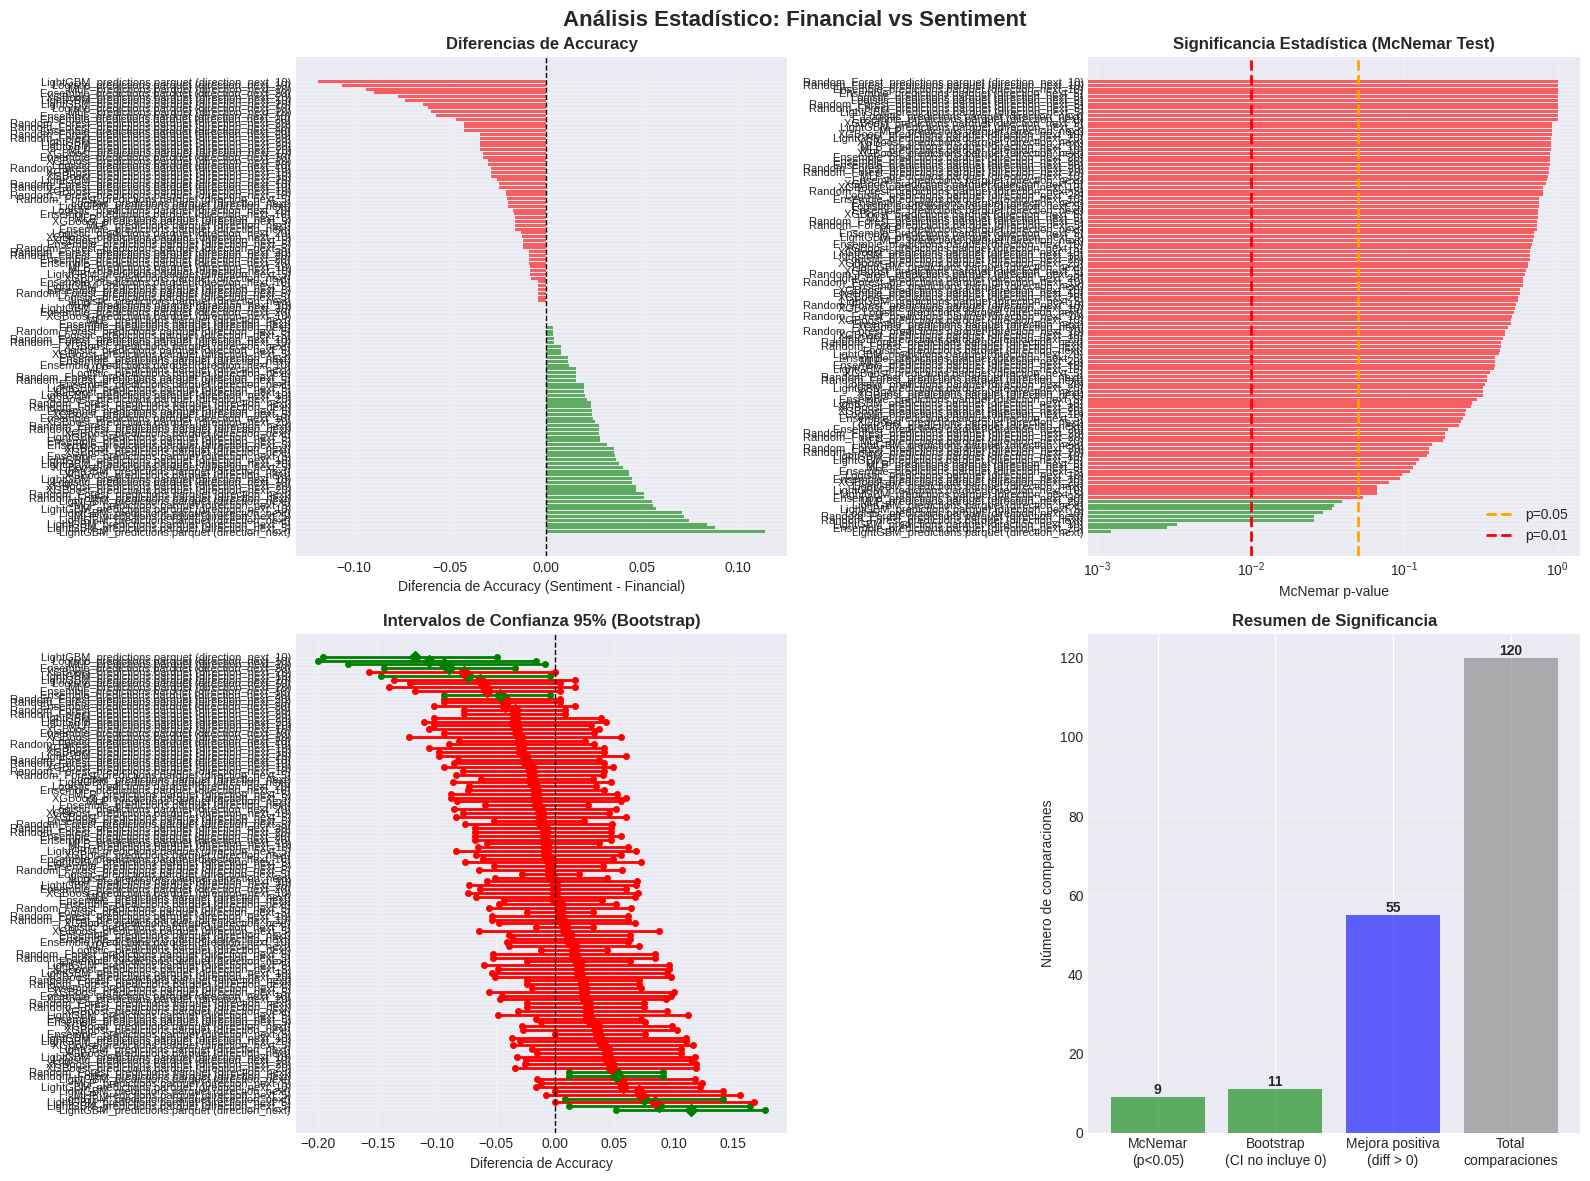


RESUMEN ESTADÍSTICO

Total comparaciones: 120
Mejoras (sentiment > financial): 55
Empeoramientos (sentiment < financial): 59

Significativas (McNemar p<0.05): 9 (7.5%)
Significativas (Bootstrap IC): 11 (9.2%)

DIFERENCIAS ESTADÍSTICAMENTE SIGNIFICATIVAS

📈 LightGBM_predictions.parquet (direction_next)
   Diff: 0.0748 | p-value: 0.0351 | CI: [0.0079, 0.1417]
📈 LightGBM_predictions.parquet (direction_next)
   Diff: 0.1142 | p-value: 0.0012 | CI: [0.0511, 0.1772]
📈 Random_Forest_predictions.parquet (direction_next)
   Diff: 0.0512 | p-value: 0.0259 | CI: [0.0118, 0.0906]
📈 Random_Forest_predictions.parquet (direction_next)
   Diff: 0.0512 | p-value: 0.0259 | CI: [0.0118, 0.0906]
📈 LightGBM_predictions.parquet (direction_next_5)
   Diff: 0.0880 | p-value: 0.0339 | CI: [0.0120, 0.1640]
📉 Logistic_predictions.parquet (direction_next_10)
   Diff: -0.1061 | p-value: 0.0296 | CI: [-0.2000, -0.0163]
📉 LightGBM_predictions.parquet (direction_next_10)
   Diff: -0.1184 | p-value: 0.0033 | CI: [-0.

In [31]:
# Visualizar
plot_statistical_results_classification(classification_stats)

### 6.4 Comparación entre horizontes

#### Clasificación

In [12]:
# Cargar el CSV correctamente
clf_pred_horizon_df = pd.read_csv(CSV / 'predictions_classification.csv')
# Convertir a estructura anidada
clf_predictions_df = {}

for _, row in clf_pred_horizon_df.iterrows():
    dataset = row['dataset']
    target = row['target']
    model = row['model']

    # Convertir string a lista y luego a array
    pred_str = row['predictions'].replace('\n', ' ')
    predictions = np.fromstring(pred_str.strip('[]'), sep=' ')

    if dataset not in clf_predictions_df:
        clf_predictions_df[dataset] = {}
    if target not in clf_predictions_df[dataset]:
        clf_predictions_df[dataset][target] = {}

    clf_predictions_df[dataset][target][model] = predictions

# Para classification_stats
classification_stats = {}

for _, row in clf_pred_horizon_df.iterrows():
    dataset = row['dataset']
    target = row['target']

    y_str = row['y_test'].replace('\n', ' ')
    y_test = np.fromstring(y_str.strip('[]'), sep=' ')

    if dataset not in classification_stats:
        classification_stats[dataset] = {}

    classification_stats[dataset][target] = y_test


In [33]:
print("COMPARACIÓN ENTRE HORIZONTES TEMPORALES")

# CLASIFICACIÓN
print("PARTE 1: CLASIFICACIÓN")

results_classification = compare_classification_across_horizons(
    clf_predictions_df,
    classification_stats,
    horizons=custom_config.get('targets_classification',[])
)

# Guardar resultados
results_classification.to_csv( CSV / 'horizon_comparison_classification.csv', index=False, float_format='%.10f')
results_classification.to_parquet( CSV / 'horizon_comparison_classification.parquet', index=False, engine='pyarrow')

print(f"\n✓ Resultados guardados en: horizon_comparison_classification.csv")

# Análisis
analyze_classification_horizon_effects(results_classification)



COMPARACIÓN ENTRE HORIZONTES TEMPORALES
PARTE 1: CLASIFICACIÓN

DATASET: financial_scaled
✓ Modelos comunes: ['Ensemble_predictions.parquet', 'GRU_medium_predictions.parquet', 'LSTM_medium_predictions.parquet', 'LightGBM_predictions.parquet', 'Logistic_predictions.parquet', 'MLP_predictions.parquet', 'Random_Forest_predictions.parquet', 'XGBoost_predictions.parquet']

──────────────────────────────────────────────────────────────────────
MODELO: Ensemble_predictions.parquet
──────────────────────────────────────────────────────────────────────
⚠ Menos de 2 horizontes disponibles para Ensemble_predictions.parquet

──────────────────────────────────────────────────────────────────────
MODELO: GRU_medium_predictions.parquet
──────────────────────────────────────────────────────────────────────

✓ Tamaño mínimo común: 215 observaciones

📊 Accuracy por horizonte (últimas 215 obs):
    1 días: 0.6233
    5 días: 0.5953
   10 días: 0.6047
   20 días: 0.5442

COMPARACIÓN: direction_next vs dir

#### Regresión

In [34]:
# Cargar el CSV correctamente
reg_pred_horizon_df = pd.read_csv(CSV / 'predictions_regression.csv')
# Convertir a estructura anidada
reg_predictions_df = {}

for _, row in reg_pred_horizon_df.iterrows():
    dataset = row['dataset']
    target = row['target']
    model = row['model']

    # Convertir string a lista y luego a array
    pred_str = row['predictions'].replace('\n', ' ')
    predictions = np.fromstring(pred_str.strip('[]'), sep=' ')

    if dataset not in reg_predictions_df:
        reg_predictions_df[dataset] = {}
    if target not in reg_predictions_df[dataset]:
        reg_predictions_df[dataset][target] = {}

    reg_predictions_df[dataset][target][model] = predictions

# Para regression_stats
regression_stats = {}

for _, row in reg_pred_horizon_df.iterrows():
    dataset = row['dataset']
    target = row['target']

    y_str = row['y_test'].replace('\n', ' ')
    y_test = np.fromstring(y_str.strip('[]'), sep=' ')

    if dataset not in regression_stats:
        regression_stats[dataset] = {}

    regression_stats[dataset][target] = y_test




In [35]:
# REGRESIÓN
print("PARTE 2: REGRESIÓN")

results_regression = compare_regression_across_horizons(
    reg_predictions_df,
    regression_stats,
    horizons=custom_config.get('targets_regression',[])
)

# Guardar resultados
results_regression.to_csv(CSV / 'horizon_comparison_regression.csv', index=False, float_format='%.10f')
results_regression.to_parquet(CSV / 'horizon_comparison_regression.parquet', index=False, engine='pyarrow')
print(f"\n✓ Resultados guardados en: horizon_comparison_regression.csv")

# Análisis
analyze_regression_horizon_effects(results_regression)

print("ANÁLISIS COMPLETADO")

PARTE 2: REGRESIÓN

DATASET: financial_scaled
✓ Modelos comunes: ['Ensemble_predictions.parquet', 'GRU_predictions.parquet', 'LSTM_medium_predictions.parquet', 'LightGBM_predictions.parquet', 'Linear_predictions.parquet', 'MLP_predictions.parquet', 'Random Forest_predictions.parquet', 'Ridge_predictions.parquet', 'XGBoost_predictions.parquet']

──────────────────────────────────────────────────────────────────────
MODELO: Ensemble_predictions.parquet
──────────────────────────────────────────────────────────────────────
⚠ Menos de 2 horizontes disponibles

──────────────────────────────────────────────────────────────────────
MODELO: GRU_predictions.parquet
──────────────────────────────────────────────────────────────────────

✓ Tamaño mínimo común: 215 observaciones

📊 Métricas por horizonte (últimas 215 obs):
    1 días: MAE=0.728657, RMSE=1.055350
    5 días: MAE=0.755266, RMSE=1.086668
   10 días: MAE=0.746907, RMSE=1.071119
   20 días: MAE=0.731598, RMSE=1.060202

  returns_next 

#### Visualizaciones

GENERANDO VISUALIZACIONES CLASIFICACION

📊 Clasificación...
✓ Guardado: horizon_evolution_classification.png


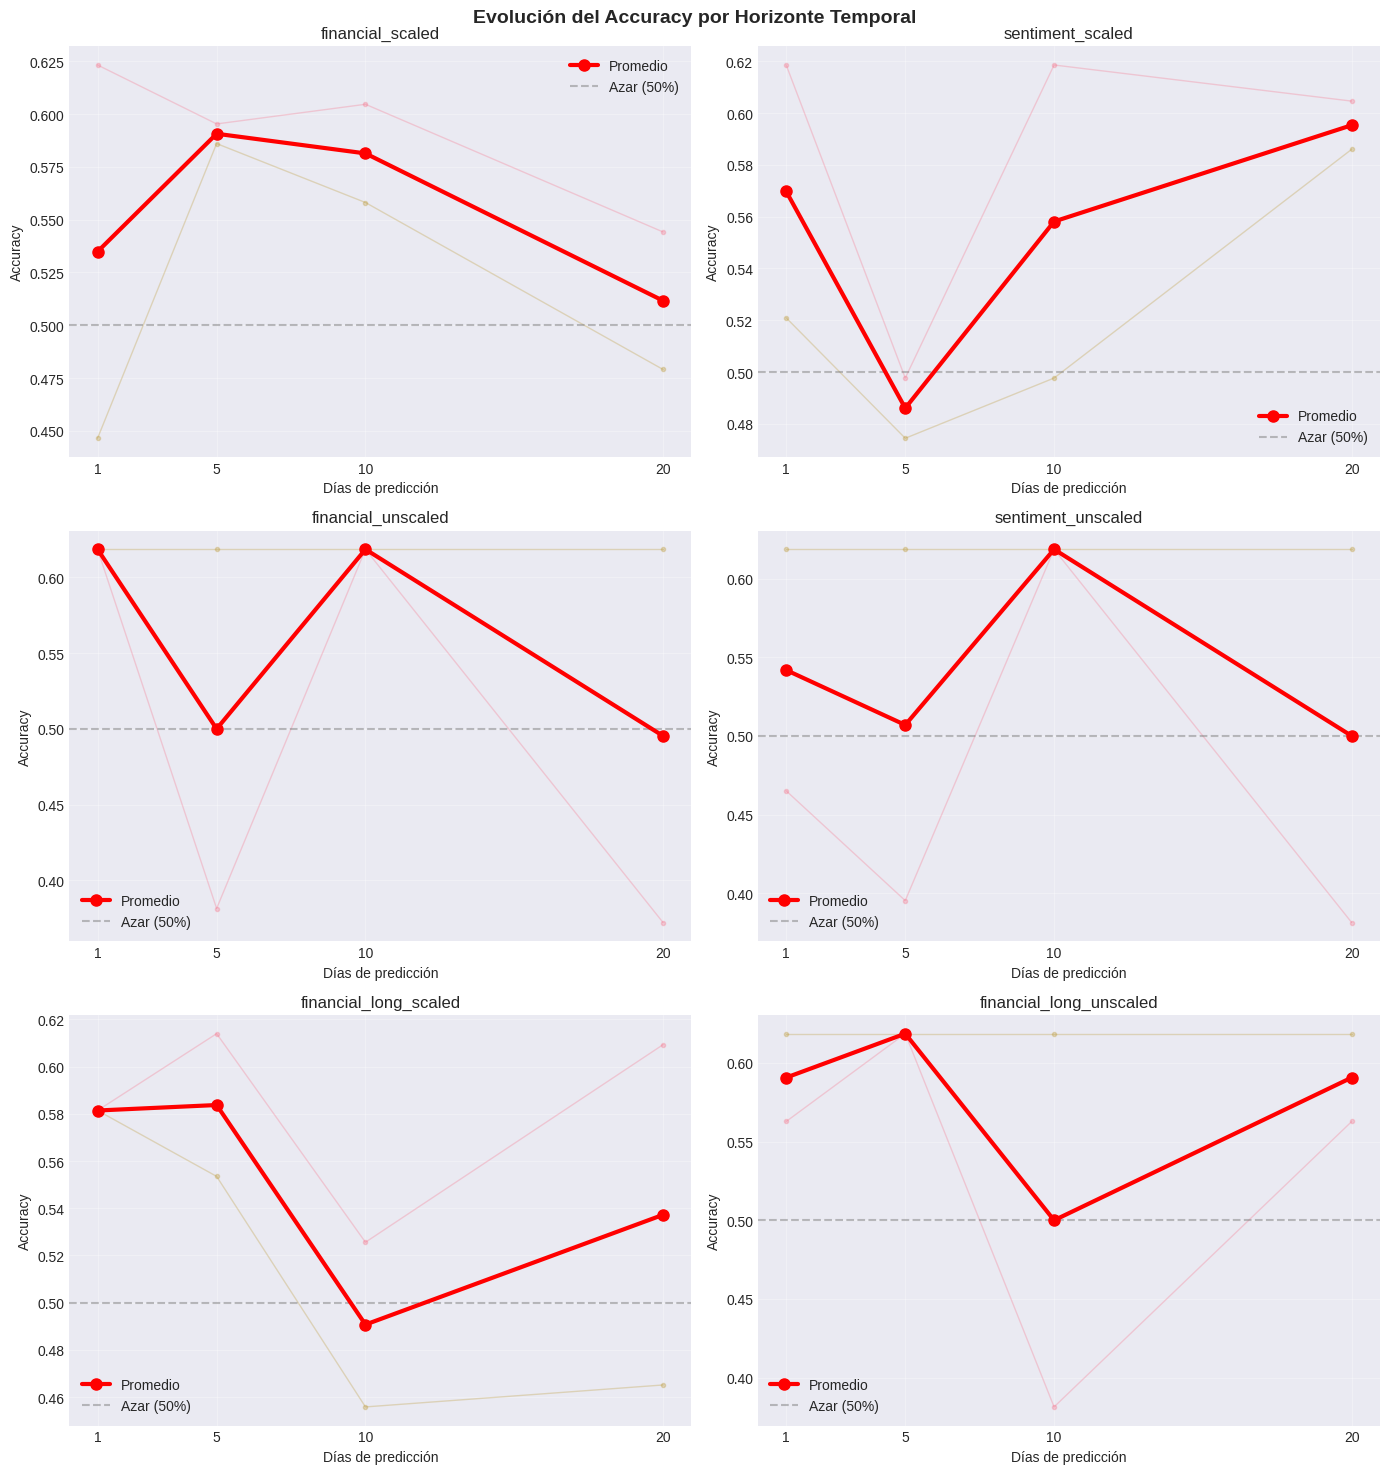

In [36]:
print("GENERANDO VISUALIZACIONES CLASIFICACION")

# Clasificación
print("\n📊 Clasificación...")
plot_classification_horizon_evolution(results_classification)

✓ Guardado: horizon_significance_heatmap_classification.png


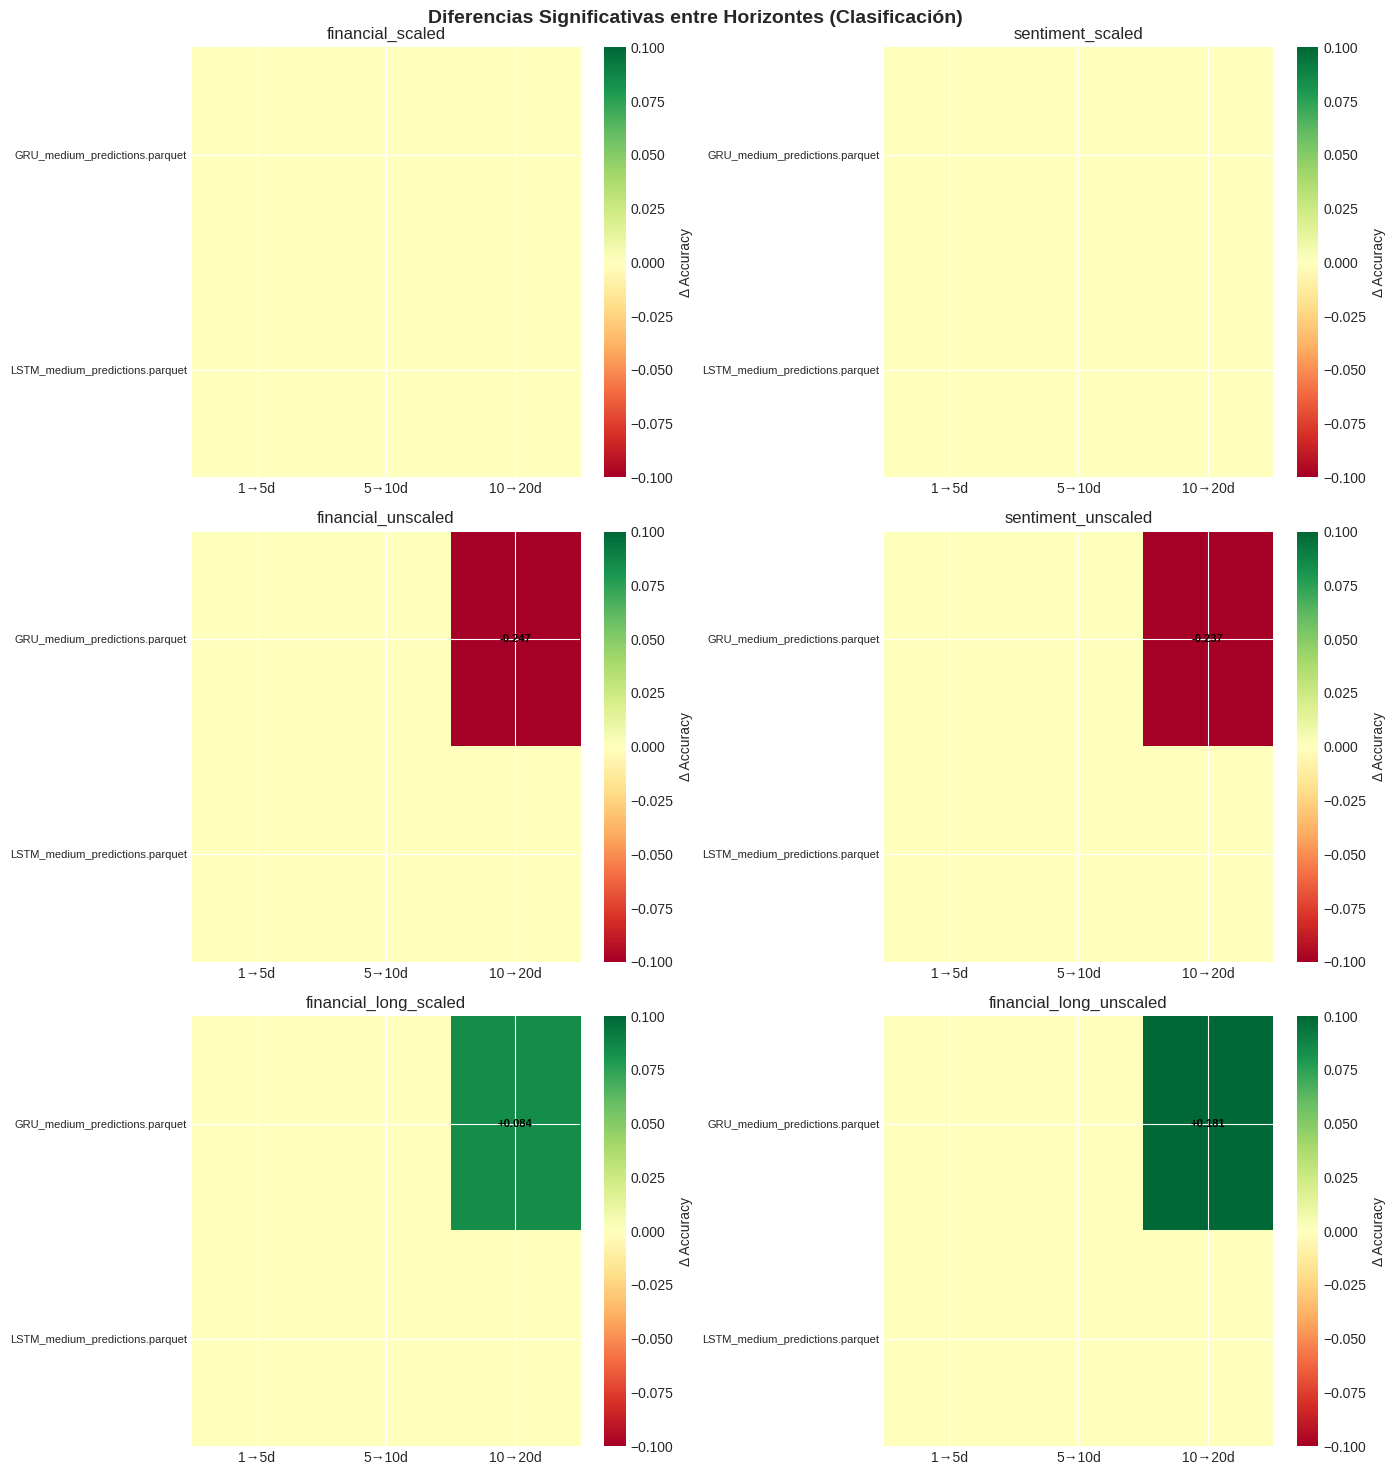

In [37]:

plot_classification_significance_heatmap(results_classification)


GENERANDO VISUALIZACIONES REGRESION

📊 Regresión...
✓ Guardado: horizon_evolution_mae_regression.png


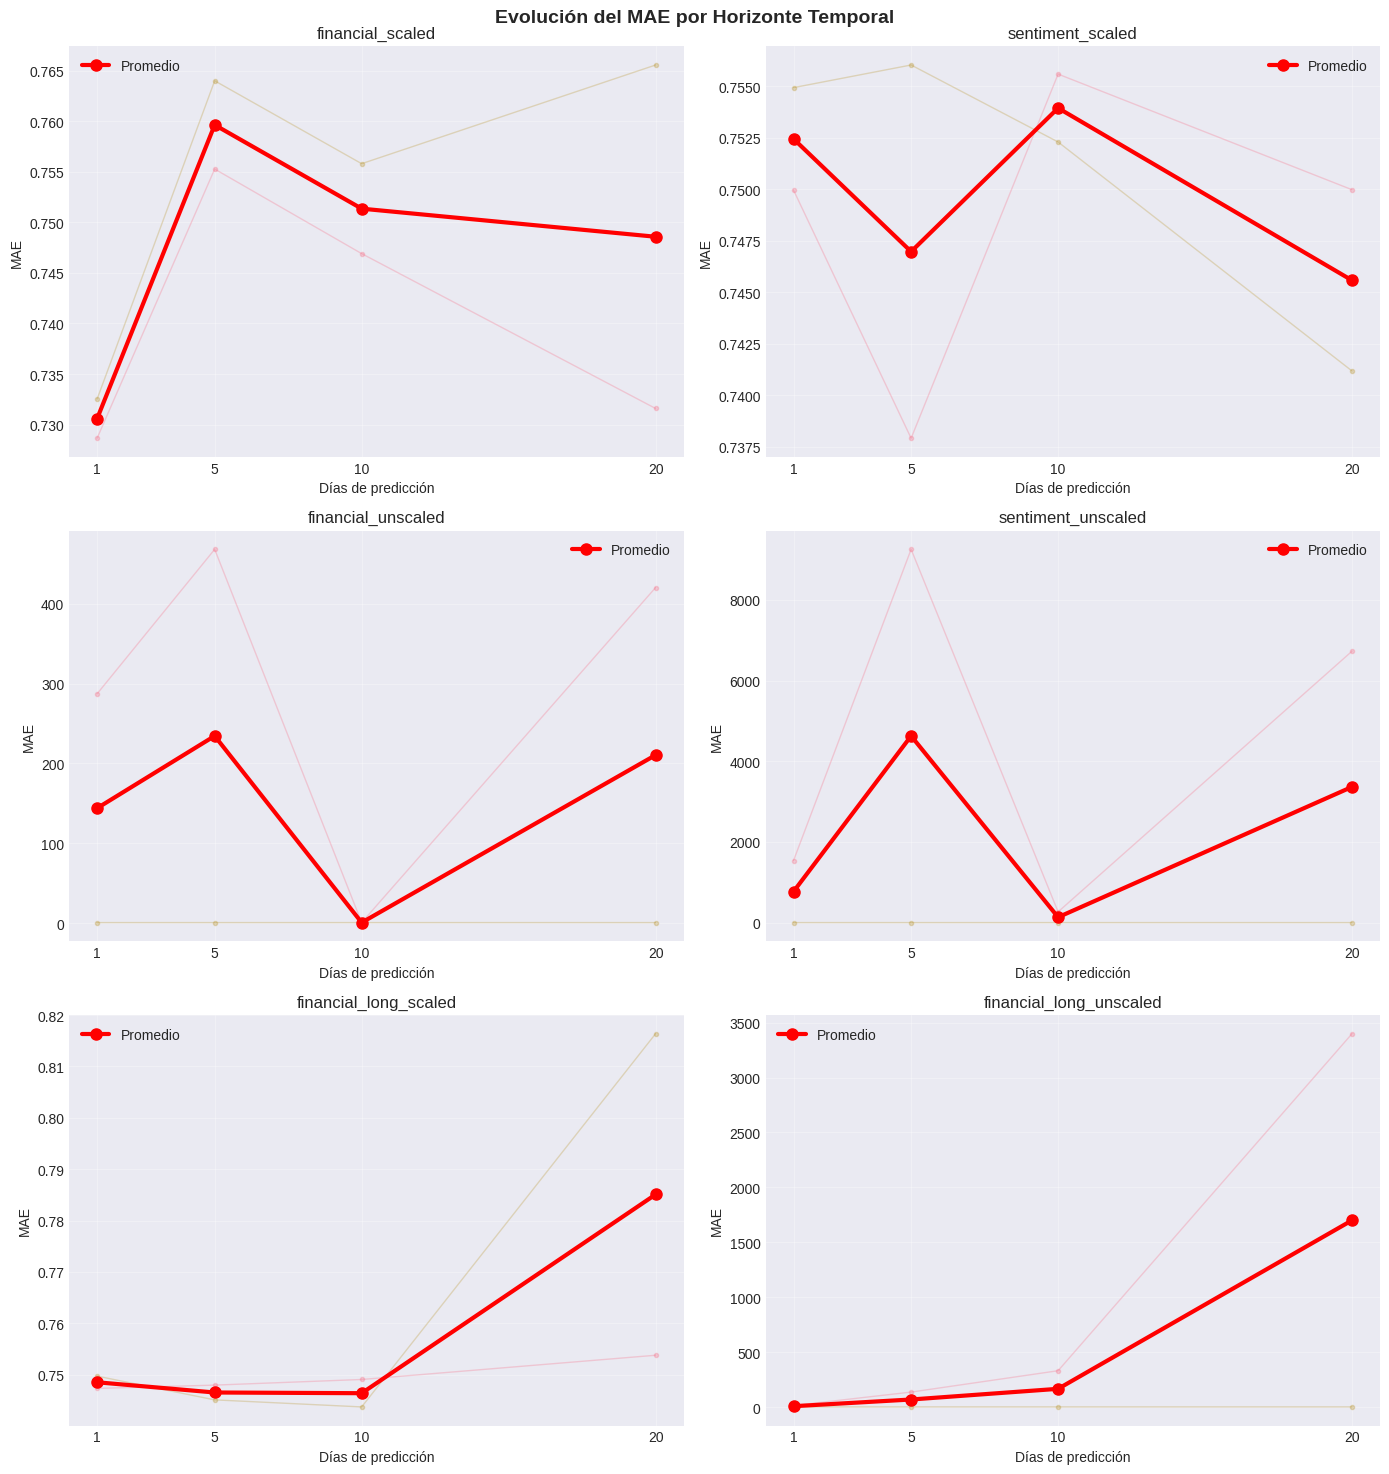

In [38]:
print("GENERANDO VISUALIZACIONES REGRESION")

# Regresión
print("\n📊 Regresión...")
plot_regression_horizon_evolution(results_regression)



✓ Guardado: horizon_boxplot_mae_regression.png


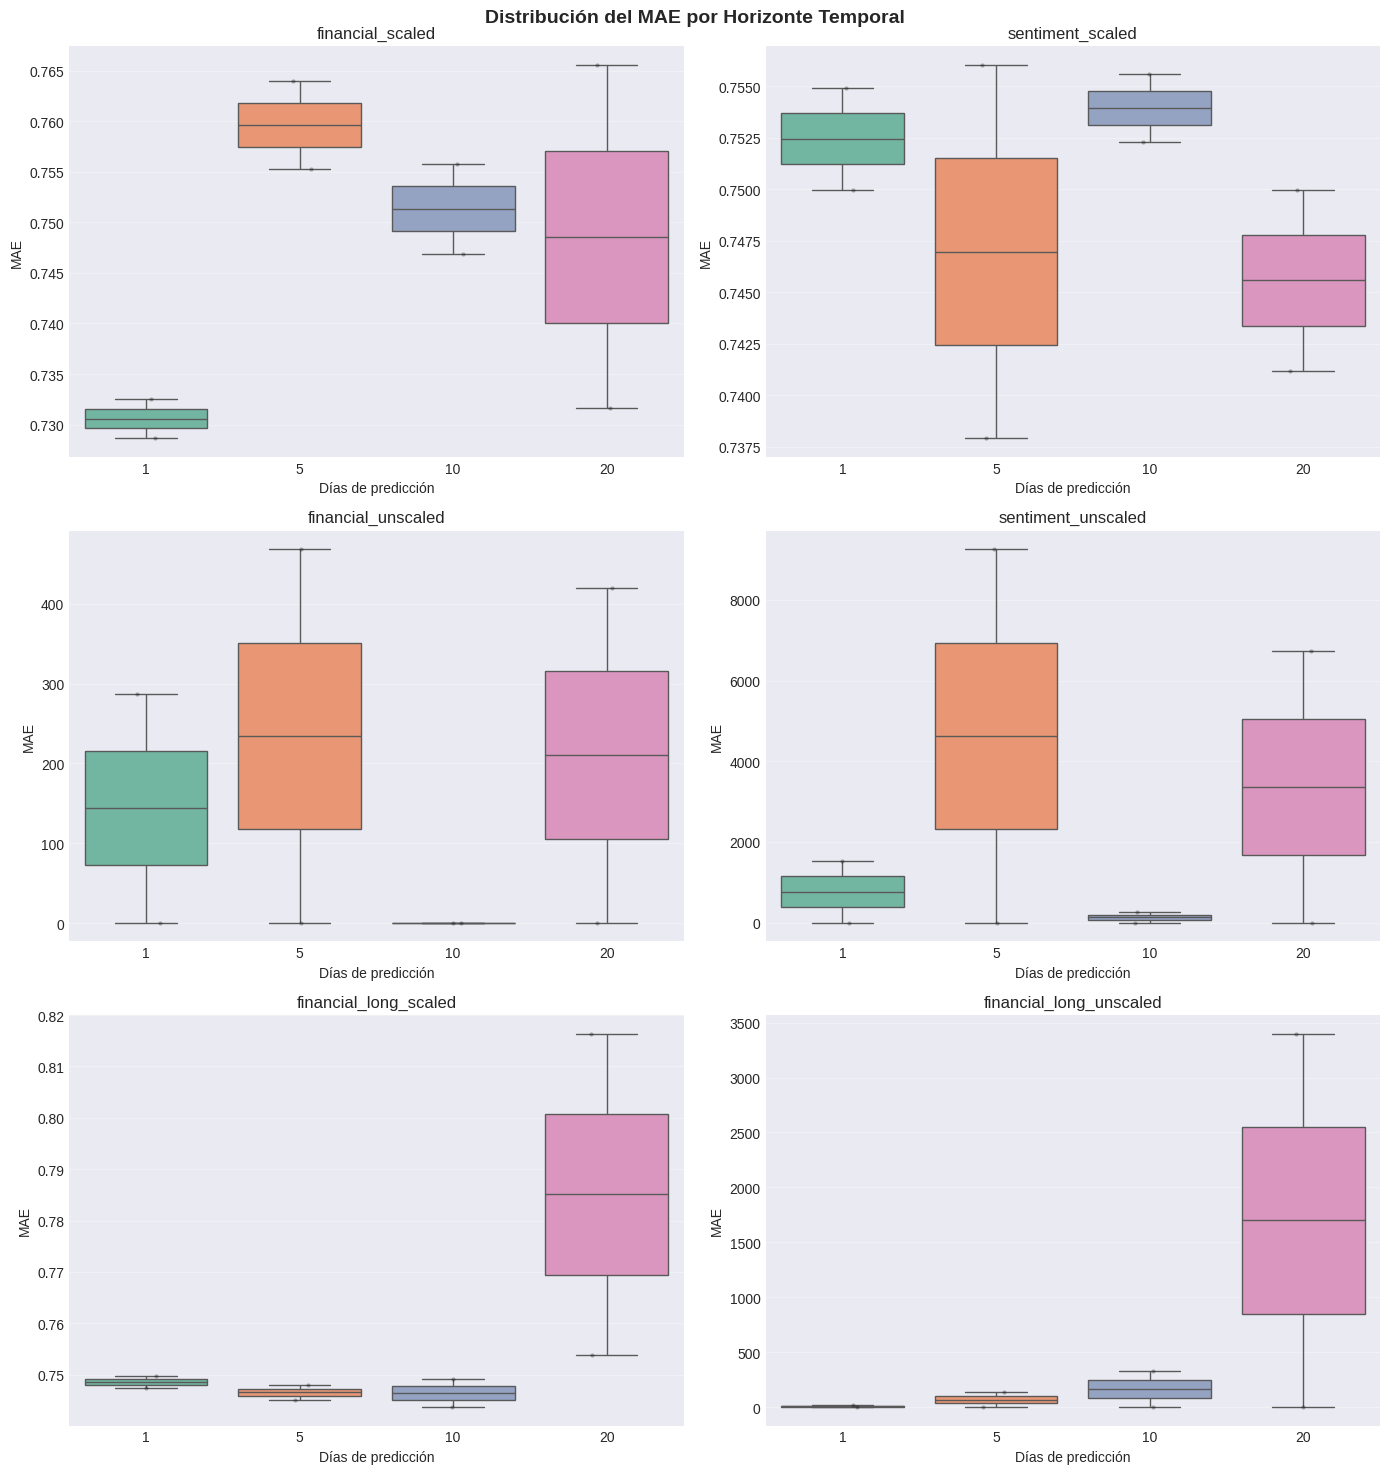

In [39]:
plot_regression_horizon_boxplot(results_regression)


📊 Resumen ejecutivo...
✓ Guardado: executive_summary_horizons.png


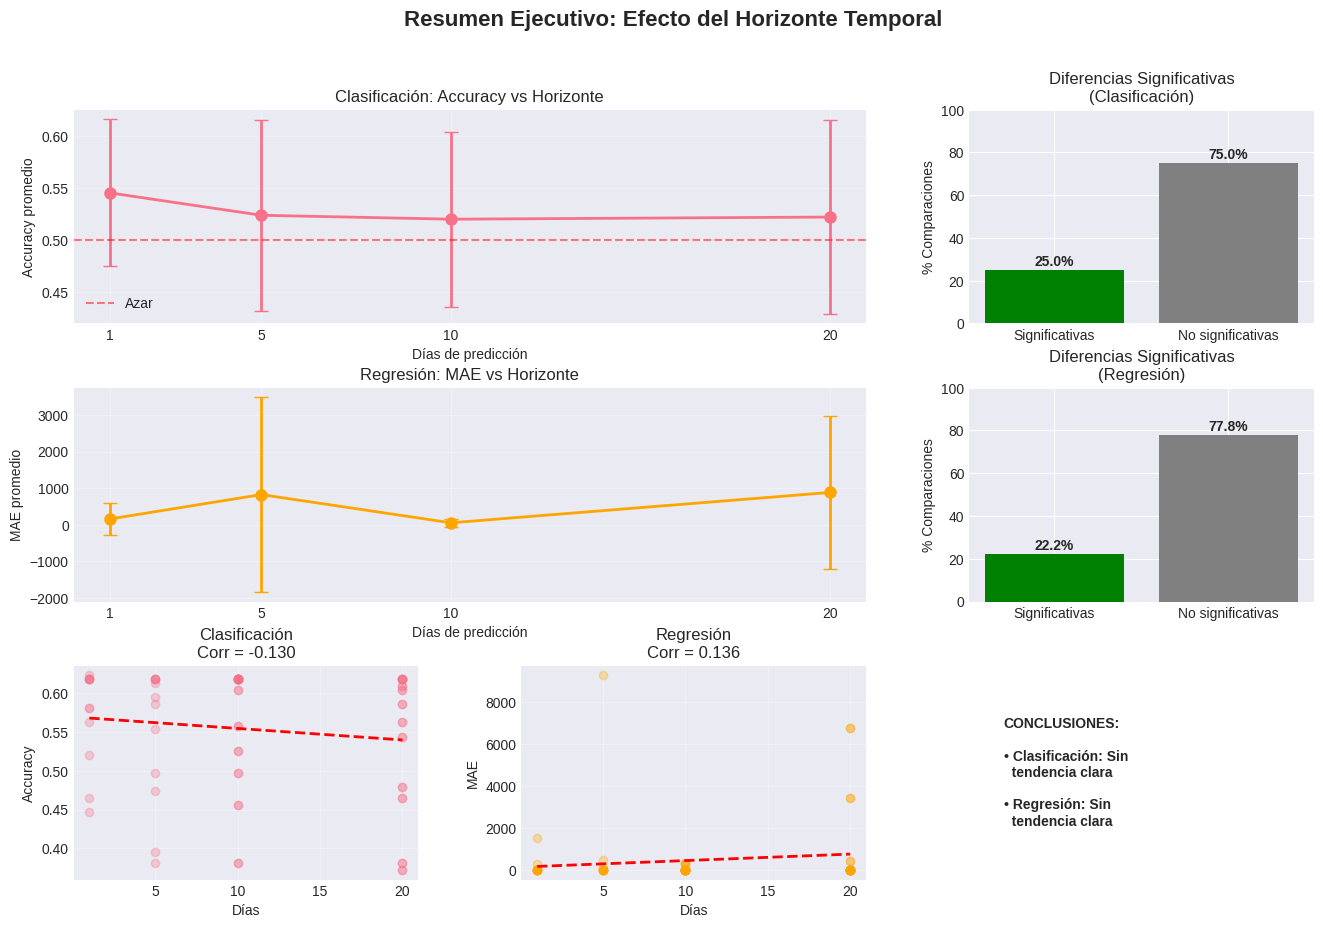


✓ Todas las visualizaciones generadas


In [40]:
# Resumen ejecutivo
print("\n📊 Resumen ejecutivo...")
plot_executive_summary(results_classification, results_regression)

print("\n✓ Todas las visualizaciones generadas")

### 6.3 Resumen Final de Estadísticas

In [41]:
# Resumen final
print("="*70)
print("RESUMEN FINAL DE RESULTADOS")
print("="*70)

if not reg_df.empty:
    best_rmse = reg_df.loc[reg_df['RMSE'].idxmin()]
    print("\nMEJOR MODELO - REGRESIÓN (menor RMSE):")
    print(f"  Dataset: {best_rmse['dataset']}")
    print(f"  Target: {best_rmse['target']}")
    print(f"  Modelo: {best_rmse['model']}")
    print(f"  RMSE: {best_rmse['RMSE']:.6f}")
    print(f"  MAE: {best_rmse['MAE']:.6f}")
    print(f"  R2: {best_rmse['R2']:.4f}")

if not clf_df.empty:
    best_acc = clf_df.loc[clf_df['Accuracy'].idxmax()]
    print("\nMEJOR MODELO - CLASIFICACIÓN (mayor Accuracy):")
    print(f"  Dataset: {best_acc['dataset']}")
    print(f"  Target: {best_acc['target']}")
    print(f"  Modelo: {best_acc['model']}")
    print(f"  Accuracy: {best_acc['Accuracy']:.4f}")
    print(f"  Precision: {best_acc['Precision']:.4f}")
    print(f"  Recall: {best_acc['Recall']:.4f}")
    print(f"  F1: {best_acc['F1']:.4f}")
    if 'ROC_AUC' in best_acc:
        print(f"  ROC_AUC: {best_acc['ROC_AUC']:.4f}")

print("\n" + "="*70)
print(f"Total modelos entrenados: {len(reg_df) + len(clf_df)}")
print(f"  Regresión: {len(reg_df)}")
print(f"  Clasificación: {len(clf_df)}")
print("="*70)

RESUMEN FINAL DE RESULTADOS

MEJOR MODELO - REGRESIÓN (menor RMSE):
  Dataset: financial_long_scaled
  Target: returns_next
  Modelo: Random Forest
  RMSE: 0.966141
  MAE: 0.706804
  R2: 0.1263

MEJOR MODELO - CLASIFICACIÓN (mayor Accuracy):
  Dataset: financial_long_scaled
  Target: direction_next_20
  Modelo: Random Forest
  Accuracy: 0.6298
  Precision: 0.6372
  Recall: 0.9384
  F1: 0.7590
  ROC_AUC: 0.5616

Total modelos entrenados: 348
  Regresión: 180
  Clasificación: 168


## 7.Evaluación de modelos ingenuos




In [42]:
print("EJECUTANDO EVALUACIÓN COMPLETA DE MODELOS")

# Verificar que el archivo existe
if not os.path.exists(SCRIPTS_PATH / 'evaluar_todos_modelos.py'):
    print("Error: No se encuentra el archivo 'evaluar_todos_modelos.py'")
    print("Asegúrate de tener el archivo en el mismo directorio")
else:
    # Ejecutar el script
    try:
        result = subprocess.run(
            [sys.executable, SCRIPTS_PATH / 'evaluar_todos_modelos.py'],
            capture_output=True,
            text=True,
            check=True
        )

        # Mostrar salida
        print(result.stdout)

        if result.stderr:
            print("Advertencias/Errores:")
            print(result.stderr)

        print("\n✓ Evaluación completada exitosamente")

    except subprocess.CalledProcessError as e:
        print(f"Error al ejecutar: {e}")
        print(f"Salida: {e.stdout}")
        print(f"Error: {e.stderr}")

EJECUTANDO EVALUACIÓN COMPLETA DE MODELOS
Error montando Drive: 'NoneType' object has no attribute 'kernel'
EVALUACIÓN DE MODELOS - TFM IBEX35

[1/2] Cargando predicciones de CLASIFICACIÓN...
✓ Cargadas 168 predicciones

Evaluando modelos de clasificación...

Procesando: financial_scaled - direction_next (8 modelos)
  ✓ Modelos REALES: 1/8 (12.5%)

Procesando: financial_scaled - direction_next_5 (8 modelos)
  ✓ Modelos REALES: 1/8 (12.5%)

Procesando: financial_scaled - direction_next_10 (8 modelos)
  ✓ Modelos REALES: 4/8 (50.0%)

Procesando: financial_scaled - direction_next_20 (8 modelos)
  ✓ Modelos REALES: 2/8 (25.0%)

Procesando: financial_unscaled - direction_next (6 modelos)
  ✓ Modelos REALES: 0/6 (0.0%)

Procesando: financial_unscaled - direction_next_5 (6 modelos)
  ✓ Modelos REALES: 2/6 (33.3%)

Procesando: financial_unscaled - direction_next_10 (6 modelos)
  ✓ Modelos REALES: 2/6 (33.3%)

Procesando: financial_unscaled - direction_next_20 (6 modelos)
  ✓ Modelos REALES: 1/

## 8. Descargar Resultados

Descargar CSVs y plots a tu computadora

In [43]:
from google.colab import files

print("Descargando resultados...")

# Descargar CSVs de resultados
if (CSV / 'all_regression_results.csv').exists():
    files.download(str(CSV / 'all_regression_results.csv'))
    print("✓ all_regression_results.csv")

if (CSV / 'all_classification_results.csv').exists():
    files.download(str(CSV / 'all_classification_results.csv'))
    print("✓ all_classification_results.csv")

print("\n✓ Archivos descargados")
print(f"\nLos modelos y plots están guardados en tu Google Drive:")
print(f"  Modelos: {MODELS}")
print(f"  Plots: {PLOTS}")
print(f"  CSVs: {CSV}")

Descargando resultados...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ all_regression_results.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ all_classification_results.csv

✓ Archivos descargados

Los modelos y plots están guardados en tu Google Drive:
  Modelos: /content/drive/MyDrive/TFM/results/models
  Plots: /content/drive/MyDrive/TFM/results/plots
  CSVs: /content/drive/MyDrive/TFM/results/csv


## 8. Notas y Tips

### Gestión de sesión
- **Timeout:** Colab desconecta después de ~90 minutos de inactividad
- **Límites:** Sesiones de máximo 12 horas
- **GPU:** Uso limitado en la versión gratuita

### Para entrenamientos largos
- Los resultados se guardan automáticamente en CSV/ después de cada dataset
- Los modelos se guardan en MODELS/ durante el entrenamiento
- Si se interrumpe, puedes continuar desde el último dataset procesado

### Optimización de tiempo
- Empezar con 1-2 datasets para testing
- Desactivar GRU/LSTM si solo quieres resultados rápidos
- LSTM es ~10x más lento que XGBoost
- GPU es ~5-10x más rápido para LSTM/GRU

### Tiempos estimados (con GPU)
- Linear/Trees/MLP: ~5-10 min por dataset
- GRU/LSTM: ~30-60 min por dataset
- Pipeline completo (5 datasets, todos modelos): ~3-6 horas

### Troubleshooting
- **Out of memory:** Reducir datasets o desactivar modelos pesados
- **Timeout:** Dividir en múltiples ejecuciones
- **Errores en LSTM/GRU:** Verificar GPU disponible, reducir lookback

### Archivos generados
```
results/
├── csv/
│   ├── all_regression_results.csv      ← Todos los resultados
│   └── all_classification_results.csv
├── models/
│   └── [dataset]/[target]/[model]/     ← Modelos entrenados
└── plots/
    └── *.png                            ← Visualizaciones
```